# About this notebook

This notebook calculates a spectrum for a single photon energy

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

# Multiprocessing
import multiprocessing as mp
from multiprocessing import Pool

# For the progress bar
from ipywidgets import IntProgress
from IPython.display import display

# This package
import XNLdyn

%matplotlib notebook

import warnings
warnings.filterwarnings('default')

In [37]:

pulse_energy_max = 1e-7 # Joule

N_local_fluences_to_calculate = 50
N_pulse_energies = 30

Nsteps_r = 100

pulse_profile_sigma= 400 # nm rms



## Set up the problem and modify the parameters a little
PAR = XNLdyn.XNLpars()
PAR.N_photens = 1
PAR.t0_i       = [0,]   # Arrival time on time-axis / fs
PAR.tdur_sig_i = [10,]  # Rms pulse duration / fs
PAR.E_i_abs    = [853.96,] # Photon Energies of incident pulses / eV
PAR.lambda_res_Ei = (58.593287278409086,)
PAR.pendepth_nonres = (150,)


PAR.I0_i =  [XNLdyn.photons_per_J(PAR.E_i_abs[0])*pulse_energy_max]

#* XNLdyn.photons_per_J(PAR.E_i_abs[0])




In [38]:
pulse_energy_max_photons = pulse_energy_max *  XNLdyn.photons_per_J(PAR.E_i_abs[0])
pulse_energy_max_photons/PAR.atomic_density

7996609.379083194

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


<IPython.core.display.Javascript object>


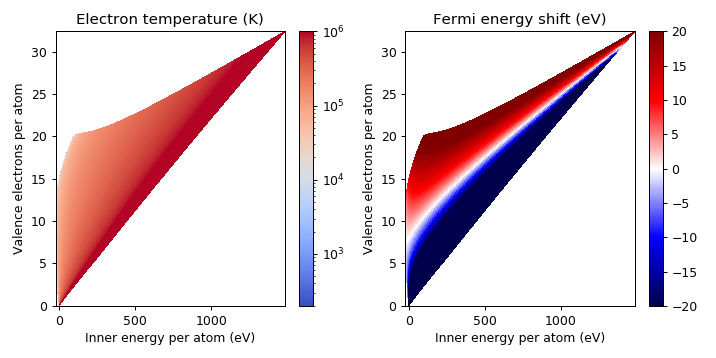

<IPython.core.display.Javascript object>


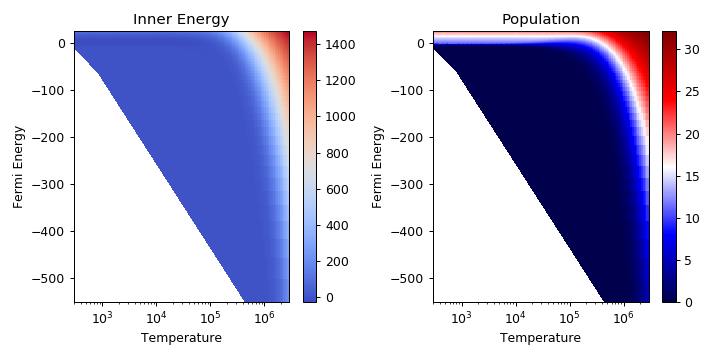

In [39]:
sim = XNLdyn.XNLsim(PAR, DEBUG=True, load_tables = False)
PAR.FermiSolver.plot_lookup_tables()

<IPython.core.display.Javascript object>


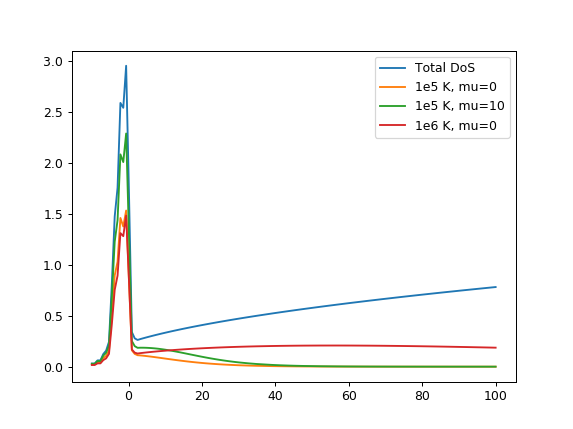

In [40]:
plt.figure()
plt.plot(PAR.E_j,PAR.m_j/PAR.enax_dE_j, label ='Total DoS')
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e5,0)*PAR.m_j/PAR.enax_dE_j, label = '1e5 K, mu=0')
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e5,10)*PAR.m_j/PAR.enax_dE_j, label = '1e5 K, mu=10')
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e6,0)*PAR.m_j/PAR.enax_dE_j, label = '1e6 K, mu=0')
plt.legend()

## Run a simulation for a single Fluence

In [41]:
%%time
fluences_joules_nm2, dA = XNLdyn.calculate_fluences(Nsteps_r, pulse_energy_max, pulse_profile_sigma) 
# These are just to get an idea where to calculate Fluences

fluences_simulated = np.logspace(np.log10(np.min(fluences_joules_nm2)),
                                 np.log10(np.max(fluences_joules_nm2)),
                                 N_local_fluences_to_calculate)


CPU times: user 366 µs, sys: 0 ns, total: 366 µs
Wall time: 341 µs


Simulating for  0.852874286185574 photons per atom
Initializing a simulation where ['I0_i'] are changed to [4567.505516943524]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
t:  -30.0
-23.77296655884878 10.010893551634371 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.02424921] i.e.  [0.02214715] /atom
Deviation from energy conservation (%):  inf
t:  -29.987708345797632
-23.772947999673434 10.01089676332126 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.03172586] i.e.  [0.02222895] /atom
Deviation from energy conservation (%):  inf
t:  -29.997815969558925
-23.772963261180035 10.010894122299787 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.0255759] i.e.  [0.02216166] /atom
t:  -29.996723954338385
-23.772961608680642 10.010894406761382 -> 460.7553274331385 -0.06628823404696504
Photons

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:798: RuntimeWarning: divide by zero encountered in double_scalars
  ec_error = np.abs(is_new_energy - should_be_new_energy)[check_z_index] / energy_incoming[check_z_index]


Photons impinging per atom this timestep:  [2.02956062] i.e.  [0.02220526] /atom
t:  -29.990293198039666
-23.77295051871832 10.010896080286157 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.03015154] i.e.  [0.02221172] /atom
t:  -29.989079847794624
-23.772948522517527 10.010896395292749 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.0308904] i.e.  [0.02221981] /atom
t:  -29.989079847794624
-23.77294977939486 10.010896395288633 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.0308904] i.e.  [0.02221981] /atom
t:  -29.998095254363694
-23.772963682872312 10.010894049325447 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.0254062] i.e.  [0.02215981] /atom
t:  -29.99714288154554
-23.77296224213313 10.010894297508402 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.02598492] i.e.  [0.02216614] /a

Photons impinging per atom this timestep:  [2.02700409] i.e.  [0.02217729] /atom
t:  -29.999185738202566
-23.772965329394452 10.010893764392875 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.02474374] i.e.  [0.02215256] /atom
t:  -29.998778607303848
-23.772964714192803 10.010893870651033 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.02499105] i.e.  [0.02215526] /atom
t:  -29.996742952810262
-23.77296157143388 10.010894401807498 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.02622799] i.e.  [0.0221688] /atom
t:  -29.996381058678068
-23.77296090351562 10.010894496165063 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.02644796] i.e.  [0.0221712] /atom
t:  -29.99592869101283
-23.772960197978225 10.01089461408193 -> 460.7553274331385 -0.06628823404696504
Photons impinging per atom this timestep:  [2.02672295] i.e.  [0.02217421] /

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:684: UserWarning: Correcting a significant non-zero sum in thermalization
  warnings.warn('Correcting a significant non-zero sum in thermalization')


 [2.24967178] i.e.  [0.02461348] /atom
t:  -29.610062845010425
-23.771838070249853 10.010983422172938 -> 735.3291714557308 -0.1739329221634307
Photons impinging per atom this timestep:  [2.2737257] i.e.  [0.02487665] /atom
t:  -29.430580146113325
-23.771021151622076 10.011017039976888 -> 769.6972174114014 -0.1864146676953169
Photons impinging per atom this timestep:  [2.39744511] i.e.  [0.02623025] /atom
t:  -29.39867211075384
-23.77112107411148 10.011022572703137 -> 769.6972174114014 -0.1864146676953169
Photons impinging per atom this timestep:  [2.42005256] i.e.  [0.0264776] /atom
t:  -29.358787066554484
-23.77083352468244 10.011029206034017 -> 769.6972174114014 -0.1864146676953169
Photons impinging per atom this timestep:  [2.44857685] i.e.  [0.02678968] /atom
t:  -29.358787066554484
-23.770416425958505 10.011029130825225 -> 806.7477169570385 -0.191075031897725
Photons impinging per atom this timestep: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 1.175e-04 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00029339468490396925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 9.499e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0002415334371357325
  warnings.warn(f'negative electron hole density found down to: {mn}')


 [2.44857685] i.e.  [0.02678968] /atom
t:  -29.294164151275805
-23.769956940639346 10.011039703847148 -> 806.7477169570385 -0.191075031897725
Photons impinging per atom this timestep:  [2.49542387] i.e.  [0.02730223] /atom
t:  -29.261852693636467
-23.76969150977753 10.01104432036898 -> 846.6900377814754 -0.2047869271245304
Photons impinging per atom this timestep:  [2.51914298] i.e.  [0.02756174] /atom
t:  -29.100295405439773
-23.767604086000265 10.011066703347065 -> 889.7498888863222 -0.2047869271245304
Photons impinging per atom this timestep:  [2.64074984] i.e.  [0.02889223] /atom
t:  -29.07157410976036
-23.766179050863183 10.011070315675628 -> 889.7498888863222 -0.2047869271245304
Photons impinging per atom this timestep:  [2.66290269] i.e.  [0.0291346] /atom
t:  -29.035672490161094
-23.765864232844876 10.011074662435368 -> 889.7498888863222 -0.2047869271245304
Photons impinging per atom this timestep:  [2.69082405] i.e.  [0.02944009] /atom
t:  -29.035672490161094
-23.7674213479857

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 3.583e-04 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0008473225663827577
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 3.773e-03 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008702913573319648
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 3.214e-03 over maximum of 1.00

Photons impinging per atom this timestep:  [3.03336343] i.e.  [0.03318778] /atom
t:  -28.593991876446967
-23.76147093701527 10.011113954058814 -> 986.2144766377414 -0.2249698805335072
Photons impinging per atom this timestep:  [3.05603099] i.e.  [0.03343579] /atom
t:  -28.463866983086625
-23.759086292343937 10.011120660926709 -> 1040.1643224281736 -0.2249698805335072
Photons impinging per atom this timestep:  [3.17161287] i.e.  [0.03470036] /atom
t:  -28.440733668711456
-23.758728062377376 10.011121580262468 -> 1040.1643224281736 -0.2249698805335072
Photons impinging per atom this timestep:  [3.19255716] i.e.  [0.03492951] /atom
t:  -28.41181702574249
-23.758060423321723 10.01112269874869 -> 1040.1643224281736 -0.2249698805335072
Photons impinging per atom this timestep:  [3.21890789] i.e.  [0.03521781] /atom
t:  -28.41181702574249
-23.75793139133076 10.011122771742983 -> 1040.1643224281736 -0.2249698805335072
Photons impinging per atom this timestep:  [3.21890789] i.e.  [0.03521781] /

Photons impinging per atom this timestep:  [3.77364423] i.e.  [0.04128714] /atom
t:  -27.826545118764734
-23.742394241957204 10.01112295770122 -> 1228.6191191614578 -0.2249698805335072
Photons impinging per atom this timestep:  [3.79473964] i.e.  [0.04151794] /atom
t:  -27.826545118764734
-23.742154548713224 10.011122989039418 -> 1228.6191191614578 -0.2249698805335072
Photons impinging per atom this timestep:  [3.79473964] i.e.  [0.04151794] /atom
t:  -27.79016728181823
-23.74096265732201 10.01112169335757 -> 1228.6191191614578 -0.2249698805335072
Photons impinging per atom this timestep:  [3.83332235] i.e.  [0.04194007] /atom
t:  -27.77197836334498
-23.74035603155468 10.011120865109763 -> 1228.6191191614578 -0.2249698805335072
Photons impinging per atom this timestep:  [3.85274145] i.e.  [0.04215253] /atom
t:  -27.68103377097873
-23.737306202472872 10.011116506946848 -> 1301.4888422265278 -0.2249698805335072
Photons impinging per atom this timestep:  [3.95112646] i.e.  [0.04322895] /a

Photons impinging per atom this timestep:  [4.75240617] i.e.  [0.05199569] /atom
t:  -26.98951172024082
-23.704745978733534 10.011050722736131 -> 1599.827018718372 -0.21794232300612748
Photons impinging per atom this timestep:  [4.77326308] i.e.  [0.05222388] /atom
t:  -26.908410078141056
-23.70065095682759 10.011039184505181 -> 1556.0335707951297 -0.21372139431892379
Photons impinging per atom this timestep:  [4.87873617] i.e.  [0.05337786] /atom
t:  -26.89399200843443
-23.7008950053517 10.011037016301044 -> 1556.0335707951297 -0.21372139431892379
Photons impinging per atom this timestep:  [4.89769575] i.e.  [0.05358529] /atom
t:  -26.87596942130115
-23.69998276171312 10.011034316932475 -> 1644.35368531815 -0.21935113000529327
Photons impinging per atom this timestep:  [4.92148448] i.e.  [0.05384556] /atom
t:  -26.87596942130115
-23.698351477590112 10.011034367314943 -> 1644.35368531815 -0.21935113000529327
Photons impinging per atom this timestep:  [4.92148448] i.e.  [0.05384556] /at

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.735e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -7.718e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


Photons impinging per atom this timestep:  [5.60914498] i.e.  [0.0613692] /atom
t:  -26.311626271010226
-23.659760238968047 10.010929372816536 -> 1874.9535970055206 -0.20990659700152037
Photons impinging per atom this timestep:  [5.71840823] i.e.  [0.06256464] /atom
t:  -26.29860937710878
-23.65876545069705 10.01092645227029 -> 1874.9535970055206 -0.20990659700152037
Photons impinging per atom this timestep:  [5.73802224] i.e.  [0.06277924] /atom
t:  -26.282338259731972
-23.657529721636077 10.01092280544869 -> 1899.0734945671734 -0.2073417624156093
Photons impinging per atom this timestep:  [5.76262067] i.e.  [0.06304837] /atom
t:  -26.282338259731972
-23.657515858823615 10.010922840482786 -> 1899.0734945671734 -0.2073417624156093
Photons impinging per atom this timestep:  [5.76262067] i.e.  [0.06304837] /atom
t:  -26.403845735562125
-23.66677431597027 10.01094931471252 -> 1874.9535970055206 -0.20990659700152037
Photons impinging per atom this timestep:  [5.58108679] i.e.  [0.06106222]

-23.601910258443525 10.010771608592568 -> 2318.010828964599 -0.18874029868237585
Photons impinging per atom this timestep:  [6.69149293] i.e.  [0.07321108] /atom
t:  -25.707438077464662
-23.605722283155817 10.01077161837011 -> 2329.0938689000286 -0.19583000410841578
Photons impinging per atom this timestep:  [6.69149293] i.e.  [0.07321108] /atom
t:  -25.688263868074493
-23.603705692768486 10.010765834304957 -> 2290.7130171632425 -0.19165188848913317
Photons impinging per atom this timestep:  [6.72454569] i.e.  [0.07357271] /atom
t:  -25.67867676337941
-23.60279805702267 10.010762885442382 -> 2290.7130171632425 -0.19165188848913317
Photons impinging per atom this timestep:  [6.74112394] i.e.  [0.07375409] /atom
t:  -25.63074123990399
-23.59758957313122 10.01074807384215 -> 2429.0335531452088 -0.191075031897725
Photons impinging per atom this timestep:  [6.82453623] i.e.  [0.0746667] /atom
t:  -25.622219369063917
-23.596168455456205 10.010745403576514 -> 2373.155895743134 -0.188742574250

Photons impinging per atom this timestep:  [7.76021584] i.e.  [0.08490389] /atom
t:  -25.116701044657248
-23.537999848258153 10.01056865070244 -> 2775.160001896603 -0.17817518658620202
Photons impinging per atom this timestep:  [7.77532698] i.e.  [0.08506922] /atom
t:  -25.107020906684607
-23.536682768701 10.010564899995149 -> 2775.160001896603 -0.17817518658620202
Photons impinging per atom this timestep:  [7.79425073] i.e.  [0.08527627] /atom
t:  -25.107020906684607
-23.53555043568173 10.010564914117545 -> 2775.160001896603 -0.17817518658620202
Photons impinging per atom this timestep:  [7.79425073] i.e.  [0.08527627] /atom
t:  -25.0901835900434
-23.533368768168007 10.01055837731645 -> 2836.102243293442 -0.1760561258105895
Photons impinging per atom this timestep:  [7.82725839] i.e.  [0.0856374] /atom
t:  -25.081764931722795
-23.532200253840536 10.010555060789898 -> 2836.102243293442 -0.1760561258105895
Photons impinging per atom this timestep:  [7.84380626] i.e.  [0.08581845] /atom


Photons impinging per atom this timestep:  [8.59983513] i.e.  [0.0940901] /atom
t:  -24.680207871250985
-23.474705919208606 10.010385061112972 -> 3243.0403697504303 -0.1602614226465846
Photons impinging per atom this timestep:  [8.66797819] i.e.  [0.09483565] /atom
t:  -24.674526357251622
-23.4739782686565 10.010382467968167 -> 3243.0403697504303 -0.1602614226465846
Photons impinging per atom this timestep:  [8.68013963] i.e.  [0.0949687] /atom
t:  -24.667424464752415
-23.472798632293806 10.010379223248123 -> 3243.0403697504303 -0.1602614226465846
Photons impinging per atom this timestep:  [8.69536149] i.e.  [0.09513525] /atom
t:  -24.667424464752415
-23.47261141624485 10.010379227587574 -> 3243.0403697504303 -0.1602614226465846
Photons impinging per atom this timestep:  [8.69536149] i.e.  [0.09513525] /atom
t:  -24.653636915552585
-23.470469101068115 10.010372919797094 -> 3318.3232492825223 -0.1480768813214013
Photons impinging per atom this timestep:  [8.72497676] i.e.  [0.09545926] 

Photons impinging per atom this timestep:  [9.65889574] i.e.  [0.1056772] /atom
t:  -24.204128913802613
-23.39445103860672 10.010149097922234 -> 3906.402036707701 -0.11651164643498646
Photons impinging per atom this timestep:  [9.73764778] i.e.  [0.10653882] /atom
t:  -24.198168763517852
-23.393828273089945 10.01014588716226 -> 3906.402036707701 -0.11651164643498646
Photons impinging per atom this timestep:  [9.75170374] i.e.  [0.1066926] /atom
t:  -24.190718575661904
-23.39236202718784 10.010141872055437 -> 3906.402036707701 -0.11651164643498646
Photons impinging per atom this timestep:  [9.76929735] i.e.  [0.10688509] /atom
t:  -24.190718575661904
-23.39171086688436 10.01014188064656 -> 3906.402036707701 -0.11651164643498646
Photons impinging per atom this timestep:  [9.76929735] i.e.  [0.10688509] /atom
t:  -24.17589059673783
-23.388959447330045 10.010133879589432 -> 3906.402036707701 -0.12233722749581943
Photons impinging per atom this timestep:  [9.80439191] i.e.  [0.10726906] /at

-23.185856574908268 10.009544061258559 -> 5172.8983982095015 -0.05000000000001137
Photons impinging per atom this timestep:  [12.22847937] i.e.  [0.1337908] /atom
t:  -23.23733988575931
-23.184191754801564 10.00953914364255 -> 5172.8983982095015 -0.05000000000001137
Photons impinging per atom this timestep:  [12.24758831] i.e.  [0.13399987] /atom
t:  -23.22894169218929
-23.182116643705456 10.009532991044006 -> 5215.327680110108 -0.050312805164111296
Photons impinging per atom this timestep:  [12.2715087] i.e.  [0.13426158] /atom
t:  -23.22894169218929
-23.18207441319782 10.009532999807686 -> 5215.327680110108 -0.050312805164111296
Photons impinging per atom this timestep:  [12.2715087] i.e.  [0.13426158] /atom
t:  -23.21365297332738
-23.178228182243295 10.009521783450126 -> 5172.8983982095015 -0.05000000000001137


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -6.108e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.366e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


Photons impinging per atom this timestep:  [12.31515291] i.e.  [0.13473909] /atom
t:  -23.206008613896422
-23.176395030096174 10.009516116202336 -> 5257.939760737476 -0.0503131103398573
Photons impinging per atom this timestep:  [12.33702238] i.e.  [0.13497836] /atom
t:  -23.167786816741643
-23.16421081718339 10.009487711960139 -> 5257.939760737476 -0.04937561037428395
Photons impinging per atom this timestep:  [12.44684454] i.e.  [0.13617992] /atom
t:  -23.160991830580794
-23.157632049104464 10.009482634471016 -> 5257.939760737476 -0.04937561037428395
Photons impinging per atom this timestep:  [12.46645151] i.e.  [0.13639444] /atom
t:  -23.152498097879732
-23.156018644974825 10.009476270682498 -> 5343.712318172492 -0.04968872071455621
Photons impinging per atom this timestep:  [12.49099555] i.e.  [0.13666297] /atom
t:  -23.152498097879732
-23.162570953863572 10.00947625612841 -> 5257.939760737476 -0.04937561037428395
Photons impinging per atom this timestep:  [12.49099555] i.e.  [0.13

-23.043666520809737 10.00913993053207 -> 6359.278363398481 0.05490270196142433
Photons impinging per atom this timestep:  [13.75400764] i.e.  [0.15048148] /atom
t:  -22.724652651289492
-23.041327114942305 10.009133059852033 -> 6359.278363398481 0.05423721075538879
Photons impinging per atom this timestep:  [13.77905491] i.e.  [0.15075552] /atom
t:  -22.684627566169052
-23.028948728352287 10.009098622727556 -> 6406.536836818614 0.05323929889115675
Photons impinging per atom this timestep:  [13.90484347] i.e.  [0.15213177] /atom
t:  -22.677511995480973
-23.02603295911694 10.009092458150928 -> 6406.536836818614 0.05323929889115675
Photons impinging per atom this timestep:  [13.92730245] i.e.  [0.15237749] /atom
t:  -22.668617532120876
-23.023308575275994 10.009084734606436 -> 6453.977985841807 0.05357236944198007
Photons impinging per atom this timestep:  [13.95541724] i.e.  [0.15268509] /atom
t:  -22.668617532120876
-23.024344096217337 10.009084732157271 -> 6406.536836818614 0.0532392988

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -4.204e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.015e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


-22.99690633656867 10.00900564759609 -> 6501.601810412549 0.05390543999257602
Photons impinging per atom this timestep:  [14.24156917] i.e.  [0.15581586] /atom
t:  -22.561073865100788
-22.99141160530821 10.008989723456342 -> 6834.488769625668 0.0984895109995989
Photons impinging per atom this timestep:  [14.29898564] i.e.  [0.15644404] /atom
t:  -22.5521604672942
-22.988373201621904 10.008981666654789 -> 6785.612968926018 0.10035896754274631
Photons impinging per atom this timestep:  [14.32776354] i.e.  [0.1567589] /atom
t:  -22.507593478261253
-22.977728504812735 10.008941241920727 -> 6785.612968926018 0.09425271335635443
Photons impinging per atom this timestep:  [14.47235169] i.e.  [0.15834083] /atom
t:  -22.499670457988728
-22.982110300690707 10.00893393392548 -> 6834.488769625668 0.09483871266704114
Photons impinging per atom this timestep:  [14.49817843] i.e.  [0.1586234] /atom
t:  -22.489766682648074
-22.978481163642357 10.008924849362668 -> 6785.612968926018 0.09425271335635443

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -6.757e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


-22.990310590383597 10.008986711220132 -> 6834.488769625668 0.0984895109995989
Photons impinging per atom this timestep:  [14.30965363] i.e.  [0.15656076] /atom
t:  -22.52254684798617
-22.977326056190268 10.008954878868305 -> 6785.612968926018 0.09425271335635443
Photons impinging per atom this timestep:  [14.42370866] i.e.  [0.15780863] /atom
t:  -22.516285313238637
-22.972114524762084 10.008949189036846 -> 6834.488769625668 0.09425328506301867
Photons impinging per atom this timestep:  [14.44406131] i.e.  [0.15803131] /atom
t:  -22.508458394804222
-22.97024829441565 10.008942067362822 -> 6834.488769625668 0.09425328506301867
Photons impinging per atom this timestep:  [14.46953455] i.e.  [0.15831001] /atom
t:  -22.508458394804222
-22.974568484890963 10.008942054898032 -> 6883.547201686005 0.0936684291641825
Photons impinging per atom this timestep:  [14.46953455] i.e.  [0.15831001] /atom
t:  -22.494369941622274
-22.969945736088942 10.008929202159784 -> 6834.488769625668 0.094253285063

-22.768793319749197 10.008356119846786 -> 8005.216626545728 0.17767000609467232
Photons impinging per atom this timestep:  [16.48796414] i.e.  [0.18039348] /atom
t:  -21.875587162450973
-22.752166701976584 10.008306861713898 -> 7993.59641689119 0.17242800481577092
Photons impinging per atom this timestep:  [16.65136677] i.e.  [0.18218126] /atom
t:  -21.86758108533715
-22.750240850760576 10.008298010793133 -> 8085.133366343401 0.1735562876613983
Photons impinging per atom this timestep:  [16.68054979] i.e.  [0.18250054] /atom
t:  -21.85757348894487
-22.746653116253032 10.008286951126014 -> 8058.448818649161 0.16686083488360737
Photons impinging per atom this timestep:  [16.71708543] i.e.  [0.18290028] /atom
t:  -21.85757348894487
-22.745014189950314 10.008286992458181 -> 8005.216626545728 0.1730397827533352
Photons impinging per atom this timestep:  [16.71708543] i.e.  [0.18290028] /atom
t:  -21.84055096400287
-22.73854862784998 10.008268155999387 -> 8202.414823031726 0.1963470645938798

-22.385282902348912 10.00725558796723 -> 10024.060657859029 0.33536000006023414
Photons impinging per atom this timestep:  [19.94237953] i.e.  [0.21818796] /atom
t:  -20.95878233416763
-22.348249547261954 10.007146537170172 -> 10453.84883754667 0.39614288427191013
Photons impinging per atom this timestep:  [20.2640035] i.e.  [0.22170682] /atom
t:  -20.945236200588436
-22.34218515617906 10.007126658797883 -> 10545.46333883177 0.40935174138783736
Photons impinging per atom this timestep:  [20.32159823] i.e.  [0.22233696] /atom
t:  -20.928303533614443
-22.333462179128695 10.007101832291879 -> 10579.924541133794 0.41529543591190077
Photons impinging per atom this timestep:  [20.39376926] i.e.  [0.22312658] /atom
t:  -20.928303533614443
-22.332623800366218 10.00710228247716 -> 10549.28951245359 0.4100121519223876
Photons impinging per atom this timestep:  [20.39376926] i.e.  [0.22312658] /atom
t:  -20.895060241106457
-22.315972786836188 10.007053736820504 -> 10675.952795422645 0.42025133507

Photons impinging per atom this timestep:  [23.58067069] i.e.  [0.25799421] /atom
t:  -20.222618684188028
-21.94342188305673 10.005952834226097 -> 12619.149468022171 0.5968687822906418
Photons impinging per atom this timestep:  [23.58067069] i.e.  [0.25799421] /atom
t:  -20.193064799879785
-21.92550119307576 10.005899308703532 -> 12722.215780101347 0.6056573514171646
Photons impinging per atom this timestep:  [23.72192058] i.e.  [0.25953961] /atom
t:  -20.178287857725664
-21.916330787576868 10.005871998983249 -> 12751.5752511889 0.6067414822669548
Photons impinging per atom this timestep:  [23.79278457] i.e.  [0.26031493] /atom
t:  -20.10440314695506
-21.870847012202972 10.005734738982989 -> 13032.720805778104 0.6412453441266734
Photons impinging per atom this timestep:  [24.14950156] i.e.  [0.26421774] /atom
t:  -20.09126808726251
-21.86326079550664 10.00570987867319 -> 13053.504993366214 0.6370842374882386
Photons impinging per atom this timestep:  [24.21333715] i.e.  [0.26491616] /a

Photons impinging per atom this timestep:  [32.01902524] i.e.  [0.35031756] /atom
t:  -18.623881073965226
-20.755434708738093 10.002217541214396 -> 18256.454805156813 1.1085719321951046
Photons impinging per atom this timestep:  [32.16741999] i.e.  [0.35194114] /atom
t:  -18.623881073965226
-20.74868873169538 10.00221762611835 -> 18272.888684084915 1.1182120313874009
Photons impinging per atom this timestep:  [32.16741999] i.e.  [0.35194114] /atom
t:  -18.581571165612687
-20.71092495094349 10.002093140843568 -> 18466.906395999067 1.1391767426502213
Photons impinging per atom this timestep:  [32.42160219] i.e.  [0.35472212] /atom
t:  -18.56041621143642
-20.691674640767452 10.002029178684927 -> 18529.81312205113 1.1324317157745156
Photons impinging per atom this timestep:  [32.549227] i.e.  [0.35611846] /atom
t:  -18.45464144055507
-20.585451894594406 10.00170725430374 -> 18996.869667339623 1.1734673888436475
Photons impinging per atom this timestep:  [33.19269815] i.e.  [0.36315862] /at

Photons impinging per atom this timestep:  [44.27396672] i.e.  [0.48439789] /atom
t:  -16.798078486301822
-18.722830319388827 9.99527915539402 -> 26205.264296048397 1.762265203089072
Photons impinging per atom this timestep:  [44.44807553] i.e.  [0.4863028] /atom
t:  -16.768892897758253
-18.683042780282864 9.995141069622962 -> 26341.500121744844 1.7756608425133038
Photons impinging per atom this timestep:  [44.66633227] i.e.  [0.48869073] /atom
t:  -16.768892897758253
-18.679341539207545 9.995140418404029 -> 26341.500121744844 1.7756608425133038
Photons impinging per atom this timestep:  [44.66633227] i.e.  [0.48869073] /atom
t:  -16.713583248154336
-18.60502560360954 9.994877774147163 -> 26629.55932967125 1.7917814640136953
Photons impinging per atom this timestep:  [45.08184182] i.e.  [0.49323678] /atom
t:  -16.68592842335238
-18.566140780010585 9.994742826174598 -> 26730.308923004042 1.8054153526459231
Photons impinging per atom this timestep:  [45.29052426] i.e.  [0.49551996] /atom

-14.408784175900747 9.980569385132803 -> 39432.91215988165 2.5886938238701873
Photons impinging per atom this timestep:  [65.13841721] i.e.  [0.71267415] /atom
t:  -14.303932995169308
-14.330302130473267 9.980282876455595 -> 39651.51028452568 2.6081320281748788
Photons impinging per atom this timestep:  [65.50892378] i.e.  [0.71672783] /atom
t:  -14.303932995169308
-14.420778815206 9.980277722039862 -> 39422.68393160336 2.5871372818866405
Photons impinging per atom this timestep:  [65.50892378] i.e.  [0.71672783] /atom
t:  -14.225799138223955
-14.252966079003812 9.979710559050034 -> 39846.87575009544 2.611907928854265
Photons impinging per atom this timestep:  [66.24315007] i.e.  [0.72476094] /atom
t:  -14.186732209751279
-14.167758503160444 9.979420505344523 -> 40068.61649660857 2.6338557607126347
Photons impinging per atom this timestep:  [66.61181845] i.e.  [0.72879451] /atom
t:  -13.991397567387896
-13.768490442901708 9.977965826862407 -> 41142.66317942022 2.678321815371362
Photons

-4.886879102249432 9.950858036662126 -> 61660.56679122528 3.355483647474813
Photons impinging per atom this timestep:  [100.57899959] i.e.  [1.10042669] /atom
t:  -10.851931917608038
-4.709521741105627 9.950364427646026 -> 62021.106412681795 3.3628467840777887
Photons impinging per atom this timestep:  [101.12695808] i.e.  [1.10642186] /atom
t:  -10.851931917608038
-4.728439495623846 9.950360088891788 -> 61957.206503140435 3.3655851750669115
Photons impinging per atom this timestep:  [101.12695808] i.e.  [1.10642186] /atom
t:  -10.754174858032593
-4.382691155954647 9.949392978975395 -> 62665.81956888702 3.3795191742766804
Photons impinging per atom this timestep:  [102.20059356] i.e.  [1.11816842] /atom
t:  -10.70529632824487
-4.205196522442213 9.94890268569325 -> 63027.80208164896 3.3877751713709756
Photons impinging per atom this timestep:  [102.73799633] i.e.  [1.1240481] /atom
t:  -10.460903679306258
-3.319538088386262 9.946446467747705 -> 64830.27117751689 3.4079780105801945
Photo

17.030673278457684 9.898644339243134 -> 100136.68530773328 3.2583238606422924
Photons impinging per atom this timestep:  [150.16382463] i.e.  [1.64293025] /atom
t:  -6.142158761084985
17.481035953747853 9.897680809808797 -> 100847.74807875654 3.238056379478678
Photons impinging per atom this timestep:  [150.89259596] i.e.  [1.65090368] /atom
t:  -6.142158761084985
17.4574477318953 9.897670741707886 -> 100807.59842628073 3.2422439253868447
Photons impinging per atom this timestep:  [150.89259596] i.e.  [1.65090368] /atom
t:  -6.000006148449509
18.307484528119865 9.895919123514952 -> 102099.8388785186 3.2180041043223184
Photons impinging per atom this timestep:  [152.20046506] i.e.  [1.66521297] /atom
t:  -5.928929842131771
18.74118509817309 9.89503398654116 -> 102767.58783665403 3.2008084524408105
Photons impinging per atom this timestep:  [152.84706167] i.e.  [1.67228733] /atom
t:  -5.573548310543081
20.966181250329164 9.890606116024662 -> 106136.35943509106 3.116976555614542
Photons i

Photons impinging per atom this timestep:  [180.33886485] i.e.  [1.97307292] /atom
t:  -1.3939028190263918
52.39214361672374 9.836149510905926 -> 155047.34278980418 -0.08788259946133258
Photons impinging per atom this timestep:  [180.45547015] i.e.  [1.97434869] /atom
t:  -1.165776194965789
59.8600796975504 9.83314568886666 -> 159544.86973508916 0.6234881495129514
Photons impinging per atom this timestep:  [180.98310769] i.e.  [1.98012153] /atom
t:  -1.1252203506883485
69.82599624675615 9.832722353165957 -> 172162.8171457153 -0.20018191289517517
Photons impinging per atom this timestep:  [181.06720591] i.e.  [1.98104164] /atom
t:  -1.0745255453415479
68.87728064226937 9.832155212598668 -> 170944.2537967093 -0.11257158417072333
Photons impinging per atom this timestep:  [181.16819324] i.e.  [1.98214653] /atom
t:  -1.0745255453415479
55.91549361397623 9.831921232196105 -> 154555.98522271894 0.9092017764391471
Photons impinging per atom this timestep:  [181.16819324] i.e.  [1.98214653] /a

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.909e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -4.125e-04 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.298e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.523e-04 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings

Photons impinging per atom this timestep:  [182.14407016] i.e.  [1.99282352] /atom
t:  0.28316134092119677
68.45663664165099 9.81430604113704 -> 170685.17270696867 -0.14346282820369538
Photons impinging per atom this timestep:  [182.14407016] i.e.  [1.99282352] /atom
t:  -0.116530389072407
64.72065617077753 9.819429801742341 -> 167125.8875931591 -0.11651164643498646
Photons impinging per atom this timestep:  [182.20473516] i.e.  [1.99348726] /atom
t:  -0.0732070258244768
65.24540526842128 9.818872739354918 -> 166929.93014339876 0.053363817011955916
Photons impinging per atom this timestep:  [182.21222398] i.e.  [1.99356919] /atom
t:  0.1434097904151742
65.95871783303575 9.816064914978654 -> 167127.790656907 0.166343834881701
Photons impinging per atom this timestep:  [182.19836991] i.e.  [1.99341761] /atom
t:  0.18191944663555654
63.53809099783378 9.815494314333614 -> 164463.00618550114 0.26808400504165775
Photons impinging per atom this timestep:  [182.18695707] i.e.  [1.99329275] /at

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -7.910e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.313e-04 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.539e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.477e-05 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


64.17099563086722 9.814846688907402 -> 165281.5141297496 0.21161271833389605
Photons impinging per atom this timestep:  [182.16889293] i.e.  [1.99309511] /atom
t:  0.23005651691103457
68.01767246508064 9.814981668218673 -> 170141.3526218427 -0.1077599169497887
Photons impinging per atom this timestep:  [182.16889293] i.e.  [1.99309511] /atom
t:  -0.13985230888030586
64.50030321975959 9.819731114348937 -> 165602.67653130612 0.20911522968759755
Photons impinging per atom this timestep:  [182.19928792] i.e.  [1.99342766] /atom
t:  -0.10818990553632508
64.80358560949574 9.819323469684196 -> 167125.8875931591 -0.09654394535530741
Photons impinging per atom this timestep:  [182.20644267] i.e.  [1.99350594] /atom
t:  0.05012211118357879
67.46528007035839 9.817287032115308 -> 169405.11887137583 -0.05157454004330475
Photons impinging per atom this timestep:  [182.21481783] i.e.  [1.99359757] /atom
t:  0.07826646971156165
69.75356316273344 9.816942495825264 -> 172260.87418698324 -0.2402152474007

Photons impinging per atom this timestep:  [181.30344712] i.e.  [1.98362634] /atom
t:  1.0228380983449799
76.11068308160681 9.804968446779522 -> 180165.9321197652 -0.7824444368023364
Photons impinging per atom this timestep:  [181.26641969] i.e.  [1.98322122] /atom
t:  1.0228380983449799
76.1084730951887 9.804967909935575 -> 180147.6661925413 -0.7805800896092876
Photons impinging per atom this timestep:  [181.26641969] i.e.  [1.98322122] /atom
t:  1.05914007325155
76.46662839643211 9.80451568025822 -> 180902.76340320485 -0.8874425181627714
Photons impinging per atom this timestep:  [181.19793213] i.e.  [1.98247191] /atom
t:  1.0772910607048347
76.65831767884849 9.804290319324785 -> 181147.24568145283 -0.9059005826156294
Photons impinging per atom this timestep:  [181.16280276] i.e.  [1.98208756] /atom
t:  1.1680459979712596
77.53751314734865 9.803163155391745 -> 182269.17315199433 -0.9912534041856134
Photons impinging per atom this timestep:  [180.97831413] i.e.  [1.98006908] /atom
t: 

78.62478405085379 9.800278585742557 -> 183684.5866407747 -1.1044781707417712
Photons impinging per atom this timestep:  [180.43497424] i.e.  [1.97412444] /atom
t:  1.408768549798783
76.27714019362635 9.800191464945804 -> 180274.8064003256 -0.7759690069348721
Photons impinging per atom this timestep:  [180.4178818] i.e.  [1.97393744] /atom
t:  1.4171944147510367
76.72716481625388 9.800085063639571 -> 181333.45172871824 -0.9362038064960245
Photons impinging per atom this timestep:  [180.39640327] i.e.  [1.97370244] /atom
t:  1.4171944147510367
79.99123686628694 9.800093732003614 -> 185415.0090645936 -1.2367970057895263
Photons impinging per atom this timestep:  [180.39640327] i.e.  [1.97370244] /atom
t:  1.3549250471322805
79.50890490103498 9.800857238979445 -> 184785.88079849997 -1.184744425582096
Photons impinging per atom this timestep:  [180.55216892] i.e.  [1.97540666] /atom
t:  1.3617067556080438
79.57890861352216 9.800773894410648 -> 180147.17253173815 -0.049999999999999996
Photon

Photons impinging per atom this timestep:  [177.81750948] i.e.  [1.94548697] /atom
t:  2.3870790653452225
90.32393732458928 9.788457425217482 -> 198613.36610274346 -2.302976283352109
Photons impinging per atom this timestep:  [177.09886529] i.e.  [1.93762435] /atom
t:  2.4183943272038206
90.60940487623422 9.788091074889431 -> 198960.67388898123 -2.3295822047588786
Photons impinging per atom this timestep:  [176.9656621] i.e.  [1.93616698] /atom
t:  2.4575384045270683
91.04407807012399 9.787632992864895 -> 199529.0721278669 -2.3790689037329855
Photons impinging per atom this timestep:  [176.79686089] i.e.  [1.93432014] /atom
t:  2.4575384045270683
91.12079527030482 9.787632817263257 -> 199615.67810352225 -2.3842721651292607
Photons impinging per atom this timestep:  [176.79686089] i.e.  [1.93432014] /atom
t:  2.152876679231045
87.81193470786666 9.791218341849719 -> 195407.68861600725 -2.038556432817728
Photons impinging per atom this timestep:  [178.04289064] i.e.  [1.94795285] /atom
t:

Photons impinging per atom this timestep:  [160.23351763] i.e.  [1.75310194] /atom
t:  5.177295145014008
122.6435235103581 9.758704850326772 -> 240977.35686671818 -6.201533141476347
Photons impinging per atom this timestep:  [159.36177703] i.e.  [1.7435643] /atom
t:  5.709616032836495
129.30055171008007 9.753850369134122 -> 250052.52241145467 -7.114732663214028
Photons impinging per atom this timestep:  [154.81026862] i.e.  [1.69376662] /atom
t:  5.80425085733827
130.68078203100902 9.753077455725931 -> 251909.4508349876 -7.298456026902073
Photons impinging per atom this timestep:  [153.96914572] i.e.  [1.68456396] /atom
t:  5.922544387965489
132.142772478572 9.752056476156268 -> 253931.9064802773 -7.506230231807422
Photons impinging per atom this timestep:  [152.90490769] i.e.  [1.67292022] /atom
t:  5.922544387965489
131.86161635678525 9.751954680990861 -> 253559.46560372197 -7.470254619689939
Photons impinging per atom this timestep:  [152.90490769] i.e.  [1.67292022] /atom
t:  6.182

Photons impinging per atom this timestep:  [58.95803394] i.e.  [0.64505508] /atom
t:  15.282469626024744
257.02468499435975 9.723505327877351 -> 488719.16630322405 -36.48220410389682
Photons impinging per atom this timestep:  [56.68045717] i.e.  [0.62013629] /atom
t:  15.412469626024745
258.76589450123 9.72388643439939 -> 493502.4731277162 -37.1329727663462
Photons impinging per atom this timestep:  [55.56079186] i.e.  [0.60788613] /atom
t:  16.062469626024743
267.47308945622115 9.72587086960447 -> 518411.0000347073 -40.53887372359992
Photons impinging per atom this timestep:  [50.1583107] i.e.  [0.54877802] /atom
t:  16.1780251815803
269.038185207362 9.726267213108379 -> 523019.01668174803 -41.16865523695101
Photons impinging per atom this timestep:  [49.23261823] i.e.  [0.53865009] /atom
t:  16.322469626024745
270.9594776901135 9.726786051776926 -> 528815.5276204536 -41.96583183113785
Photons impinging per atom this timestep:  [48.09045884] i.e.  [0.52615382] /atom
t:  16.32246962602

Photons impinging per atom this timestep:  [7.4656021] i.e.  [0.08168055] /atom
t:  25.42246962602475
379.29586071582884 9.787845052719037 -> 1191567.0535397346 -138.54590469329327
Photons impinging per atom this timestep:  [7.1971784] i.e.  [0.07874375] /atom
t:  25.42246962602475
379.27720509053904 9.787901037584957 -> 1191282.3048347298 -138.50214638896355
Photons impinging per atom this timestep:  [7.1971784] i.e.  [0.07874375] /atom
t:  25.68246962602475
381.94318761393856 9.790086158817758 -> 1225768.3768567059 -143.6567145761885
Photons impinging per atom this timestep:  [6.73456109] i.e.  [0.07368229] /atom
t:  25.81246962602475
383.24614397805385 9.79118575958833 -> 1243292.1266343778 -146.27745740926505
Photons impinging per atom this timestep:  [6.51287462] i.e.  [0.07125683] /atom
t:  26.46246962602475
389.72380511888645 9.796661159803492 -> 1276951.189657376 -149.9999999721584
Photons impinging per atom this timestep:  [5.4952681] i.e.  [0.06012328] /atom
t:  26.5780251815

Photons impinging per atom this timestep:  [3.15393548] i.e.  [0.03450695] /atom
t:  28.61891634104977
409.8749891364443 9.814828553546315 -> 2901424.5303875823 -414.8549195097267
Photons impinging per atom this timestep:  [3.03431897] i.e.  [0.03319824] /atom
t:  28.642990995600545
422.8175209643326 9.815025168277067 -> 808832.6461614738 -63.30722509553659
Photons impinging per atom this timestep:  [3.01347592] i.e.  [0.0329702] /atom
t:  28.673084313789015
424.6823309426523 9.815274826290358 -> 808832.6461614738 -63.30722509553659
Photons impinging per atom this timestep:  [2.98759898] i.e.  [0.03268708] /atom
t:  28.673084313789015
406.52415434508026 9.815281860026193 -> 1475369.8855689894 -178.03152397353173
Photons impinging per atom this timestep:  [2.98759898] i.e.  [0.03268708] /atom
t:  28.448291457339337
402.49587191373973 9.813405808444287 -> 1013314.789479422 -101.2894048792126
Photons impinging per atom this timestep:  [3.18570124] i.e.  [0.0348545] /atom
t:  28.4713149609

Photons impinging per atom this timestep:  [2.02424921] i.e.  [0.02214715] /atom
Photons impinging per atom this timestep:  [2.02424921] i.e.  [0.02214715] /atom
Photons impinging per atom this timestep:  [2.02672295] i.e.  [0.02217421] /atom
Photons impinging per atom this timestep:  [2.02895846] i.e.  [0.02219867] /atom
Photons impinging per atom this timestep:  [2.05143441] i.e.  [0.02244458] /atom
Photons impinging per atom this timestep:  [2.20223953] i.e.  [0.02409452] /atom
Photons impinging per atom this timestep:  [2.44857685] i.e.  [0.02678968] /atom
Photons impinging per atom this timestep:  [2.69082405] i.e.  [0.02944009] /atom
Photons impinging per atom this timestep:  [2.98847073] i.e.  [0.03269662] /atom
Photons impinging per atom this timestep:  [3.1326088] i.e.  [0.03427362] /atom
Photons impinging per atom this timestep:  [3.26980404] i.e.  [0.03577466] /atom
Photons impinging per atom this timestep:  [3.42370337] i.e.  [0.03745846] /atom
Photons impinging per atom th

Photons impinging per atom this timestep:  [73.07980318] i.e.  [0.79956021] /atom
Photons impinging per atom this timestep:  [77.54277702] i.e.  [0.84838925] /atom
Photons impinging per atom this timestep:  [81.93608673] i.e.  [0.89645609] /atom
Photons impinging per atom this timestep:  [86.70488016] i.e.  [0.94863107] /atom
Photons impinging per atom this timestep:  [91.52929785] i.e.  [1.00141464] /atom
Photons impinging per atom this timestep:  [96.21441334] i.e.  [1.05267411] /atom
Photons impinging per atom this timestep:  [101.12695808] i.e.  [1.10642186] /atom
Photons impinging per atom this timestep:  [106.50850388] i.e.  [1.16530092] /atom
Photons impinging per atom this timestep:  [111.79193162] i.e.  [1.22310647] /atom
Photons impinging per atom this timestep:  [117.31327956] i.e.  [1.28351509] /atom
Photons impinging per atom this timestep:  [123.72327493] i.e.  [1.35364633] /atom
Photons impinging per atom this timestep:  [130.52946681] i.e.  [1.42811233] /atom
Photons im

<IPython.core.display.Javascript object>


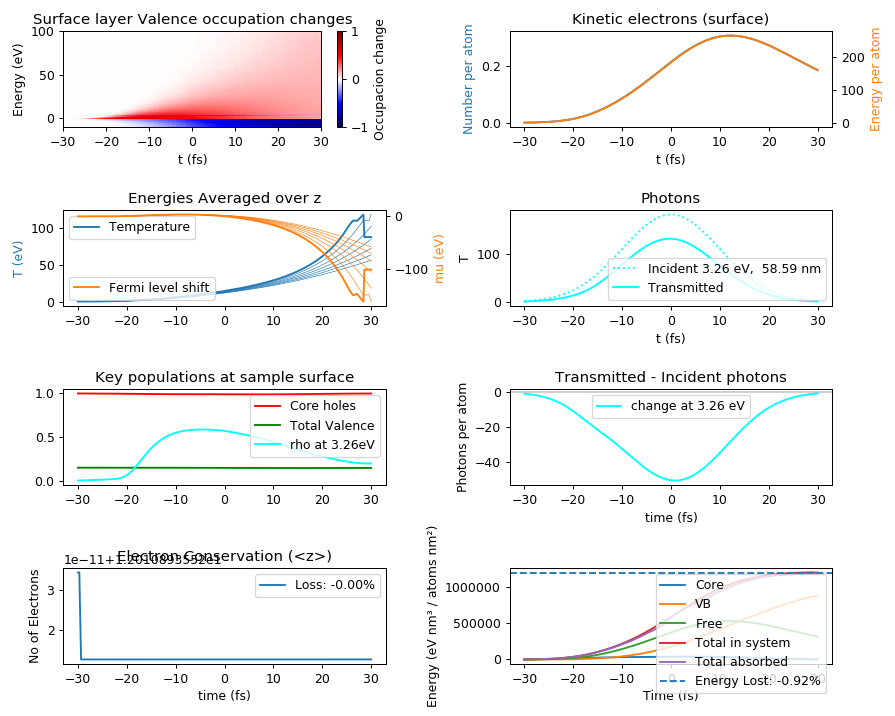

Done
Transmission:  [69.56326365]  %
CPU times: user 2min 10s, sys: 3.9 s, total: 2min 14s
Wall time: 2min 10s


(array([4555.48499232]), array([3168.94403559]))

In [42]:
%%time

print('Simulating for ', 1.0*np.max(fluences_joules_nm2)* XNLdyn.photons_per_J(PAR.E_i_abs[0])/(PAR.atomic_density*PAR.lambda_res_Ei[0]) ,'photons per atom')

XNLdyn.run_modified_simulation(PAR, dict(t_span=[-30, 30],method='RK45', rtol=1e-4, atol=1e-8, plot = True),
                               ['I0_i',] , [1.0*np.max(fluences_joules_nm2)* XNLdyn.photons_per_J(PAR.E_i_abs[0]),], debug =True)

In [7]:
100/PAR.kB


1160451.812155032

# Load a spectrum to simulate

<IPython.core.display.Javascript object>


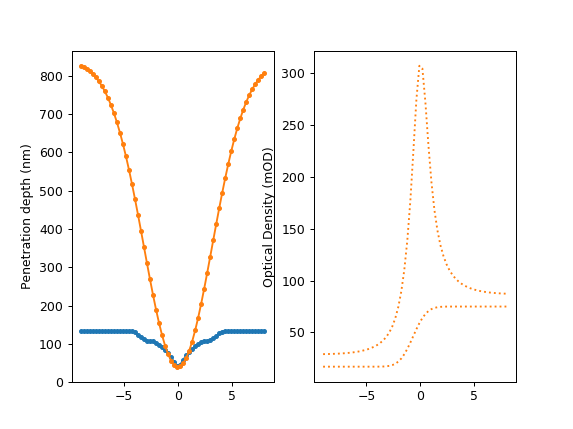

In [23]:
N_points_E = 62# 23
E_fermi = 850.7
Erange = 6
E_min, E_max = E_fermi-1.5*Erange, E_fermi+Erange
enax_abs = np.linspace(E_min, E_max+2, N_points_E) # Absolute energy axis to sample
enax_rel = enax_abs-E_fermi # Rélative energy axis to Fermi Energy, i.e. detuning

ld = np.load('../../Penetration_depth_deconvolved_spectrum.npz', allow_pickle=True)
pendepths = np.interp(enax_abs, ld['enax'],ld['spectrum'])
pendepths[enax_rel<0] = np.interp((E_fermi-enax_abs[enax_rel<0]), ld['enax']-E_fermi,ld['spectrum'])
pendepths = sc.ndimage.gaussian_filter(pendepths,1)

pendepth_simple = 40 + 800*(1-np.exp(-(enax_rel**2)/20))

ld = np.load('../../Penetration_depth_deconvolved_background.npz', allow_pickle=True)
pendepths_nonres = np.interp(enax_abs, ld['enax'],ld['spectrum'])
#pendepths_nonres[enax_rel<0] = np.interp((E_fermi-enax_abs[enax_rel<0]), ld['enax']-E_fermi,ld['spectrum'])

plt.figure()
plt.subplot(1,2,1)
plt.plot(enax_rel, pendepths,'.-')
plt.plot(enax_rel, pendepth_simple,'.-')

#plt.plot(enax_rel, pendepths_nonres,'.:')
#plt.plot(enax_rel, 1/(1/pendepths + 1/pendepths_nonres),'.:')

plt.ylabel('Penetration depth (nm)')

plt.subplot(1,2,2)
#plt.plot(enax_rel, 1e3*(25/pendepths),c='C0')
plt.plot(enax_rel, 1e3*(10/pendepths_nonres),c='C1',ls=':')
plt.plot(enax_rel, 1e3*(10/(pendepths_nonres) + 10/(pendepth_simple)),c='C1',ls=':')

plt.ylabel('Optical Density (mOD)')

pendepths = pendepth_simple

In [76]:
pendepths_nonres

array([588.51439792, 588.51439792, 588.51439792, 588.51439792,
       588.51439792, 588.51438985, 588.51404816, 588.50866882,
       588.4460117 , 587.9062894 , 584.48338763, 568.82008596,
       519.98579773, 425.17449756, 314.69466064, 229.54707015,
       178.44193689, 151.899755  , 139.79912839, 135.15431244,
       133.73350665, 133.40120807, 133.3430482 , 133.33549163,
       133.33476452, 133.33471275, 133.33471002, 133.33470992,
       133.33470992, 133.33470992, 133.33470992, 133.33470992])

## Run it for all the fluences in the spot

TODO: Find solution for low temperature error
      and high temperature Error
TODO: Properly integrate FEG model following PHYSICAL REVIEW E 102, 063204 (2020)

In [28]:
sim_options = dict(t_span=[-35, 35],method='RK45', rtol=1e-3, atol=1e-8, plot = False)

In [29]:
%%time
print(f'I will run {N_points_E*N_local_fluences_to_calculate:.0f} Simulations')

timeout = 500

progressbar = IntProgress(min=0, max=N_points_E*N_local_fluences_to_calculate) # instantiate the bar
display(progressbar) # display the bar

try:
    mp.set_start_method('fork')  # 'spawn' on windows, "fork" or "forkserver" on unix machines
except RuntimeError:
    pass
with Pool(processes=100) as pool:
    tasklist = {}
    for photon_energy, pendepdth, pendepth_nonres in zip(enax_abs, pendepths, pendepths_nonres):
        for fluence in fluences_simulated:
            #progressbar.value += 1
            fluence_photons = fluence* XNLdyn.photons_per_J(photon_energy)
            tasklist[(photon_energy,fluence)]=\
                pool.apply_async(XNLdyn.run_modified_simulation,(*(PAR, sim_options,
                                            ['I0_i','E_i_abs', 'lambda_res_Ei','lambda_nonres'] ,
                                            [(fluence_photons,),(photon_energy,),(pendepdth,),pendepth_nonres]),)
                                             )


    resultdict = {}
    for key in tasklist:
        resultdict[key] = tasklist[key].get(timeout=timeout)
        progressbar.value += 1


I will run 3100 Simulations


IntProgress(value=0, max=3100)

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024878508419978906,), (841.7,), (826.0621002884052,), 588.5143979189709]

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031869710117871965,), (841.7,), (826.0621002884052,), 588.5143979189709]

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040825535271300645,), (841.7,), (826.0621002884052,), 588.5143979189709]

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05229806998632003,), (841.7,)


Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.486694675213933,), (841.7,), (826.0621002884052,), 588.5143979189709]

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.152585845260408,), (841.7,), (826.0621002884052,), 588.5143979189709]

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initi

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2823.9157346543525,), (841.7,), (826.0621002884052,), 588.5143979189709]

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3617.474743319371,), (841.7,), (826.0621002884052,), 588.5143979189709]

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4634.0347050600985,), (841.7,), (826.0621002884052,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Energy -

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5217299755040585,), (841.9786885245902,), (822.1581283438142,), 588.5143979189709]

Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.51138434579955,), (841.9786885245902,), (822.1581283438142,), 588.5143979189709]

Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.779145152266311,), (841.9786885245902,), (822.1581283438142,), 588.5143979189709]
Ini

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(818.3500053125272,), (841.9786885245902,), (822.1581283438142,), 588.5143979189709]

Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1048.3175680791655,), (841.9786885245902,), (822.1581283438142,), 588.5143979189709]

Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2203.708703825087,), (841.9786885245902,), (822.1581283438

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001247233163256256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010074936066293283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001239590097902088
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001022810316444689
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023661041261786586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001097302806425171
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011879761210753514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022645976667594603
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [95.81706891]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024862044676248078,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.8170693]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010453688856801868
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03184861983660193,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81706872]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040798518332059996,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81706954]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05226346091702469,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy 


Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81707001]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.777232932225544,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81817528]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.400714533416083,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 29

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008923876448585943
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00803818056765393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008063737380738178
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81817468]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(88.0666337132535,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Lookup tables generated.
Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81707013]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.8145642865108,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0052437710643602475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022883994924610684
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Transmission:  [95.81817436]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(144.5170023938348,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02129070724173565
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81707018]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(185.12825992802212,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Lookup tables generated.
Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011617579544368706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00979312289489287
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81817523]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(237.15183719752693,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')



Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011448399910448215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004815915098574708
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008193617509070883
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01153684018029133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047778180747561905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011427689047

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011482958283291822
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002633712763884466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04080759258243982
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0418899918463

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04151377489064689
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014123192541191987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04122076113518469
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016901236488626292
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017967203827919942
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81817503]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013340439818874117
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(303.7947523950629,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01644715686943332
  warnings.warn(f'negative electron hole density found down to: {mn}')


Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010740343922225337
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81817501]  %
Transmission:  [95.81706971]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(389.16523976117026,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(498.52600364017934,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]


Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81817527]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(638.6186403954558,), (842.2573770491804,), (817.3373631837718,), 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009046581061091796
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(818.079227327325,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009074353387803047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007557589138292631
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81817284]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1047.9706977705034,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008473597502051788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00156595745739474
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Transmission:  [95.81706702]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1342.4648208872968,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011461007328732453
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81706939]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1719.7158271257538,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009695062386412268
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0074974401573661975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006300997689082877
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047859323827994515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005927135644583359
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018037058495776748
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81817248]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2202.979534400122,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02120219866298978
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004729957854887612
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01956034110910565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012435071090223238
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003900349175553819
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021203424919313152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009907075533441834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036658033530110323
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003343499068989342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011560403490492366
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.043489298069798954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011503140297155712
  warnings.warn(f'negative electron hole density found down to: {

Transmission:  [95.81817332]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2822.046964059751,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.042956199797081984
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.043188435427919725
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011426208592094644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011441170386454091
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81706996]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04111032262094416
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3615.080822585807,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011417806495596539
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.041336483832048465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04262739086223011
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.042773485491367946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030642276338503915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.81817328]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4630.968059804043,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001790299870414458
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001295709139886636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Transmission:  [95.81706977]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024853820973035564,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015301665942226483
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012264986230514863
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035628076592870705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0069555456129026805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/X

Transmission:  [95.81817404]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03183808516012318,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005133568764165819
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006209905751944023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004621963172640076
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011410935190554472
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007251616449186482
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015075120602115799
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006086599232125067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004804484983445212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029876677151821074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007437865033408819
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00554557684

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017376005307212505
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002077643097519566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015948027133907416
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.79579315]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040785023267167216,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014376954429828892
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.81817333]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05224617355401665,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001341048590024263
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74476829]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06692806408753199,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024883818876526576
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.81817193]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08573576700068943,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007255189312358246
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019860542261564307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037455203840246476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01735818728772376
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: Us

Transmission:  [95.78359302]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10982869209518718,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007501531303897746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002962847527917978
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004372284097012402
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013020380489929817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004820863612681858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036268583607406146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.81817405]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034655256913702637
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.14069205921074376,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003065251010438086
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031275198184772535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032251382501262693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011299247786897837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010290120806608627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.
Transmission:  [95.80433392]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.18022845530932696,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016120780136401613
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007423429578422347
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0044763691341276335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02904137250581762
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032727015280757943
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03196618034307619
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.68368468]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2308751203543821,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013935420708188762
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005080589850632089
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007645823056415146
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81706832]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29575419212890247,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004894332394443479
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006842247941135193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004534267710949447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021812120503661436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024707422232097542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.80702673]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005711179190290849
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.378865171905736,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Transmission:  [95.76691763]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4853314756079646,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002470097034395158
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.71729798]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6217162692231046,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016235867375564705
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81331992]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7964270582955658,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.17576978247012787
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001156007431709405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.5977293519264937
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011839478885786736
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80989056]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0202339726093121,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.6065194094467776
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.79975262]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3069336959667859,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001260356633605797
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003203540898221613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.13242664635455315
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002472375939613025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019127254934412363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001543253159808966
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020144965830242167
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011241749153636516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007145795343855177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003669541250304942
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016855855238452122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.72803104]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6741999693314396,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.78908392]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1446730970050885,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016521007650438513
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0059158702745443215
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.77417662]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.747355618967172,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.75417551]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5194001862618376,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003139254781491241
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001530075543921594
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009499343521929493
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.69520246]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.508399853862498,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010500316776274943
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002642093828968628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019342610453383369
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032056972995309074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.81706795]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006139152963843264
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.77532197720785,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00894523412717696
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02947911561501204
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00823811288987586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02585765272864604
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWa

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002314675976750058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003041752493846417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01117077476611339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011436584885853307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010001004078226128
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023261693937987937
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047231603935580235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023856099048580326
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006137133333496747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009983355570737151
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015762461458377341
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81817225]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.398266573858616,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81180733]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.477280836268752,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0042294593845331185
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81472573]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.140526588603432,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002412586803523853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014484969900347977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012675107506413985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07693730167

Transmission:  [95.81706565]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.552180883416403,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020626037752984328
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81523668]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.922556774230156,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0712004026742199
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024240218219972354
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81817167]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.521068163864715,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.11283046234714722
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81706856]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.6928379527631,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10563397563335486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017255662210818645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014257897643160877
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81733717]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00445080747745541
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020919124557414293
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.87997330452522,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004985138011060597
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10228107801355679
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010121487225291048
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09454974365704527
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8181717]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.648819552525744,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00746564775711156
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003597252701490694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011824419705651623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010120457535491845
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002218142653456656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009392582085760104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06778685184873146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06251190902787984
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015330814433005546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010315303810773058
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81626451]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.72487282766423,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015448505704342974
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81706834]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(88.03750361281269,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Transmission:  [95.81780597]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.77724822876806,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013840965585567577
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013444616788680364
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012168748524816753
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81802544]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(144.46920001264186,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81817059]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007808865589389091
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(185.06702442282844,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005623303115059208
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81641416]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(237.0733936764565,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005516473601561378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004994060480703055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01351209586229385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010958517152016345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.81694634]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(303.6942651699071,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035902567454841883
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04486650018708849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029564309347873685
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0041987124036988455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.039737540033720764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018290530506106517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005415704452939041
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008183851730286351
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03609467675788269
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020598623647225534
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001356490221201323
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006474377549112287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012576713607923784
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019179617853108955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.81675769]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(389.03651424908554,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.11082200374098505
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8181689]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(498.3611044956784,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013264150645569739
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010263867902050361
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012528870260486435
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81815225]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(638.4074023322563,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006794695620306879
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0043171458757313985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019540262178847634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002077972480453605
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81811239]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(817.8086284744362,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Transmission:  [95.81803121]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1047.6240569327886,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.037357444479851454
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04072858378159849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.032578347333821256
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81706152]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1342.0207692252561,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.14163356323303233
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.13004566893410474
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81803116]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001284112739671217
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1719.1469908632375,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]
Transmission:  [95.62607864]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2202.250847354866,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001049209109706517
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62607636]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2821.113505971874,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010901155653391115
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005268592776479064
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62607468]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004815967466850202
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3613.8850499869986,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81702151]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4629.436258723063,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00849135678001689
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.62607562]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02484560270838877,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81816912]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031827557450521626,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005490648576190527
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.62607841]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04077153712693956,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Transmission:  [95.62607195]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0522288976236269,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004983006097851517
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003767526599490534
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016079491858593808
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62607854]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06690593338402505,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.62607824]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08570741726630966,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02191473847790082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10835303556744602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012432463771607782
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10081693370458655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [95.62607775]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10979237569705955,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Transmission:  [95.62607802]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.140645537407213,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006983969481975549
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.62607694]  %
Transmission:  [95.62607]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1801688602416622,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.23079877825625997,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Transmission:  [95.62607739]  %


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2956563968553326,), (842.8147540983

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03308400525905264
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.035860556935542354
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01123312555416045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012577819647699107
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.62607348]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37873989482051224,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006581455987497931
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81816148]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.48517099394551544,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013877396476906778
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06111108182247049
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001369873002929456
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.055837795211677754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.81705826]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6215106900149322,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81803122]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012628023328398186
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7961637085134923,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011605333030424436
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8180311]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.019896617930623,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Transmission:  [95.8180313]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.306501540001676,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014328591369461297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029882682701163343
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00152305532684327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032881648992109103
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024634016557263383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00106238641

Lookup tables generated.
Transmission:  [95.81803128]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6736463716196612,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81803129]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.143963930752094,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018470502514167375
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003710666101745419
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003809698389220184
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009785784413259835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007196136998435243
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8180313]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.746447167281613,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005397255518177824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004909076402368706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012837489174053474
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81803117]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014179662590245723
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5182364472069834,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Lookup tables generated.



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004774139993228399
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81803041]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.506909088190176,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020148294693709268
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81803094]  %
Transmission:  [95.81803088]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.773412285958337,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.395820233205504,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81803126]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.474147040377611,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81803127]

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010332751550410357
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018030475492223363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00949783640371793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00800275640297321
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0078721307435

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015232934269183929
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016298224762635982
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81705673]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.058358835893206784
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.91596910128485,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00710255401708193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012367212160470764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019965133286601322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0057806409316027985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016517913880917945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00502054336798996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.073730077038203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01372008808384173
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003639967249196241
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01170557454573573
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004809627607909039
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001110190202790129
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.81803118]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.512629264571643,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04635375808991604
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024196025455860415
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81803085]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027350160202614937
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.682027607157,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001491931037017169
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04271159820624004
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017955462590124593
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81803056]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.86612510370368,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Transmission:  [95.81803109]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.63107981755505,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022396513813160546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019073015323893383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001408844325962777
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81704369]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.70214798413502,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015016238974197016
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012914916857240444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009556295841257167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019613845982937583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020957081259453947
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014231738256179849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009262908694036787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006511701182539964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001224649628801533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011986033435676946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008640937898540368
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006334834808896295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015794943492090763
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031798804270046777
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010864841247624213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012769445259342316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026884656117120986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011393834486705057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002242389263199751
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019239468759326694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00413466219554226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.6260677]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(88.00839277692478,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03041203912284507
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02827621709785011
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016365326411835746
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62607128]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.73995684918151,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011109713113208741
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02480261147112528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022766691166568043
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81803117]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(144.42142924450513,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01980894337706962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003905136758474592
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017985643533286133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039835032236

Transmission:  [95.81803115]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(185.00582941439285,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008650682402434162
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014037761383096647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06869777708380953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011365197981754172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06327783986903679
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014334758840321982
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013863697415732457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012128194057716701
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001972851749473925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013326755155389503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015433048994730747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010917982

Transmission:  [95.81803109]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(236.99500203228797,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001183388354152104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010497223368450825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010560941408306324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031483798679565744
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62607466]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(303.5938443997733,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002453641776868132
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026256078899400404
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019881073820404715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020393958293731806
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015159594420464106
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81803063]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012683443642445003
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81803088]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(388.90787386679443,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(498.1963144036093,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.8180312]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(638.196303966716,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011917631114570781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002564118034456664
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001453423073058513
  warnings.warn(f'negative electron hole density found down to: 

Transmission:  [95.82035211]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(817.5382085761627,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81803105]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1047.2776453383876,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.82035208]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1341.577011227041,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 t

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011479475060711675
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81803126]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3612.6900681861675,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.82035216]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4627.905470665124,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013948197487905212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020528989594896796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002394833401732077
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021912820946252687
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62606349]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024837389876914466,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011931038003303307
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.62606031]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031817036700888465,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.82035226]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040758059902526775,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.82035221]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.052211633114518145,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generat

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029683578202677197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026119119237688615
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81803176]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.505419308077142,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.82034792]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.771503857223774,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.62606345]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.393375509851337,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001354778907188381
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010195501215386482
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62125468]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.471015316268574,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011033740464467812
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.77641958]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.13250037164651,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009251395830259357
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00981322583738753
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.73194966]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.541899189536602,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.82034962]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.909385783512445,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.59038133]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.50419594431471,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.55063736]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.67122440837264,), (843.0934426229509,), (795.6715815600649

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012602633496674231
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010145050016434176
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.79076084]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.85228605805868,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.62607265]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.61335181049093,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]
Transmission:  [95.82035029]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.67943816421482,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Tra

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022446190893548046
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001830432048893993
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.60268676]  %
Transmission:  [95.57319329]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.70269012327874,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(144.37369005807506,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025777766433130456
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027577664600135776
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.70064576]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.94467486255616,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.80814069]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(236.91666221357684,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]
Transmission:  [95.66243779]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(303.49349001876044,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Lookup tables generated.
Starting to generate lookup tables for T between 296.0

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025756425098741875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025641589597125147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025752627298634145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002755536550216542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81802799]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(637.9853451603018,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81803299]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(817.2679674550418,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025713288944881896
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002569615490527477
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025813529227476373
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82034965]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002751010916095087
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1046.9314627599683,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027492957143342434
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81671334]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1341.133546601436,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002761431828034011
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81253511]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1718.0104465273055,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.82035021]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2200.794918490048,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.6174475]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2819.2484411500322,), (843.0934426229509,), (795.6715815600649,

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002562833279943222
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027419436362845495
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002566333846313773
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62482925]  %
Transmission:  [95.80116562]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4626.37569462565,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024829182473226546,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002745847048791994
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00319787388667625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028933528122307983
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025611524845321476
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027397533611130953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002570350224890383
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027469513461522155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003119358399079619
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003125694699296133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010379324463958728
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81526732]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002697793141627436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026910008249467765
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03180652290432403,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009750666776977335
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031855250930705736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006932180947066824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00287956677906287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006685984688820978
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81803084]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04074459158509027,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007479503444455693
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.80750622]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007188048927468493
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05219438001536804,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002583802591811679
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.6235478]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06686171585495931,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002758729594158682
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.80750623]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08565077400580287,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002987915525330731
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007540189109530138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007243768730068378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007548953900820221
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025303005974637305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.62607435]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10971981490434607,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013600965625244266
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015190979703817664
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80750624]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013623904916644669
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.14055258603767493,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.82035106]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.18004978826386395,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Transmission:  [95.81747277]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.23064624542143194,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]
Transmission:  [95.81781114]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009297532838789646
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29546100020424065,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006308950206871389
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009510648519807097
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0088818377207589
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013303888356692495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006495058821206934
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0071281938192822025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011404281385722026
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004295719378166307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001719506697689166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015527622338399327
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80750625]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013938012627835228
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3784895890335583,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013490079464524074
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80750626]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.48485034880327527,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01232621560725522
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009614667200162463
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81794861]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6210999391949316,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008770813500210695
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80750629]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7956375310858461,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.80750627]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0192225774372556,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.80750632]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3056380848954172,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]
Lookup tables generated.

Starting to generate lookup tabl

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014642104051600935
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80750665]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.902806816595486,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010592720071664896
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.80750655]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.495768197563216,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.80750649]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.66042834932509,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]
Transmission:  [95.62607752]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.83845615851437,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Star

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002319889047250445
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80750667]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013808492316420562
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.59563551970709,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Transmission:  [95.80750663]  %
Transmission:  [95.80750575]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.65674335301016,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.95022882241712,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81800085]  %
Initia

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015802946212211122
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82034195]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(144.32598242204352,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.80750419]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.8835607272122,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.80750306]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(236.83837416894667,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013631508897855582
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8180202]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(816.9979049338449,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011475507180056521
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80749925]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1046.5855089704987,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001494583277508621
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038221650979912702
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028979884888762353
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001189570504980919
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00293495201286631
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011856756467416574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034720823394300826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019207739288136239
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005342281126933246
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031689701683705884
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00795694151188786
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.7975601]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1340.6903750576096,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005982697569543172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015460963967284247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012622095079184437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003994682640712899
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.80750367]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1717.4427377082795,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.62607609]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2200.0676757153487,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.62607766]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2818.3168331925244,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003214741841837787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021970051914381727
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82034517]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3610.3024738426493,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015242621398785516
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74695683]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4624.846929601389,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.62607282]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02482098049194603,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014498502486116616
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012203657081943042
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81544519]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03179601605393776,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008770761393943616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006363932078302437
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.82034891]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040731132165803166,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0062328754628813154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0049965315487419115
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016588983155481074
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.78530847]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.052177138314869205,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024703624401050117
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001172851942272457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002532899066739258
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81801538]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06683962900041157,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.7689321]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08562248044254057,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017445947731111744
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015454200801763296
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013033894213941855
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81902398]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10968357046218945,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]
Transmission:  [95.80607301]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011080302757590088
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1405061564107288,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81178593]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17999031127566695,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.62607557]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.23057005458472565,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Start

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026667947837843986
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027594452093883115
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82034331]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5147498431460313,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.80750259]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.502442700622138,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.82033311]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.7676907822948325,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021658517709877145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022249636347082546
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011387196836654123
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011391894165199146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019221035054427515
  warnings.warn(f'negative electron hole density found down to

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016285921746247434
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80750457]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.3884909086288015,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]
Transmission:  [95.82029869]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.464758075184195,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001612696961025284
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012792407063292321
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012516236097814826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019697756379695175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002831339331724081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002395773856114558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024926200414178146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026693818334081465
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.8203411]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.124484760094141,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027910240149789933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001591215455441386
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015888098785645788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019082678908046713
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [95.81971226]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.53163108132533,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002222218708890722
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006773440932491437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002175303165467435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006892027230159581
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82032348]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.896232196222243,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004590754989883927
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004295527944978672
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00265349034399609
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027070307070440336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027751882368135528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002828651176900343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001295162175334097
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012853155189057608
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80750344]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.487346018793765,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001978837593067828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016630449755372645
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80750252]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.649639422938826,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.77203494]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.82463539600687,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.70311648]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.57793093359258,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Tr

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001030122843195258
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.75450399]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.92117566566512,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019023925981862533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019008960168337419
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001979215508274512
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019753770829034067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011854946026125246
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001156586451178221
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001407145018124445
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81811616]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011621271201699424
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.62823053479637,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.7937161]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(144.27830630514381,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.66761731]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.82248696830794,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006965574909957528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007912497920547823
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028194422519505213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029136934340060483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005661599750503177
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.93556442]  %
Transmission:  [95.81811609]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(236.76013784708886,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(303.29298016092866,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011990795304963608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023526909784836736
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.93556453]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024161759484693235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017002515687480901
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(388.522462655039,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.7847467]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(497.7025973612741,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.93556386]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(637.5638456716342,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019397118940931435
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006841912835541475
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019529113626769457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007778392717581184
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62605042]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(816.7280208355781,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]
Transmission:  [95.9355641]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1046.2397837432468,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013385977125721649
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001329755503532759
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.79962177]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1340.2474963051156,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006832593118269337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007768371493469317
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81810954]  %
Transmission:  [95.93556357]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1716.8754039589612,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011196267286470718
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2199.340913410084,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.80750257]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010949882240267605
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2817.385840722944,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Transmission:  [95.81811613]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3609.109859734658,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00453589153078493
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80332559]  %
Transmission:  [95.93556428]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4623.319174590415,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024812783927701032,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005238399302179619
  warnings.warn(f'negative electron hole density found down to: {mn}')




Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.93556271]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031785516142848205,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026376299008767923
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.93556319]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032622876849697224
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04071768163585022,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.80712798]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05215990800172921,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.93556209]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06681755673322651,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Transmission:  [95.93556131]  %

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_c

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016995620897111152
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.93556031]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10964734995783806,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.93555743]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.14045975744843914,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81811178]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17993087356

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003150097492201853
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6206897309393934,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035819160470678124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002507190802386816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022359254207928725
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00311540039040481
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81810946]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002564025648548851
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7951120486907094,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.93554566]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010651034627153777
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0185494272900544,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Transmission:  [95.93554965]  %
Lookup tables generated.

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3047757703347953,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016322755138611367
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.93554073]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6714356370335983,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010781586939820897
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81810784]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019247938105162454
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.141131949460611,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001923677527167822
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81811116]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7428193604494995,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015495063054191682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015307302997916716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005025926325756602
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003946586258964269
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80658986]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001226878332966086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011792680205858774
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.51358917695463,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001148868850296969
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81811]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.500955871329999,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81811265]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.76578613360226,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002750082246286256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027000457930310695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018362584993103503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017868709434050167
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81810842]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.386051027560211,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Transmission:  [95.8181117]  %
Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.46163255410932,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81811236]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.120480924778054,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup table

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011532667568817656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011230461449658335
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81810838]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.889661918086674,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0058894320496925
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006822218247469314
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.93554626]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.478929402490262,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.93554706]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.63885762214764,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Transmission:  [95.8181113]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.810823761484286,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem b

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0068538570856298
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81811134]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.59103762343342,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007781388492128505
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005419369568409049
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004351697554973333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002776282779745065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018595158525027689
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.93555238]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(144.23066167615048,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Transmission:  [95.93554601]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.76145354584312,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81811401]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(236.68195319676258,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup t

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021421869011122308
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00214026583313609
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016497496280603041
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.78492698]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(637.3533047132289,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016255923477536127
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013757736551592847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013437808043146315
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.719672]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(816.4583149834809,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011442511064816419
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011083485627806366
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81811175]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1045.8942868517802,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.8074528]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1339.8049100538906,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81811082]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1716.3084449077758,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015994549362488009
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018444569928579568
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015658107803261379
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011232596912575943
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80736002]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2816.455463131538,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001206947213051146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011706200041620152
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80749116]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3607.9180332940323,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81811592]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4621.792428592128,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.93554924]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024804592775126772,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016208143042150125
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.76863798]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015876274771777776
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031775023164183,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.68556558]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040704239986427845,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.93555474]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05214268906467054,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]
Transmission:  [95.81811615]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001504225560576944
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001474799537495186
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.747416]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10961115336758503,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Transmission:  [95.81798726]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1404133891204371,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81798747]  %
Transmission:  [95.81798741]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17987147510590515,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.23041782382322287,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
T

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02849448931186971
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025007655551506858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026840391382056517
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81798736]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4843701749709915,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02401601115008334
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81798752]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6204848299374658,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.64442811]  %
Transmission:  [95.93554861]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7948495677001267,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0182131855451673,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01046742483129437
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01994738937138818
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006728696092223263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002101796986856641
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80496667]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01745026704491992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02606679374739418
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.304345040053133,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02311095532795071
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005642951485182346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0245803482141862
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006112257647870045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Transmission:  [95.81590928]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010205874371427948
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6708838656418477,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003316072111100965
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81798724]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.140425122748592,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002824777696735392
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01727040910771871
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008210801356945074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01968769597864317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014955274266922336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [95.81707074]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029720558851371592
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7419139057479818,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81798759]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.512429277077391,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00712466095501707
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002260263296828713
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005106489760853261
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81798737]  %
Transmission:  [95.81798762]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.499470023696799,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.763882742428239,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81798761]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.383612757390113,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023099579804193304
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.93554782]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.458509096617485,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020520618262811485
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02107658654441935
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01844950282115132
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81798771]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.116479732940107,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81798773]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.521376531873324,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81798753]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.883095977888416,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem be

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020441360501318506
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.47051834314389,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017102720243076242
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012996855900853088
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017584623616594186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01785975404703466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020329495791632457
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01534973037234666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015068030741827387
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022768657418339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01773826592609251
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01928132600233745
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8138659]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.62808293989467,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003524687149894623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01058982581986978
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012478467579332575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002107959954786187
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015081289241136941
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00849874811776008
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008119638679694896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010985714108374456
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006043219343619288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01280727421208705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002162730795884471
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81798762]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.79702124590668,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006755807715667306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016446914441192728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004365515278679233
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81810774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.542556829004475,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026058531175485733
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00494798723343326
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027322534765210627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012623747080141356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025438406702309457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010265871237397972
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019405282191500284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012857146328157931
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016012654812067595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015573901865764128
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020081609977098402
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006908110928159017
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013670789927551663
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018297965407518824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005020876219143489
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81798749]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.58874882304991,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001590376681987804
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011811810253872235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013621497306657293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00121861196486317
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01146070727739068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022166397130385374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00229211751557834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00195433304502024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [95.8179237]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.86312689802305,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018064803727423362
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007355223085769191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005303415064622952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015313783381449175
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81810155]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.55386926818738,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81798743]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004168038040973876
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(144.18304850387938,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036888090648854455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02484165020467466
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011162092111099975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023988473103850882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022685406894282112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025226818839894083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.81042936]  %
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004106895912099118
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.7004604198704,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016338387419785327
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020274330434548737
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81811529]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(236.60382016679475,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017829440573733368
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014461963586840376
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81798727]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012082867032305877
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(303.09273507094287,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040045924141352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028190052522822917
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81764748]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(388.26594595143916,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011163516737351387
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023481334815114163
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001776110970494571
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81811558]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(497.3739959497218,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81798697]  %
Transmission:  [95.81810884]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(816.1887872010266,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(637.1429027616451,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 29

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010761397270493411
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.93554749]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1045.5490180699653,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.8179873]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1339.3626160142546,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81809295]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1715.7418601836396,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Starting to generate lookup tables for T between 296.0 to 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Transmission:  [95.81798562]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024796407028865545,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81807716]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03176453711107886,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014644401540919727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013416221573481213
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81810548]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04069080720874406,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.8222126]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05212548149243055,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.82221271]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06677345590317683,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 


Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001134379264568386
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.82220813]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016714979670757746
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.876534371332802,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.82220839]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.46211283525311,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040008559604465255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032443786102287486
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82220268]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.61731536913236,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.93053471]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.78322784024605,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.82220683]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.524887287385596,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015693439802733078
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013244443392446126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001672829303416723
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014284446492693892
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015084702238405967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [95.93283078]  %
Transmission:  [95.8113087]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.56611389816602,), (844.4868852459017,), (723.897667343623,), 588.514384856016]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.83413124915167,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.93548798]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015942636101078378
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.51672544474705,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001699122966547728
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015854969911865968
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016899577023403722
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.9355531]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(144.1354667571874,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81798363]  %
Transmission:  [95.93524984]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.63950755049515,), (844.4868852459017,), (723.897667343623,), 588.514384856016]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(236.52573870607975,), (844.4868852459017,), (723.897667343623,), 588.514384856016]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012939158796652084
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012945377609452358
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.82220899]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(302.9927116500625,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029292585968576645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002920217460468111
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.93541125]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(388.1378145789854,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002858361262524145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019532881697394977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028552032970512453
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81798404]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018531456746211372
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(497.2098579062277,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.78668941]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(636.9326396792623,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028573713668127443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00285398332331388
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.68888157]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(815.9194373119211,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Transmission:  [95.9341264]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.7499352]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1045.2039771719676,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1338.9206138969105,), (844.4868852459017,), (723.897667343623,), 588.514384856016]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmiss

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015536673850649052
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016536112504530465
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.93555069]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001597135433848873
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2197.1635045541116,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.72270095]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017021315980472185
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2814.596550148265,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012629370786535699
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001554759121152438
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011053487755435132
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015540357763077495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016565128922181316
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.59986774]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016556954203807983
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3605.5367402956263,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.77082013]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4618.741959637809,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028858659033139666
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002880238766926224
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.79828808]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028744566427698626
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02478822668356671,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014860776985396562
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028696423741751964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015039618121093112
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81424203]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033709798505747735
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03175405797668153,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002630245775689488
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001253707923517311
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012465826758647491
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82220862]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017567957593187522
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040677383294018495,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002896790175677788
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81424203]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05210828527376146,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001576062130978828
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028899836016069713
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.93554616]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06675142731147608,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00296023274828916
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033684135870837295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029480113895354876
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002627708900935888
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82220784]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08550949287066416,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017054672319527509
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015306984517373667
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81424195]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10953883183470275,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Transmission:  [95.81424196]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003330124669963297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034302637835756933
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1403207442460206,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002592656656912773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002684471355976603
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82220953]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17975279575255657,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034372068410717382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026908323717145244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00427101057325463
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031896941467508544
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82220729]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.23026579394569377,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Transmission:  [95.81424201]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29497363665169124,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001595201388751022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012689448327622976
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014117862465357733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012256925344810154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019403381533607655
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81424203]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017394085616392108
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37786526964593403,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.9348799]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.48405058711464544,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003511948700493095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017267892164649634
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010601154872106111
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014175317975294588
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015480145163329073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002759100224103417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.81424204]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017297816401642407
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6200754335151802,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Lookup tables generated.
Transmission:  [95.81798248]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7943251252745086,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015511633298981309
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004120556415176502
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018099259154485736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003794744086287327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Transmission:  [95.93553897]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.017541367613167,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001541052460705794
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004290767291418751
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003713171208330257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032073335089064514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012194050041018922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028182267788667836
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.8142412]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035385371470990634
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80617805]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3034844320784342,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.669781415036057,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030476445229936644
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81424164]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1390128684191643,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.64811165]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.74010478860431,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003301378523973275
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.81724847]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010098654683565744
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5101117732317104,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Transmission:  [95.93552596]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.496501269521023,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81798042]  %
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81424067]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.760079727657577,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lamb

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008796315664771015
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.452268364213598,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006773266721836091
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015979805028974114
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012434436752602362
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.8222071]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.108485269233618,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Transmission:  [95.8222064]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.511135514342346,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Transmission:  [95.81423802]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.86997709413081,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem be

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022870834106119453
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014819351244298007
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81423652]  %
Transmission:  [95.81797146]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.76944353548628,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.606554902822474,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012418161075127276
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81423645]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.5072294041454,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001384301087345774
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014497177043766296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001149946572576832
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81797557]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.54349390782495,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011016559797158987
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81454417]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.80515473163423,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.8142391]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.47960612883323,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013061782940744227
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81423667]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(144.08791640497267,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.8142333]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.5785948978753,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81423025]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(236.44770876357939,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Tr

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008119457426197352
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010922825022909866
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006278107248985476
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014037092956928898
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002567671079855227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027828295730762953
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018740499450309311
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001959377231716797
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005039448536270585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036615551461116613
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82220899]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(497.04582816115527,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81632753]  %
Transmission:  [95.81423539]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(636.7225153286413,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(815.6502651401031,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.8222024]

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014118350109157962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010341228917196688
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030915294024427276
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025042200846505658
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0409463424210057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.037513414391966426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.81423292]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1338.4789034129417,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Transmission:  [95.81424003]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1714.609812234626,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81795417]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2196.4386593729396,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.8178665

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003385655493977069
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002737103866938817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017203656609108275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014361979952146608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012130042192901591
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003712036865198609
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002666722080670425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019117769461438616
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.8142391]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024780051733886692,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015176492511854711
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82220863]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03174358575414583,), (845.044262295082,), (678.380747083319,), 588.513929559305]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012869509550139657
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.67319026]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04066396823348237,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010016409720488006
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82220041]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05209110039743033,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004245475652730812
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81423617]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06672941324946566,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003538255736447171
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014273140111151772
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003161612120784696
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.74009341]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0854812925556394,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025161217379536804
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.71067309]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1095027068448159,), (845.044262295082,), (678.380747083319,), 588.513929559305]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81793382]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.14027446763906853,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81596218]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17969351478506831,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 290

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004582488292264708
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.818291]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.104491992141199,), (845.044262295082,), (678.380747083319,), 588.513929559305]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.50602007167965,), (845.044262295082,), (678.380747083319,), 588.513929559305]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035187308466497758
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.78198159]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.86342414199909,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.82220099]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.445318451868424,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81829147]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.595801533936026,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to ge

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022516676209474173
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016867877319841629
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.8182909]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.77619732654269,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010396796033855793
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81829031]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.44251129619877,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81829101]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(144.04039741617424,), (845.044262295082,), (678.380747083319,), 588.513929559305]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81828605]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.5177224222214,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 290142

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008483668117775345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00717183593188242
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81828694]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(815.3812705097436,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001618313214453826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00964397324254107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010423720957992932
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011951202275577444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00652637313379012
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00586970101617279
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007884679516008797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008482006078581072
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004856770136338007
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82218372]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1044.5145781255728,), (845.044262295082,), (678.380747083319,), 588.513929559305]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00425274458329894
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81828894]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1338.0374842738138,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81828715]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1714.0443482700264,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012159146545158261
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01238195352890692
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81423116]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2195.714292287515,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.82219261]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2812.740089380761,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005952789203342412
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005952756168218887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00637239115786592
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012201034926217602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012426220656915898
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81828803]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3603.158588619217,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005780384717960496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033684944126997074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035905383513052946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005658288462655481
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.
Transmission:  [95.82211909]  %
Transmission:  [95.81828389]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4615.695514760003,), (845.044262295082,), (678.380747083319,), 588.513929559305]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02477188217448896,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01040588628842598
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00810645545208688
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007906194484589069
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014091014460204665
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009767711194938133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035723575179529288
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82176878]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035852750836919967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013925170351538618
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00850497645324122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003621160022858172
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03173312043663558,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.8220124]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036345929686290024
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04065056201837844,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016271209624301175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0052115639165268846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019070519192359026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009666460808443578
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010447714430430466
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.69349826]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.052073926852219045,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010303455756504043
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020137030906914877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020125415729521645
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006423394909879532
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007212629103974466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012188516422304119
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01241335161934165
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001329487965617382
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81828568]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001307876588567236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016282757009606907
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06670741370277497,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008121991692257469
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009669370466643734
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008102887885464316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01045076272754808
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81423462]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009656327342865811
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0854531108349381,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009250442438717199
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005214714674983023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005333480795727041
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0054890362120205705
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.6079366]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10946660567451215,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005602881086012479
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031498547943544786
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031846297622846187
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017278442481611922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014333432414037617
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017198313653643549
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014176224537858495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001599402317259191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01037661494136044
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.77145727]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.14022822154532874,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Transmission:  [95.76133554]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17963427290542303,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]
Transmission:  [95.76133555]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009737451753168758
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.23011396455477026,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Transmission:  [95.7517605]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29477914112187803,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009638111178040143
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009233257669087447
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.72561362]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37761611820768337,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]
Transmission:  [95.76133554]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.48373142070890857,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81422651]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6196665769768988,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015814231154409608
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01029572284025626
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009653747720589356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001093759744688061
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005499749256240527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.76133557]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7938013744476962,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007718996877803752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00335634521440209
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005739521838075579
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00336884268310933
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.76133556]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0168704356287115,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007910900432761547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005885331039735542
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81828202]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3026249590146781,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.80414419]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034901214560660865
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6686804182667316,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003538255330945317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001907898761265736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018744886854908938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004235659286296212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.55384734]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.137602476474166,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017369391882937624
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019457871343830924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004040161322029556
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004567114351561541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003267198676527139
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.78624834]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028180498311760616
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7382980572006064,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.65421937]  %
Transmission:  [95.7613356]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5077973255516133,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]
Transmission:  [95.76133558]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.493536430335228,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.756281728042717,), (845.32

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032495852453249263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002827128491996511
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.76133535]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.50090800196493,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023437265501662363
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.76133564]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.85687551065994,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019885177358109907
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.76133563]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.43692956540769,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024091499837526342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020505948899178783
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.76131827]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.58505525545332,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015864385947792492
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.76133386]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.74190219266441,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.76133047]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.47194856667827,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.76133478]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.49829867168731,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Sta

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002901530525355467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006985969922287616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005327691807319956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002419942583

Lookup tables generated.
Lookup tables generated.
Transmission:  [95.76133262]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.74725901497389,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002316848550856232
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81420711]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.40544092262857,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019631715549488504
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.76131138]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.99290975977217,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.76132767]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.4568900837965,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010255715874498694
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001353130707345107
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81421776]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(236.29180322940655,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012517867974315422
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015927432797064878
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.7613024]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(302.6930370995628,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014845620541892313
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012624591234737803
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.76132363]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025817954308673396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011611011122716342
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(387.75392737429826,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Transmission:  [95.80870369]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022155737910238837
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(496.7180931378257,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011304747279932137
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005502025150718293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005045181023230372
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012120394280143998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003051179943981408
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002476608082945253
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004659016056757226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012667498358793772
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007261857957469253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010013020741892475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.81146259]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002230781153619077
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(636.3026822738349,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017368470917284995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006026354266462475
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.76131612]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(815.1124532452454,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0054713214938080235
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81369492]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1044.170219526994,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010660542733751388
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8015078]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1337.5963561913727,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81295015]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1713.4792571530297,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017592351622106595
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012474994614946056
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.73754136]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2194.9904028249775,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010026828130285104
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.77883971]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2811.8127770620727,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017460713292192231
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010675000147681857
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014164988738729622
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.76131244]  %
Transmission:  [95.70829985]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3601.9706888349356,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4614.173798862287,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.76091509]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024763718000044024,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010448448309827718
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035139042312537505
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81827713]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034971236368012137
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05205676462692427,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006471457742841524
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0055404786611878976
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.62736942]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06668542865705242,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.67141008]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08542494769017564,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81827994]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10943052830024051,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate looku

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Transmission:  [95.81509545]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1401820059346321,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012079530759595558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004058436515798625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002859615076387545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040418391144447785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.81826997]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1795750700749736,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002563371700584849
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.76132317]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.23003812491789455,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002714212514311587
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.81665758]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29468198950804847,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.80809222]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37749166565940495,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81809296]  %
Transmission:  [95.81813176]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6194623508306375,), (845.6016393442624,), (621.90

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017189063314153596
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.761321]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7935397579564674,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001574275487486565
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81827349]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0165353013193403,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018254285539107684
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81824624]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3021956473730831,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Transmission:  [95.81809246]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.668130464172343,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]
Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013648183655479151
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011131756187958697
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81413858]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1368979777449644,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81809283]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012885305622043486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005746554721811847
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7373955846769706,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004832411384222635
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81809188]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5066412458850964,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81809267]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.4920554764443,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00130960505321287
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.8180922]  %
Transmission:  [95.81751319]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.754384605819588,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.371445514271368,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81808966]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.442922691492944,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem bet

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034887819201606662
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002560803844289583
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002844098120623917
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81821131]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.850331195841285,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001892236688632698
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025917172927465426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003409840263963293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025242662714524133
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81809148]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.428546208468855,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81809039]  %
Transmission:  [95.7613242]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.57431606036392,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.728145136629514,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003328540520350254
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035509470032745183
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81418883]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.45432558942793,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018426098478332431
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011903737324810981
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025178664105889315
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027333491067750293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002293454180677834
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014262439533493376
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003637985031170965
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81239587]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.47572339639746,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024035240561182114
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004044980588057578
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028328271549726836
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00350981956922225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003569366477087943
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.57503208]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.71833977804965,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00939228956686411
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81793883]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.36839498393937,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00203138999155561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002474169857840214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012011647749049503
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027335819283653695
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034021820818324056
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013736412620293237
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001438083743879659
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013285359177204192
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008958626373661405
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007923521225752128
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012465628488154135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003815453246697076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003450502519763643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002489615348359675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.81400975]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011802902641154911
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.94545340478743,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008578497423962439
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027168631955866163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011862984866116921
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029920385860494614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007676428540068669
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.76132382]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007740581357684073
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.39609784291602,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007281777857703897
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002595898103443295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010892639982020835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012308381729373985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015100675456446444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004772116260867709
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015757336593885674
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81808394]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027936222286757406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0525964513736924
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(236.21392753599395,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00883958922558492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005955882982319527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09407744400647822
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8180862]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(302.59327726941575,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.17759819006809807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032154469429481747
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008684817660235544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09105086762270753
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005144610204439015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05189949385392634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05236329755344071
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.177322840484607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWar

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.043757986345725586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10859429463335057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0052560824068274
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005740415181783587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013977269730016006
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009575933175450135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01127370616988077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006803563587885475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.76132004]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(387.6261336651851,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014416693870952013
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002431605758070554
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014488427894110756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002477405967069468
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011846689307317138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006032753449058181
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015041317722314762
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032249007927479534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004400682372559417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004581601627194898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002160993744436124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.76132207]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008097040117426624
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(496.5543876456968,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006523433633207176
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0073140455253180026
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002387514457774076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006496907498925397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0070117963704896535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01098453869965843
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0864352839686916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025976977649660893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035544645571182754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013066144868948637
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.7613175]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(636.0929732956768,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013109153921714745
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004271434455936918
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002403603847248581
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00294236092265332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014188165821896748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016742288371353053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016321083127446956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006951710962843416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017205073538014704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0230168037895484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.95409599]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(814.843813171243,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00994975990393221
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015817709411799274
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010011687204832809
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003564098282190842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003178910754824127
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.81798634]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1043.8260879118677,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012476779019524598
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.95409617]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1337.1555188778436,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006778474318369643
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.95409632]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1712.9145385149934,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006872512010605569
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012460331013862236
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007951578216940813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010474238406465664
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012142360509361239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007184595660687854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01404654391459359
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0077381548626827
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.95409576]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2194.2669905130915,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023637788871609056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012361343114758783
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019741199975351398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03381543705690493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032328962863071853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034942978972871686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.95409508]  %
Transmission:  [95.45870981]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2810.886075979905,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3600.7835720530106,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.95409546]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4612.653086001317,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008115629007783842
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029571791569037442
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006631757074195055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006266785791177676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004013751134223753
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022328953020075426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011756775069216019
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002960372648642906
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.72305652]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02475555920522941,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005379090147495935
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011941811057480933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004928677838210382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004171625378364796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016030354089014986
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.57014709]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007717826723962373
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03171221048939184,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015854770184601907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006320016172460696
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.95409318]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04062377608949602,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01582133883641046
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011767988734936452
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003729399611902995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026250995429009216
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.95408102]  %
Lookup tables generated.
Transmission:  [95.95409216]  %
Transmission:  [95.9540946]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06666345809796527,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05203961371035742,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0853968031029916,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025288519844221424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003823912273210439
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.95409086]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005713110788360232
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.70497044]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10939447469848108,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.14013582077684927,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Transmission:  [95.65132284]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17951590625512398,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Transmission:  [95.95409397]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2299623352541316,), (8

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01448175224988113
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001362183387007443
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.9540871]  %
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013560205836914418
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.294584901910461,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03120555388595958
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01369945282633811
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02549921133213806
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029544474120316577
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.95408442]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37736729511680966,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019723990399076463
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81791175]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.95405589]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6192582592553822,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4834126749206599,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01283112711022516
  warnings.warn(f'negative electron hole density found down to: {mn}')




Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009003064714194986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008801888006529812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007498094664963317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015051734937371108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.81805029]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002697925068189999
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7932783138525411,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023954644134844827
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.61449753]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0162003878404653,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012325616948702933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02013284845831942
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006259026368280907
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011664460984463831
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018610408618174867
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.95404526]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001261394593228271
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018574938365280902
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011220044477058377
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3017666186183792,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Transmission:  [95.95407127]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6675808724599366,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005121345218292217
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0241837768012918
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.95408921]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1361939432320467,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Transmission:  [95.68134032]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.736493706820755,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Transmission:  [95.95407671]  %

Lookup tables generated.
Transmission:  [95.95406444]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5054859279956907,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020876571347234307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007652648954838082
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023841341595134624
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81808896]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.752488733669729,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03265389263280927
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.030356157431315145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02200180747175895
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.76131298]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.36901687607423,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.95404967]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.439811572690427,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010268275317648179
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007459077852876583
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74612304]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.09252794863624,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031151324288665183
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03191916569635722
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009344072975313589
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02955448626498347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027660603389404792
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81795017]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.490693968044175,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003099715523019242
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81801412]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.843791193276697,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0251770801056469
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.73655268]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.420168375586552,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029068584200215852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006020483032097679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002185759845966251
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021479367570830243
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81807694]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015679408773801584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027335035387920925
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.56358394166662,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002094928248514538
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025175842482311195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01376243724077153
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81803588]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.71439714554984,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018216317166916962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015751450837734327
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001912812120466012
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013578040861798035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01271430721763045
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011444789712041548
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013023119314881093
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.51844558]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011845567474812913
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.43671422450943,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Transmission:  [95.75245945]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010220937801110663
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012202346351612992
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.45316299666376,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.95404521]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.68943959691666,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008270164145407377
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026069166284367173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003284656627915994
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02665093900033122
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01979477194914747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014944069154068096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005919114365746436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002008722052998513
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02781299959671313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025741437027027025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017827255690558763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02834705110588176
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00907390532222696
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010134900916329848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008921604877518363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015588523576856028
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010751647015109222
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001165840860653744
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01513728288229621
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81786098]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008140881513408305
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.3313734559798,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014511740889936453
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012141024577051907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00709163666549284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025028102177254485
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022897249382382134
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002043681611417991
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001541546865560961
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010070682121600116
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81806606]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.89802832028178,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007941763836403215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012759273577889196
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.76022093]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.33534565994765,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04701353511878159
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.16612425646581608
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.95405241]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(236.13610315731557,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.1664675204044499
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01488021483625368
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011901140064048299
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017844644067436577
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005051676782994341
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010992401885501435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006919126238353446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021769877147777228
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09196797046957605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.7565302]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(302.4935831741463,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02606208588172998
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02533889098967046
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001680176404812217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00812590573242411
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011218539485990164
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006804051757378526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01011992823539054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012197289793565158
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.75893631]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014304446951615368
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(387.49842416335053,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011767364837786953
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025633231172775828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002025120323585927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013067687962021957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014155180168141324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.76084763]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(496.3907900242455,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008446271472389522
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008133570314354577
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006819357009436922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00303419733946253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007856596763061496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008133804693350455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011630651152

Transmission:  [95.95405362]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(635.8834025013344,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010225643962361586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005999552114695161
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013208672187006165
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032987985356558447
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010318250009230256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016428506271316534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004617859164887328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010647006782107393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [95.76130442]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(814.5753501126018,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010831280278508215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012230967193859188
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011804435664545254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001006399758665788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010225942566832735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015120643375138298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010011335792800002
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014369185357756553
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.95404784]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1043.482183055844,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010591240804226354
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011951403807112237
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011564267078705615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011825470384605463
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011665315948651278
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Transmission:  [95.95405957]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1336.714972045832,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013491405304728588
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011538894042475434
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001064500577462435
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00260525046511928
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011343249097681696
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026029840448422714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00140333573

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001218477075249802
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012177445387872021
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011582342875251506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012442145595323861
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [95.76124382]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.054499853674202514
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1712.35019198776,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003082822485695802
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003230968687466307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014417915142659332
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.95406154]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2193.5440548802417,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001429184686535634
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006655909727871223
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040377542896091745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0066889868665587215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0443493023395799
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.76128739]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2809.959985530113,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010286829576275913
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011959908252624496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012306618412997183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010951416416249415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [95.81780453]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004005395072320783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004784575897935461
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3599.597237499526,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005143656027014609
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011402702665951336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012059017615877465
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004003195118779335
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8180884]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013692405550131959
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4611.1333751856955,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001487825169057433
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009155658364558783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004299304319149044
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014508403133495218
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008946594294488186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002141980464924309
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00174831859800062
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.76111957]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02474740578472966,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011624221142454427
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002709539191631083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002557334961903801
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007034101378744717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024542697771476885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011831057768000308
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005743122485189933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028514587328105634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011837247067607581
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023854797642486325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018750217863960916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0066319170349421475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005985206580299773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017496520596237408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013766012315628018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003181319550001227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014444862221927313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [95.81808828]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031701765846031,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00508968091130424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003097139644056335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005901716449295047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030644236472922026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005801331323590064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.030467676782623188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027070467113100904
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001147127857011876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011790627321359715
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.66879928]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040610396358260734,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01559658930345198
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008708730445554314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010528458926371664
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014110827473048704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.81775273]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.052022474091344674,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0738649124234193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01665476563071977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010972331326655205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001656056147277818
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005476562531642637
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001383229283201004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001250232688006836
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029960166084420647
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004813322013717203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011861750701172014
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012307515166385397
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011867923693205107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004213451984428684
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014195919946177193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023109608022160444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [95.62378995]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0666415020111997,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031381516067817694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03264864272870871
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013666426093917883
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011486636031958763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.95406757]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08536867705504977,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01677546991540535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020998728216160334
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004053762686434981
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019893173375791884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034159058093867767
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003451339006759202
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029268889571025802
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002833396530532717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06609933268183843
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.57055369]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007701888504125787
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10935844484574492,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027300106022828396
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024238197691384133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025779282321418684
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026917682346030425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002991286576689234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003581708167466724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003772411559654465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003181405579181007
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81786024]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039049594041354885
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1400896660418906,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018726679412851555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025120269038703125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010345870134085278
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012706167702121185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005117934975353178
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013264481017897234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009786895402381646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019841418054993287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010212562702917594
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81809022]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03857286826053874
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17945678140732887,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012909645168741601
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011010132311441878
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03802020764877534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012760309981580953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011734866744249617
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01193390439287878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005859850736106953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00523816701306723
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020205145697618776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005278550127568504
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.79258038]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22988659551410442,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009703593898174767
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003270863638383248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015604528381669702
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010301117056755738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01516646608544503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.73669161]  %
Transmission:  [95.81786155]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37724300649887005,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2944878782658629,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010264448679122573
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010495358426236834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015321035314738163
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.88865313]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.48325345949834364,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002328807006526601
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002224272007574468
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002162500379559673
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014572451291574584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016603411705753413
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010403786116961689
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004227137137136072
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005977657803654779
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001054199309695969
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031622556018183756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.81808972]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6190543021181674,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036782893700827435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004611362518033513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035842245750811186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002803454378925152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.81786066]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7930170419655862,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007428936798314023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015378769589906582
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002612365973628461
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017834274360186697
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002697119934821357
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006484900016740847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028093779783635586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001977506852365307
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81786038]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002234119324685535
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.01586569497389,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001543498071890692
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00256572341288841
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002194667910376591
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002060701409432486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.76039505]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3013378724710536,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Transmission:  [95.86336838]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024910261678221524
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6670316427714538,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81786044]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.135490372476735,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.77879473]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7355924230443853,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013991214279058806
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81786167]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5043313711307076,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Transmission:  [95.8178607]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81786057]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.750594110357977,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.489096495238986,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0235906423353891
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003486976481049675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020028862688063587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003142800885412189
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81786053]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.366589837655818,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]
Transmission:  [95.81786063]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.436702503226375,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81786043]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.088545188058996,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028289985614087243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003815526982048123
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81786129]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.485591997181496,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.79262889]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020235158271055154
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74544451]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.837255498705364,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04596495146322788
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.411796061302624,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.95405607]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019274457510480625
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.55285889236945,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015752060537411183
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01512736177135554
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.041698055703588865
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.50822503]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.70065821046857,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002153417873134611
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003720286531253447
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015177037275162064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012093487666554603
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036273632055926486
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01216527823264335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016504584215237816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004540821174104259
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.029912951169728474
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004548065304413984
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80882225]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.419114460448945,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023736292035755557
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017526433726422486
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.9082852]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.43061745778812,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028748539889113855
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81550621]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.66055845274643,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.83160802]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.29437631463033,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024702299482873835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016291641646709598
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006336645333267832
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01296559392548069
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005368302739132469
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013108298155111386
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80234601]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.85063447535777,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001227349965664093
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021431793577393776
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017855557942718647
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005400264468077065
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.7059443]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.27463349531132,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004787621010968968
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62430903]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(236.05833004266876,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017583734271843232
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016358118565690916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014250309022464158
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016376290876520816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010639563125646623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.8589995]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(302.3939547488036,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008996332549644714
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.95401508]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(387.3707987855919,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021648836192849075
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01356737875870384
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017584549952043282
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.68973597]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(496.2273001668879,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01412447084418067
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014346574249490263
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.95404309]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003037816553616013
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008260464274756352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013659388667785932
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(635.6739697542725,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004680306877254736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00302467979796206
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81786084]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(814.3070638944179,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Transmission:  [95.94138551]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1043.138504734869,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004126956304778995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010302609993881884
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013115547716122666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.032577090894680416
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036980312362211443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02658620736310713
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03259945697787181
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.95170128]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02298777195104984
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1336.2747154083208,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010530830848457517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032493381680858135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018322494491251562
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03451429182213761
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018034379751530105
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8178605]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0344328156545014
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1711.7862172036575,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81786081]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2192.8215954554353,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010955579535768534
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.8589995]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2809.0345051093495,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001015181556034861
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011283248799386358
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.93388884]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01226716003150996
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3598.4116844015825,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008321352315180386
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011787545234597463
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008283421574918126
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.95406164]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4609.614665425329,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008411160814664642
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.94653405]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011056451304942705
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02473925773323632,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010459951164450976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007371882640202165
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017777566393571975
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.94983135]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031691328080440936,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034126432198677836
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017962125695238917
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00337659365547871
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010126113795403402
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81786083]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002525077674218834
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04059702543754401,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Lookup tables generated.
Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.95353501]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002516071815589882
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05200534575872692,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038330501807928297
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003544481043723513
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81788696]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06661956038246074,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81786102]  %
Transmission:  [95.81793587]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023892773930136446
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0853405695280381,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10932243871857401,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001729755321725257
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001028736487565407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010306029420299456
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010316933208540657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010280793322756665
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Transmission:  [95.92320251]  %
Transmission:  [95.95395437]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011200506168184132
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.14004354169970606,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17939769549309384,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010732311628780522
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010282275375836925
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81786045]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22981090564850107,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010265907716251466
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81786138]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2943909185110851,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010300676642815976
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.85899951]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3771187997246654,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.85899951]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.483094348918973,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.8179164]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6188504792862022,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010222250159668267
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010301985911911338
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010263063080717671
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81303768]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7927559421254964,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81780657]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0155312225017057,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006402476377117772
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00436614996886453
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81808878]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3009094086519621,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003153556731099183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002027578356549764
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.85899952]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.666482774749307,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014340624107845867
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013776318714792124
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.85899953]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1347872650209543,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81786038]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7346917327610623,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012206552009356164
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81809038]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.503177574538447,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011619116855252631
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.95382603]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.487618465997458,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010026037886825545
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.9528862]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.748700734650798,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001433531259445342
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013981127131810211
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011464973812129742
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81752473]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.364164397435955,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81786101]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.433595481076559,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81790108]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.08456505011934,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004603858510992431
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039781767317907946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018541233352969977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019863087373512833
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81786029]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014470785986184787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017831494320101893
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.830724107872076,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81685033]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.403429260166096,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81785766]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.54214090548962,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -5

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015250344666781768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013087177437445252
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81786041]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.68692832244067,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.85899953]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.40152628578779,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.85899941]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.40808676509178,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem betwe

Lookup tables generated.
Transmission:  [95.81591476]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06659763319747221,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81591419]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0853124805036686,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.85896346]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10928645629354122,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014630082958391188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012728410866669204
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81591335]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.361740553836545,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011496504666836938
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.77632148]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.430490504219415,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.41610155]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.080587532227616,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011176552541489748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03401719710067641
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.030934418586644474
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81591333]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002026567213828212
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.61127858]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.475398131042793,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.82419701652723,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]
Lookup tables generated.

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.052173481132911315
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017035763274064752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04739582732021064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013795655197917478
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81591247]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.395067966733162,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026416923277594595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014921330019481704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001145081183429264
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81591278]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.53142997405355,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010688466712371891
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81591205]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.6732074725329,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001644047769001844
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022487940719526645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017611635958166172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013857052691272909
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01967760258894513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010656752851492257
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034008162024485866
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.029815471583488184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005784448621015459
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027619062825998686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02968354751101754
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81779386]  %
Transmission:  [95.55549238]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.383949689082314,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.38557090391531,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02599693404859149
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008799478019287932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021326610875695984
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006513647046333171
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00141694660992564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003134517746762988
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022505187772552393
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.81525228]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034254373124340542
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.60285320010424,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003043487401341194
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81591132]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.22045509544228,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021697905042057375
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013155932523680747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018544323604476887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00588811740752937
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012557123484525201
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.85896989]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.7559403808681,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033312513752639106
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033477335765417227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007544166118815587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022873737010616235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.81783063]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.15332906297502,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020774583559365345
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004489844585163549
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005151311814049375
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002909575679916898
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002614697991426329
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026768287591909523
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015324648086882942
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016530906306173376
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.80823946]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(235.90293740299322,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002212223026786919
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019956808332195486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011579782146617923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018149461663996558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Transmission:  [95.85896916]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(302.1948946485231,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003908813228448382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02342607590712964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022616379079920534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015497266754245231
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012960480036303679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017003938969029075
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013518664173173045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020584898359408133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01079475953547071
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015044395929417753
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029495171413858046
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81590407]  %
Transmission:  [95.81591012]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(387.11580007003863,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(495.9006433188196,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.80135279]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019685981979051803
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(635.2555178567467,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033961816186793836
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81590649]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(813.7710212809582,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028126270221620064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005244353804389146
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040226454534519895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011426853297447082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002939681664014815
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006802538548388082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.81781576]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1042.4518268033228,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0054476846452014005
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004195297387276975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031527272604543466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004932483901798568
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81263114]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037034752848426056
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1335.3950715706242,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012510817682995778
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026789738486199255
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017306549339255461
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001975779368873054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013409299909388217
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81590139]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1710.6593813965778,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.81731943]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2191.3781033490827,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.81660089]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2807.185371945484,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Look

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011044639071692508
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74591674]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3596.04291948582,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009129718771256679
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.85897514]  %
Transmission:  [95.81590881]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4606.580245116509,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024722977716069943,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003914087584296233
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026503568356983642
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.81589649]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03167047315541698,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.66306992]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04057030999287895,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.54504246]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05197112290811334,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

S

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004329705638906223
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003718247835059252
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.83103697]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22965967534364226,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005004707946870912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020148233612877764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004413198686519015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014206062692301291
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83103655]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2941971904187282,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.83103678]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37687063138431,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.83103624]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.48277644187510826,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002460538238665322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017350804457370028
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.83103171]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7922342579066036,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.83103396]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0148629378703076,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.83103537]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3000533268837409,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017386378650612322
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83103474]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6653861222760218,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Transmission:  [95.83103586]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1333824381786997,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001155130661235182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002467017750192424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017409483722790053
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.79944075]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7328921303302147,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001745295116375667
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011612762007100486
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81761615]  %
Transmission:  [95.8310193]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5008722591702446,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.4846653254283115,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.83102285]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.744917721124134,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem b

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005600555923314543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005447583404575296
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.77581728]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.470306229136389,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.83102819]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.817674220426824,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005221707418358257
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004626947265109482
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83101506]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.3867121755672,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004033113827036194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034539299607447838
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81742187]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.520726091096854,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.83101007]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.65949565182376,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005320908685930048
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004409438627186679
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034350084100343015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002919076036956403
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002028855755676018
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016654496052199708
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.83090475]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.366384658903996,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002525793925489017
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.84094527]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.36306985961856,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022479798715637767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014059325945972034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011319785909142954
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.85895089]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.57402905409914,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.8589648]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.18353096952322,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.85233841]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.70864006971075,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem b

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017357606206833687
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013400949840058907
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012887550446238905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.85526522]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.09273671637519,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.83099381]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(235.82531777689266,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.83099265]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(302.0954628441109,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.8310095

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005743822783563335
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.7204764]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22958413480608703,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003821124516713459
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74929204]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2941004219552258,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.80248733]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37674666965684983,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.77121378]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4826176452039745,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_che

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001887631552059288
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80248661]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7919736731887058,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013382892197362217
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80248608]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0145291252767084,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81586987]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2996257083781573,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.80248533]  %
Transmission:  [95.5303828]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6648383

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004972164101046728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004371775153539481
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80248608]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.356897650197092,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.80248538]  %
Transmission:  [95.80248664]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.424286678310214,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81580587]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.072640346246432,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Initializing a simulation where ['I0_i', 'E_i_abs

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033909347327170103
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.46079368]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.51002924966428,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]
Transmission:  [95.78706657]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.64579285140349,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Transmission:  [95.80248279]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028506800064067583
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.348831183839295,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023451194223301552
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020064037706113647
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024636647261397915
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.29121647]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001964006707735111
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.34058361758068,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0146257132211558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0066706085603005505
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006020011403690351
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011608934358488865
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016427256295339365
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001182385071359704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004593588703220686
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80248153]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.54522386999042,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004008582359291912
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.80248458]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.1466311340532,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.83100546]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.66137087495136,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generate

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002998384065126425
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(184.03218423030745,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Transmission:  [95.85887726]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(235.7477492126798,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002958225133121495
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001923773395471562
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012874878312545412
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018101349091181884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010011544899210634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007645203122578659
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00712541328355587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020445731937710487
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00705058902065181
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005261501101661681
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005058434344857421
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003927569602697245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.80247366]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(301.9960964506764,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004061088495110887
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.8024809]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004360685537789566
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(386.86113685509116,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025396190785995643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038060926426635167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018177519652056162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039265226234219686
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029327093283086914
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0059039027102456565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004343674678070508
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014926697881018969
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.810672]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(495.57441625162363,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001457270668787869
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80247014]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(634.837616514406,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007152020220574151
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002607043834018663
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0042315556827914325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005579444594567162
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021134877535780028
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005695803699521607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006381111617264068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031109664204862497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017299458998218942
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.79840545]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001719188025118612
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(813.2356839362334,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.80247487]  %
Transmission:  [95.81585089]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1041.7660523306881,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1334.5165850761703,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010050774801908524
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017972969963857555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040875714384869255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014713127830932038
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [95.80605816]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1709.5340281620477,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002301576090886659
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001958741720223145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011984448904075462
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005708127864795021
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017982181047364598
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008994095981117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029257634663599763
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001622948589928619
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007252223215646003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018606815921697883
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013671830905566118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00556966599816433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006514490217934821
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001164537341002081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005023255587910391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0051469525516532055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00394418311457545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013679833019406562
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006914368707700458
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0055325845431453136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012917815211924921
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83099977]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2189.936510438477,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009539259706608183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002933503117723113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019813258479417506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012725128398620722
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8024658]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2805.338671677389,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010319384667827336
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.6694094]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3593.6772711428707,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.81568817]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4603.549817180158,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.80245908]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024706719111402185,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
T

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005298030497484119
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004553791166363119
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62174664]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10917865099746263,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.49602975]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13985934765909191,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.83098939]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17916174040363603,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.802453

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003929744880987407
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.32670512]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.131979459052729,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Transmission:  [95.79605367]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003634550375023027
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7310948948492397,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027648669345414767
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.79605289]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.498569975897256,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019654291808144375
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.78657408]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.481716069014674,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.83091051]  %
Transmission:  [95.76636574]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.741139683253888,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016985711151698002
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.354478587011228,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.41762594]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.421187825228316,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011046893661694757
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83096084]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.068670672994694,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.79605345]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.460132471106213,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.82389074]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.80464149701119,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002362429097292784
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.80062533]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.3181121632,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019165262592744092
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.79605168]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.51643762907318,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.83079273]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.10975556507098,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.79605198]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.61413276589533,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Tran

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012436632993162444
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.79602468]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031639242181670545,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.8289385]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040530302687650045,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.80236024]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001368216972138292
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.051919873002020965,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Transmission:  [95.73116156]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0665100686101563,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.73116161]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08520030906769507,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.80243455] 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015641858018737853
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.7311591]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.48230036504772367,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013030388896442258
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.73116099]  %
Transmission:  [95.73116074]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6178333750696704,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.791453017689942,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Transmission:  [95.73116148]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.013862158449889,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012457628267378285
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.40003701]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2987713147356548,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Transmission:  [95.73116055]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6637438471509471,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.73115984]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1312786612445533,), (847.8311475409837,), (309.88391753243

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013239539311875603
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.79602778]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.730197163256141,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010886885502061627
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.31241439]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4974199694277064,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Lookup tables generated.

Lookup tables generated.
Transmission:  [95.73115966]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010026698812990453
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.73115932]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.480242894972262,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.739252527123292,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.73115961]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.352061114154177,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.73115984]  %
Initializing a simulation wh

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006526973185005724
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006109057860087086
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8022294]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.455050608378198,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.7311593]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.798131561235834,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Transmission:  [95.73115901]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.36167776141201,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Loo

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032939610508688766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022327117011855524
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.2124315]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.61841427584913,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.6922134]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.31375885347173,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001800476203948076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004991124709034844
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.10253037]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.2956554818941,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013163959320319218
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003115206465740483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012937809130528777
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010827105881165977
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035870038187000297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001653412598614068
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011557500424164147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002553296327066912
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002787525735269414
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018302625909936143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022910266962099968
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.73115587]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011223474388013521
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.48767031266712,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006096871695587369
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019391552978033744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004689110982052824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0055841610530138475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00264947745389299
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013798554628634552
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017800232470397415
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.73115361]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(112.07290423864684,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002719435550163185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018516913063535423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034484950247644086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001546020030342321
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.
Transmission:  [95.72509681]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012857480471577531
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.5669257118883,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015770488824411455
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.76888175]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.9111986825389,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031673363953330647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029269098883424327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024743686887493954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002710451390105284
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003616916435072337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029068829263867446
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015168789189599075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010720309105267667
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.80191276]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(235.5927650685042,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014808223950137922
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.74988478]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(301.79755963872765,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Transmission:  [95.7311513]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(386.60680847905996,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014551004783096566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001138061962290715
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.7819522]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(495.2486181176665,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.80113352]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(634.4202646414209,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.73114432]  %
Transmission:  [95.7909672]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(812.7010504692805,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_n

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012696850107265512
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002793241553507686
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030788232460357
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.79598818]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1333.6392536423946,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Transmission:  [95.79602533]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1708.4101545760705,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.79600699]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2188.4968129779386,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001078675195806289
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.7963313]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024690481877016217,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.54994232]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031628845540400984,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.73113932]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028067353398417705
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020642591024433443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00497586671116923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035103188437277666
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.79589683]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1397674322170306,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.7995504]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17904399546312758,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.65872445]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22935781106447628,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019550747177974337
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001366911870375409
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.73111292]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2938104981416207,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.65872444]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3763752732797084,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010980304862200363
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.65872443]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.482141881356781,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]
Transmission:  [95.71736168]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.31925231]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6176303552903698,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.791192946571317,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_che

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014723877543676434
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.65872432]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.34964523005819,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.65872293]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.4149962287552,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004056816357556059
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033763435449869483
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.68751714]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.060739153088678,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Transmission:  [95.65869748]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.449972085445959,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.65872176]  %
Transmission:  [95.79602032]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.791625903784627,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', '

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001776219961639125
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011201112572500893
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.65871551]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.477980905096075,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Transmission:  [95.6587175]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.60473848295405,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010144524470858673
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.65871461]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.29623997541679,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Transmission:  [95.65868862]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.27321355909969,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]
Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.65872]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.45892190211646,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Transmission:  [95.74058925]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012782832347417727
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.79538504]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05188576251517572,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Transmission:  [95.23421921]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06646637260919894,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.13058655]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08514433389183994,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_c

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011258673238165873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010770589141235742
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.73081565]  %
Transmission:  [95.53707579]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13972151978617925,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1789851810102135,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Transmission:  [95.01719054]  %

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22928246894454407,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007201305522681389
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.88840463]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7909330463150605,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012490705334804453
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010398686652113298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0051673069867117505
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011074423921555443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015132922626299727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014932665388140975
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.45009321]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021777657085779722
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0131960679951348,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024490059547390697
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [95.4500933]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2979180437377742,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05429702698533134
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005268297241292297
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.050655502385410056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035227734428593394
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.74806269]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6626507953129759,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026993730237383717
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45009284]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024027816251761314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015315958934447593
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.65865772]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.129878446865464,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7284034694537977,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014259254536641564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010415643221954873
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45009327]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4951222230935657,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012180475509091515
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.73099528]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.477299450439443,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026279468050121046
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.031572351980412305
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001970563244886092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028295175790076454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015761450055492565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017459688390725203
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012081561371415361
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013505462360299259
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.4500926]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014872063439703265
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.735481934351998,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03988788508549845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011403176275481819
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.035820116707594885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001335452045209795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010146684260456063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017667946907857335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.45009303]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01525924231308684
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007132222326149407
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.3472309331575865,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022832950750541148
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45009108]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.411903481350016,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020072251079382042
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45008945]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.056777301292456,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012729955464225506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004835179810495971
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.45009314]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010471196111339731
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.444896899018216,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008806516744520598
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025232918944331217
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013045571282161994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006735655425323728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003144527111203166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020544829311957002
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.45009192]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.785124520441386,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006816647515600405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030688856093386008
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016529819740059404
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004557190496618846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014250300427592677
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45008863]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06202166866417058
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.34501556395979,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002180929182812319
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027295758347547494
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001978374907370517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002394432302954108
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001813971592100616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013759453655457499
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011667384372221257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009596835052837926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013145372509464348
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0043709623115810725
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.6286052]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.467312160390364,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Transmission:  [95.45008927]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021387356489500187
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.591071674825805,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010979692616783776
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018261886356858437
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01881914786600447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05336798514595986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013510329769772511
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.65865404]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002038977567233813
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.27873260697127,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05015098107426352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02249236194906179
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.65859808]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.060720770391857526
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.25078638027263,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019696571341255353
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.45008547]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.43019237878995,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.057527810300587845
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012182980927412324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026539436188406373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013851566408776383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010114887814342444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.45008783]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013789402668171302
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011838561421086968
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.70296828]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.99927421791102,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.47260464660533,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03629958955891599
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006531622383856073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012561397020811604
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004869035274439382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003500518395859853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.45008656]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.7903721057268,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007894069311358498
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016353104781241523
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010937539070812186
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008410095304234533
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005753242687527749
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003165613329270567
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002089803435116888
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021860804912845477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017871396271400553
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016081758810688296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016808373977852398
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015435549556539474
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014876858771858403
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010419849344110332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011134265824737088
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020429607475662692
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016347102992617657
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45008576]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(235.43798456830172,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012717635922634418
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015390305270626126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012466891849005624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004174341164702167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [95.45008401]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(301.5992836974983,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016877681459206428
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015046608954643048
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018275217928258591
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014882464640986193
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002202713081972396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022036052498055625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002398692357153509
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008092549529918669
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002482981910003401
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.68547447]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(386.3528142819942,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013446553354385937
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013447039648459835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013453604009681097
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010111353432298298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [95.73028471]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010847857162561425
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(494.9232480715424,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012975841926541332
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018636059183454456
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.66129806]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013691718669550657
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(634.0034611548144,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Transmission:  [95.15319397]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(812.1671194927917,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014978119902040454
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45007707]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1040.3972066394647,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005786127024473897
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016169240799499551
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.72915464]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1332.76307499273,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0057803685297308505
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022480946951468628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010120543034930485
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00169758341668369
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010857987942194391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010517382163650613
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45007273]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1707.2877577223326,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [95.65863746]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2187.0590072316295,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014803898054258635
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011731162615908897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001387256920958757
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45008094]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2801.65255064805,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013825717147839534
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001517808019492639
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002656613456583079
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.71485501]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001525005288465664
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3588.955299604975,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002293442187061956
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.72237861]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4597.500906949804,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025572797083781573
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001916570650517313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002612716686003269
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006625736013398775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005518716686358394
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03335644237524238
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.65848813]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02467426597080612,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.031652002588344885
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009550125267116849
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45006684]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002408073497879748
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03160807274239034,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002753415942113424
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007597724975769493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002031741262858988
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022311031189719
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.92481909]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0404903742089154,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013411511811978194
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011746451806375902
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024026062668098813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002225095945530775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013717307073353169
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.45005827]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05186872407374764,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002386588371386278
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.24709698]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022075361418230077
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06644454613230544,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00107719754299751
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.78729584]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015500578407781074
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08511637387591986,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014080139947674208
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45004921]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10903524101676335,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]
Lookup tables generated.

Transmission:  [95.04651321]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13967563750912063,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [94.63372201]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.178926405184721,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Tr

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016061450673523492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016182789397332087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011643536258914011
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018465874089506062
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018753708507865952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015296837629470428
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001208419863343524
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.50603852]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.617224715742151,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001382393330398246
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001299701968015432
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.39832101]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.790673316752847,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012833339332043447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011139966002551294
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [95.21257147]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.012863350867683,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]
Transmission:  [95.21257116]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2974918285393329,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.21257149]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6621048078046876,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem bet

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0045459972945482985
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.21256965]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.475829178042078,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0045454092398165
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.21257144]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.733598495268459,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.65428065]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.344818221888736,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003606736389622167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003563521423258331
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.21256537]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.408812765160832,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.45563424]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.052818051511759,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008092617746511266
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.21256156]  %
Transmission:  [95.65050012]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.439825045808007,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Transmission:  [95.21257067]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008017995326397687
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.778627406995472,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.336692672626082,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.21255643]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.4566504225695,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]
Lookup tables generated.

Starting to generat

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003761206974292941
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.577413842613055,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00341918535171426
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.63438612]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.26123673679646,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.21255911]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.22837393088787,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [95.21255245]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.40148172408084,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting t

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015130340692663946
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011356777775253235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001637772310821961
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.54571153]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(301.50024339278025,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Transmission:  [95.21256192]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(386.2259422948128,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005445841445547384
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005436758868311853
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.60233284]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(494.76072331783564,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031181076966990684
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030348375145607953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016377811195172898
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45003543]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(633.7952647187511,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005446115914175542
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005439580177508341
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001637767388207756
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013513599227058526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014082647709861007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005446616475260568
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003081491835369099
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013515309919144292
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012798676422457467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010893552889562619
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010841438338018428
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.65644788]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030981309872673
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(811.9004170059342,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002134826855239469
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001019792953778631
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001024772198774726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020490703414083322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030146268670929732
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010352952949682637
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012598350860386631
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002662425341100061
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011896782729157174
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025734201444365112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017252223213763962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [94.86803768]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1040.0555571000157,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003480887161430135
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003397557291425213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014603746290686725
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016377961587271672
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013837063190126342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [95.21249685]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1332.3254172521479,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010175074963701958
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019927739881211437
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032312312635888185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010699244035430322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019056256191797294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011388034809086678
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010750724066961315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016008409671066648
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013109980471056604
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015227583180587034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [95.21250136]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1706.7271121608005,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010742651742819964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011070606779519654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010561680848943933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001010371752926842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.
Transmission:  [95.65762757]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2186.340812586546,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017309410375999645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006189791411436607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015320305935148104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005972893110241628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [94.74798169]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2800.732533468537,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001498448656917506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001265860487304149
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002400803756834602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013781439883351343
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.64409444]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3587.7767449939206,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008624574158103804
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002121870295291317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047283430680383765
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007758773877899472
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008478122306569746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007583984425432289
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004523910112660734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018134154129314517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012735550738942614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013217026952263566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012112798142683845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014138221197171896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005545445408160932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010409752699529484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010096861107407151
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.62058045]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009518050444670023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4595.99116234702,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011427430618975443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015987155011870646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003950657370685451
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015153861433976346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [95.44995598]  %
Transmission:  [94.63863841]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02466616600263916,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031597696572200094,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007568117886582071
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003173119017170656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036757777577620665
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001052881453665
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029952786897612382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035851693698618625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010481431745105185
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017572947915734938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010786097079227286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015978920076438197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001584223688255837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005410220709165525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028974235880256938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005834676287646445
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.97379876]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010713974294805917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003935552921057184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010328809659566618
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0404770821927497,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014329302873332672
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005615870611223817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00538269227524768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002727266117498295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016219457757713496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [95.21251414]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05185169681894073,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Transmission:  [95.44978793]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001003632984526437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010438421656345787
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06642273398562692,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001107405747221013
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019455102925592938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017867501302404332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035732344490680967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0042955688971537676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [94.61428178]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08508843221720151,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006709999840703196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014358999110841708
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023152596193309893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00689756645650752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037385262367545247
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005356065201826854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004096018566127846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012856288956031303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006511953477348009
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035479164268577
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.21249914]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10899944736914854,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001592085675004351
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005367212886701056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021684050856604076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025058910577050453
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005588578971315705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005659205404350498
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023777217215313895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004665840682536615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006287971696874006
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.21241324]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022182621952918646
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1396297853561584,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029309633370578903
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006079117171267856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012070913454923504
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026990067204760715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011058215412840244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [95.15456375]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019261781085578855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04494116096584866
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012008875538895847
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17886766794860867,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013751821481881032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008801672651715275
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012262951540147338
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036432100873287077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034011555548608685
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [94.31123861]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22913193310271676,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021142166934345896
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010706373669109315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003218141985643297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004926829264548238
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012657288133751665
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03869288102318358
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023706343790352857
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003003417440701761
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0068640589036282895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015080064531516335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037817403204430944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001981918439041608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015905787766324897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [95.22565312]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29352114537811214,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015032986877401289
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005358766713000729
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017957594860700254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024857937788823614
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004835354739153086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001380011150177718
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014276247381523888
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005337732582281762
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013553978266074296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004628306763414858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013646834679054143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001221388685924918
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.1231064283194323
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032646827857186755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011758855140814317
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.28461472]  %
Transmission:  [95.0709015]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004091986217263144
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37600460842556394,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.48166705460056836,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.4153193573286388
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00170686279456167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016126558195689311
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038952124131576005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016269020005692525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007098884473279443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.4192103372325705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005661038282178454
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.47068238]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6170220957106052,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Transmission:  [94.13460162]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008871048712012941
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022630856866547866
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012770686524053998
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7904137577165725,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005170119892278557
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038119763198308787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005079612933811095
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025114765534014483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07017265463766853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010776600872156594
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.21247252]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022595431103911157
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.012530852186295,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001079876028274751
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010168408899552395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00279864699468213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015883708341974945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011939591709237973
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037538156547726187
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022954894847225793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005393284984600344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010272825725935464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [93.94298104]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026732004211471594
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2970658931732921,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010004105688550258
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028075721221845207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01659074535258387
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003422373260634992
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006523573062165222
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010702675020389796
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002556793288612136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036590722403827547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002719968256923111
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010952733768611056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10022680537140616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006976626621672755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.14028822736595337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0939058238633057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWa

Transmission:  [95.44921302]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6615591787655382,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010623299735019742
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [95.21251685]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.128480071113211,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002765215100915319
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027513714965239355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002675852635428355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002589290169421221
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025187397296920766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0046580063485024414
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.21189672]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021422911626408303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001855541198988342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020291194705521765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015294910605208045
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7266121309576214,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.12066665085049133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017470603024800635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036318180261978306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004238657423564218
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015783578897314854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02735052023298623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.1191949114241645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.11272950432557172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007234576732842224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.16107103509406462
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015764372747189004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026445272676360876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012028880680782228
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.13292923833260784
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.37270295]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4928274939388912,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09696992790451497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00383966959863824
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001361253159039677
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04384289523964846
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.15849413886605768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09081037559529215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028457693662212735
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013242661988918103
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024743935981482723
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011422393192476177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001252438472903239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011826163260528766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010470702786542496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001211695567405302
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.63863839]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.474359870954856,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027741661072396173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013899749347601187
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019764475939630932
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.11364282180572849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01867982821392855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03376022672112666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011500720841128853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015574920569982442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012690681866215359
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005495684230208853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0699016349865288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002208915036454817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001231695397440502
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0902390638766869
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024100018534316536
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003957678346110938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013856771933327128
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007778910205135214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021417292750933736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02288930123052424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001557694807258092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02736385964512411
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02419611884897499
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Transmission:  [95.21220422]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06808225834485448
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.731716292760439,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001717476674741869
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04105550449795137
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001772781172602933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00138670104640215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025565128579265295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001305245122852794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015396027220981878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02344329873799611
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025946348786022533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.25755132345309384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03022800195297215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.3188955357543001
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019519200811094817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06735595303437647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWa

Transmission:  [95.44811329]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016537213544922658
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10503487901469855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007074537252395263
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.63863836]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02659041061898848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07285779200202025
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.405724078187252,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.342407094690067,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Transmission:  [95.4415895]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019767319399484062
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09871081483289323
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.048861401184046,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06711952869004834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09182135235265487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021938572608972695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10343177862540809
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [95.33412917]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.434756522532686,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02051510320231753
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04575440729928204
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035376060360929884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004243599789486074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021883369733766145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014695673032250056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011359266141807156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002154943895544714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0054223403219317845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010095884903666974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028498652276784386
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005395091167914923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004073168251161885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012613600919270884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003149112963066192
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016517463317968883
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003640153102136612
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00185057023408286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023703756612395543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03674806984137369
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03318147394500082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011268384926887975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012625577562221935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005310388624952589
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008907017364771841
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021259058422671284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09054715540381031
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05446669455895847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.39997324]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007750853154005144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014044928627157116
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.772134559241767,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.08288771350654811
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02857634483113125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01899720524912374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003921300437510156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Transmission:  [95.42006632]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.328375245702535,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.15207054619302895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012541171802111784
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.6058931992083868
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001071862962501391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.11864298991062905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.057192917243266805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017305120086642534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.36931079814579626
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013757310732745998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001021401801751809
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015402670603432922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [94.41670289]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001208237547093649
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09569423233400376
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.44599568473292,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02254011188990246
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011525056037811843
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005478927903608155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011730069697825085
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.54851985]  %
Transmission:  [95.44563371]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03386926623745656
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.243752353568546,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02185725461971999
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.56376497747607,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010558983278511347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005330544032095319
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06888962802350462
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020093804946300864
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004062417284319553
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.08408705756727963
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [94.63863191]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.26954367510432
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.08320645104093727
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.20597619643945,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04003584162166329
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01677732186746006
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.036051120822572336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.2626256792295606
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02025248826867798
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.15962949463339726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWa

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003653432305442905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.1502455172769661
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012258619247971225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001096888019561315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028315799685683096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02318795422163933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025104664410436905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011375648591158694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.1740645609402992
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021083375246039315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.031253686797964364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.11938207315750882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030839462380397586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.17320814127655004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001331129710735679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021848023674847505
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014731466097766988
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018732196398678624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008976065290428936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.030625906987406082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02188748082095926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0321583638278119
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.85216209]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015642451572286387
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.37278991940677,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003442052738233947
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006352647605379347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011566542380607725
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05002402618981483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.040136290377363104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04578364525017675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05421949465662268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001556608391044767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [94.76438728]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005364183306538539
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021955826645528864
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.92574088103598,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011123304705034087
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012292569698841849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01718130411863661
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005585489324947512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022626867371861037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [94.10629982]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011375144293655048
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017881021373674755
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.37840743467257,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005357609972965194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013224590755303023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0145061750918275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008859146790620831
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [94.63863318]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.6697041867531,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004302943244307578
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03647310305983442
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004091559720396765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023920483453456765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03030282758372249
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002067417446067088
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015652489380382217
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.27176419]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05426807441849857
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(235.28340731096378,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.054582290747933526
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.032040217524516024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015991444064364924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03295052232028539
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026293691573663347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [94.63863253]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.43734434445074977
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(301.4012681131629,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012435835139275042
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007864490854192052
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012456342545367205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018863272876822323
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007870914554423791
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.43615704248897125
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010816038454029009
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.63863826]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(386.09915360567635,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007973728963503346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007980447732965912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015939896809319398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016629424964421657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [94.63863405]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003721042987991141
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016061026627949282
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(494.5983052700656,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05073466744240973
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0053789938309521945
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003631104627927484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014985578440113168
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012442669034671283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005469646984491927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.11066095824256039
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03359940139825057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017600386049201222
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.13005622211983814
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015879167371604108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012833793858837428
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011179199764709269
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010025047423638522
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005320656282520653
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09274053580514496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004736754854454461
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037943330930256813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [94.66420397]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(633.5872049744545,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012155720667224035
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00870792375634688
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015830558413474582
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018936569956334859
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.63863449]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(811.6338896231025,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016125111842846263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037582849140596064
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014426416548707355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032218524892344558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005445097806901056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017491204086534928
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012781599933754162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016198054506449955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007989613535683615
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.21082281]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010325780286242647
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1039.7141318712227,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006193109304933331
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016329452220401608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003659581017650071
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001595064442505345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001382231835076353
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [93.92424122]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019564353081854557
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1331.888046856589,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015142799715275768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013555268029745715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002166709942324374
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004617793594996922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011698748387527491
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002013642531056181
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.08925539705979257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [93.72238427]  %
Transmission:  [94.63863188]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011646467878647648
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1706.16683469218,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2185.623089473525,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013479599263033215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014593867035508357
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007189157449287609
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014794993408389079
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.04775445]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02140513672315658
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04930581356069608
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2799.813120328057,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010540465736914584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011392931229441405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0590754031902786
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [94.63863832]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011399190632770395
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3586.5989641651413,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011591774172499125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034290018597660232
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.20194947722329026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018031499441806265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.040713617405667035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013896437791147687
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [94.99427295]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019193847387006802
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.19771669818382243
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4594.4824089699305,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012429355044301094
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002589319378581645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.030959710779803418
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024999248055571632
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010466397477129075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012587315453023162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019634340195950895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020754218429970273
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001598194296851707
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [94.92903502]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.1421633976000467
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02465807135077652,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011223066585859254
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008066760264415773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019899431002948775
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005414883077676236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001038578178120142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.13660259038881217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001401272580181745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.18866314]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03158732721226852,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01478813136013124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002171348137278817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011382046751831076
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003928552140572639
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016164433769203512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019311758074193053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.029146937676771123
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [95.43326361]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040463798900618665,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015894707823328469
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020399439580861545
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01945657012876023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002229386684802215
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005478887203212546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002734827648862126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00246599818546267
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005233119568614719
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07467990079319542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.1010335759778358
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004532700465366357
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027742944199495856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [95.09352635]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011368568188532269
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05183468073974174,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013562609147550475
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001998491338382369
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005079708718334297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.047755044274655045
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003943613296376269
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04368097534698956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036864193333951967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011778966876483388
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005047699662398042
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027134678657583233
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037374504730436353
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018818510982618886
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016795542819481035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.
Transmission:  [94.63862102]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06640093615505524,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020757742186303663
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002164042250140996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004273873082297319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.18604955365342335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006995708369884501
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [94.6386287]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004252692881434705
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08506050889761214,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023583491253001965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.17912676506516556
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014985219810074168
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0173183382220925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012626689173504957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001737026234343686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018755301387070045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0048453398172561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014516480301423051
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.63863062]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002931149998086191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.055129170315423304
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10896367721420923,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007096299121182925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05046484462476297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003230254504746677
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010304297623271452
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.49854352]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010044388997372256
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1395839632976353,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006748417980954269
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032747002691000393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017063383622443196
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014461317257520312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013375467848013578
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014313747387295628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018374195583106268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.043941573167358805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019047253567242572
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012459729390761343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010746602048343767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001588776016405724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017460011825657373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022185911806811953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005475126187946988
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019492316561948275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011335046266354176
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005223819082400549
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014285940331826286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018086554078314387
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017995328795594734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05851276436617214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001586037848439803
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002957876516678004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001213790381031421
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03085928966847984
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002148481493661536
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017581789292613337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.1644260251239481
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [95.1553641]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012075042868104902
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1788089692638852,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011968560386417249
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029327834965002797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034880554393323937
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019348740656734975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [95.17583064]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001449311085822691
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22905673928342268,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011524909734041966
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011727567372056713
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001105475454043936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011357628938208242
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010748610355567845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011052767347456083
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.19915274]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29342482106545226,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004627764664012046
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023493086987405043
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014558970892453171
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002723421771446022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004952481632600647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009304315752928893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015284703703142277
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06278166615499448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015493654081069064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [95.13009545]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3758812156614178,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02826926426215448
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07787152073820647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011351546394305245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015375558831780545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01756686904606286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06162991713046806
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019048408871567446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038580351220812714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002469397278323293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0501060474646271
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00838918718793047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012540538387024291
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028021857764697344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002560964176617886
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.72304901]  %
Lookup tables generated.
Transmission:  [93.72305082]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4815089867792346,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.616819608665971,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005305839181443783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025934750107674542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016613073368329623
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018521260455273136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015265848803374116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014120569460976284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001812392627055015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [93.72305224]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7901543690383535,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001037692614221708
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004264497187584704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003567534141607931
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014812725057440357
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.1846446122812796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [93.72305422]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0121985717359099,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011469722505317304
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017683823762806306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02066573096830826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03603549506632708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032563113604338056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007996284728954306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011972516073148753
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0508651572993547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005920393157475834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006690859656655279
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015117239043589414
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011035821609916008
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023436769065720453
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002183280934353604
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003925950274687784
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.72304669]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2966402373641561,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018733997394781987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002192311631837529
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004618580876397216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022240944443419286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001992668115922136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09539659385088661
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [93.72304374]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0060642497687173336
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6610139078426132,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.08908903012849345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006148112193778088
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002473940750912229
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001976462392148992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001581294785685472
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.72302908]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025619741758238224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04172928289123401
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1277815715908135,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [93.72305335]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01725991281584105
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.22239665823100474
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7257173435000897,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025068442030248272
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05960905870552391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017327583589614726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.21615526394232265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [93.72303997]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.491681258947338,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011324842586410977
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015337873530891777
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015880976979425476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02422217978080976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01773461136542598
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [94.63863818]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003287285678782892
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.472891528227427,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015736786422261284
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001973641024713535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003604959710012512
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.7230247]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.729835325610524,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011269961099106274
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003907471346525693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010755837772520316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014960509194885896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016843865536149139
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.72303518]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010654436348733753
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.339997550002054,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036560309095277077
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.08207677945931735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002002818075395485
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003301498569766581
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003976424854965188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003747778539485047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04389449015016944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0403996063830413
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014339625678303491
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [93.72303656]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.402637418431503,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010741515677302749
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025007094751570147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009845242685306621
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013894947171977368
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001974549219278199
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012493625238684247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06571198259934885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001005139315924275
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.72303858]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07944069956187028
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016852189413243401
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.04490734775015,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011140750753065864
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0651633185003675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03387601573266652
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [93.72303894]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07354984565985312
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.42969132591392,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002529741810264996
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03394894206331167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002185462380769554
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019658445698051974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047397103609214675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05285676864727196
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.72304043]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.765645972980682,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020344725182336765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011517323897911602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019403649892246966
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.034324833056118775
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.2086998]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.320063277809417,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02374412735149034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001010297865199905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03355170655197992
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019660654621577067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0069389259688446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004377649236736336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013414799564378299
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012429193409101424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024245004130898362
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012400564862404817
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004752456602431732
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.72301486]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035919062152736103
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033843400293704917
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.43534793998911,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014544686263536555
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.08114490615871395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003129800697813545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015883512936007982
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0835569140584469
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00198927393323467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016608730169287433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00522688836908991
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001801425295350656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [95.20513317]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001421172752487987
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.550125070586716,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008914285271153233
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05898159778998435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001062906738271252
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017159382608235019
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06249968124052008
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005413572497055763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013020262210986955
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.72302646]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0053861349739192654
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.226279445978584,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011270423820796127
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027798178161435594
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025368578581757006
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024143834120914365
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025262595537292043
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [93.72276644]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.18359316244046,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002080918456404124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012870736907875102
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00934733206300864
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017822374269956809
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012553478645808136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03850365556368396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026517919752153674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001894844487258629
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002491910470819425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016148596187066655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [93.72299278]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.34411694620982,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017746478800468868
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016695664982742109
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003011101598129118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014130290768193943
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002778580520896856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003284551504048938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002282689013521355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002794051814578813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020787101766510663
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001243110055526686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001171515424736036
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010865907573858191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002036973914692708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003782275350208253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [94.63863792]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.8890104095552,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001353732919002426
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001709060159730491
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015723371276341602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012661592036155023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01532733059883884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010660616972719694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010597630379939327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01011746832710636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010011088523125267
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [94.63861394]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02298038711756023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.33135519750368,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Transmission:  [93.72264718]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001930913762379527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012487802156997407
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.6094296263311,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017175079362918844
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012371237950735026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015108828418486375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010432431915619045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09238663079351295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003858696927204308
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012723831763195026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003606230566223445
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [94.63862594]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001327333627778371
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(235.20619477331064,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027196890866033607
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0675270165184434
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001460088599919973
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007647774150049469
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018162880458948427
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00142510014551267
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010111077959302217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001071867193124909
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.63863073]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017355647777752559
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016397410042949812
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(301.3023577946289,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023445993543462773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002017613418242248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005575073696345911
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010993575456534899
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [94.63863807]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012375623387361756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017402772099255337
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(385.9724481325776,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06623941649242004
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.08295099590478694
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002721417512520974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07754958382964394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06708153626203606
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027281083706285347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010476004631512215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012884910774710878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003658940724207582
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003580337635224695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001331475254303327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002080198604739625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013070155486446522
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002474140373782019
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002396187037833064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014828521868770483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002722807451989162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [93.72248519]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(494.43599382317984,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.15182475279725305
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012149613198952913
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010143183033067826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016049120247771942
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015487119439749897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [93.31249313]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(633.379281787351,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001767080251908748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011612836720579223
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017043492572212937
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034926086457451877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015743700710020292
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027069524043331628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.08624508414936694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027107920984063005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [93.96075282]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(811.3675371719062,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00259441931177562
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00189867751412931
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018608513958775497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021697291478336433
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.63810669]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012104808551897106
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1039.372930732251,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02263747405276817
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011450810006493617
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001972101723463404
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027828981831043986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015628995546904667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [93.72290186]  %
Transmission:  [92.89355201]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1331.4509635231614,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0681981554663893
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1705.6069249540822,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001883719281595031
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001651147713966794
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010479692562502807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010523448961832216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018730516212375203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013522830979733058
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001528369578308264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001692987096787113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013717908366001064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015251305336925203
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.63718695]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2184.905837428341,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015209763474567373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012531796694070785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011158768520180828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001449244008676187
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011096297656431053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011760942614127412
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010046895352205931
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010615751190148348
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001160398174016808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010331583963167912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011600729004487276
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.63863619]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2798.89431063193,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010079046702670125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002012102432716212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016706063513090008
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014163083036448088
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012928902365869632
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020186874755864226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012193521356045345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00142033027666022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015940197739828799
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013887061763839803
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020414606737454433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016020340644129494
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005463031302520238
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001055401627523489
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00142818737200745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [94.08711957]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3585.421956356846,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002808607745111824
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002580594809951986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002076067919087765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015574500800271673
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017357287377979258
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016708507326630428
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016253770481741148
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024288545199738776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022168114262319794
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.822509]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4592.974645842672,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Transmission:  [93.11221597]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024649982009985985,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013814838629980786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021432327238923854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013019832097128647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001946343865766642
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [92.65904506]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03157696465589308,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018244232104741576
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05527679852487033
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018234118217718143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0496711922809433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030692303233506024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002967626498569964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001678817502792418
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016314894066574714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004037493755142618
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001511970379976968
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02539981678593306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004161187820529322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029702513150339227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [93.66741115]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016917853530724614
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040450524323936234,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011871135654963894
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001580485535616627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013468295070722114
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018404438648327304
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010044812048000118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018567943342561177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003950801609360788
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.49723609]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010377928328355601
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05181767582515181,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004052092061253676
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016321607083138456
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018188682343190932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004095215086716397
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.20345445]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06637915262650074,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004165837526233007
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002138501269009385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010634510980416234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013352526843449786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021446995708198635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025180829316786557
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004887237522761212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010292651199356184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026792782294635664
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [94.6384795]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08503260389910271,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002433051850439183
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004034024771746636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012541891540926997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012253883575178426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004200462760325818
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028107013747160625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015488962201354317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018008689787760712
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030774189995406154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001770515649747062
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031301410172304145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017021388319233832
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001686991990783926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021106011986053996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013971918997426336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002872210783851914
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001174993671889113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010185049271986824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013852016883183493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023992960378206307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003119998455161088
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022787141135661715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [94.63863733]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00181300802989659
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1089279305288243,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016690102862488843
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010992578033867106
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012172166119017724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0060933073399158655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [92.92902137]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13953817130393292,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010948163482760176
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005124652555023812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014733901590953113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005176273320081526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007133344225371152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [92.12107394]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1787503090926089,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026002940478438985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002503911114593471
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010500561065709402
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020200910223509005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0819132981727273
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011714852100193074
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.6386377]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2289815948003821,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001780246329551649
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.08111925572205136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001779259387557297
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010966157645289076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001088788143271402
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.63858312]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0072791518243751074
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29332855995320894,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001113911367099596
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011093407620355045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010117991885225663
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0062927467915627755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06557971807366858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [94.63860324]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3757579038578712,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [93.72300522]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.48135102266953794,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021296833395036963
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.4009467]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6166172544773646,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020486603489997535
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [92.92902128]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7898951505505264,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020333550722156923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024919390738288305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018469354827164164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023767335720676908
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [92.92897393]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0118665093017485,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [92.9290154]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2962148608367892,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018297395644102377
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016170639166490641
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.51626217]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6604689946834608,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [94.6352738]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1270835303687097,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [94.30258075]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7248231431315135,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002612763120587114
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025804673786832266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011084367650504579
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.92901482]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.471424148910683,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Transmission:  [94.38670092]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.727955592602895,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010967826500379863
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002528441985546359
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002426758408767715
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002495597240403491
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020938577526466995
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001993894738044011
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [92.92898916]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.337589586267219,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015300661161462559
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013463811724656605
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [94.62341604]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.399552783898432,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002017577708691931
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016228408236055314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015721581007323016
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.9289964]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.040955888654253,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018723650915918322
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.9290212]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.424629452677669,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017927999308129383
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [92.92900363]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.759161644018132,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034256065084430354
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030828221530714295
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.92901435]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.311756763574042,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00514647439584448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004085952321104314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00731328706381329
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06708349492867383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [94.45754844]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.42470718145558,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [92.92895651]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.536494113128455,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [94.58796198]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.20881800273245,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 t

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007326876830604512
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.5491946133216,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06670674647394037
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06756952671322902
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [92.92836839]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(235.12903289643472,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [91.00560555]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(301.2035123732446,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.039386410622675116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03982829751345873
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.67391052]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(385.84582579361665,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [92.92901943]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(494.2737888722636,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [91.81456255]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(633.1714950230436,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 t

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.032420263887632306
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.56718518]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(811.1013594801805,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.031943568340616624
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.67390867]  %
Transmission:  [92.25465808]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1039.0319534625555,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1331.014166969343,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [92.92894405]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1705.047382584593,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039037871839175953
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00428737634887022
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022740681338130564
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.92895888]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2184.1890559873777,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021866359911055344
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.67390331]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2797.976103786256,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [91.67389951]  %
Transmission:  [93.7223544]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3584.2457208082405,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4591.467871990655,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem be

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039006017057336972
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004284117558538414
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [94.55657135]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024641897975042213,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [92.63283186]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03156660889638003,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [92.92896655]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04043725845412764,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T betwee

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003912530564494032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004296450423129761
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038958033976812523
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [92.92895797]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0042791711635878915
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06635738338589224,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030068685955910723
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028262567349111034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027369921241251483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002558948180312548
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003006474669762227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [91.67389472]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08500471720364784,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027365917332180523
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005075752068375072
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [92.92888544]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10889220728990302,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [92.92896363]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1394924093454717,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005592690103850995
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003952255090120982
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006038918610190347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005068570638648406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00604158829150081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00507142713653419
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006037722352402408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005067158467074062
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006045484907577947
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [93.72091884]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0042430843514384975
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.178691687396888,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0050754981951255385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006040662499557481
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004321832643240819
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005069503768099226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005067360708868707
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003963761401013066
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.92895819]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039038737765728637
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2289064996050551,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004884906334816197
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006053917688678023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005081080165600493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006212714066778258
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005067574451669055
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.04071671]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0048850865597744875
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29323236197920205,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005217339409544941
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00624151335139711
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005244435403788161
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006178348737127415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00428493664016627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0051875738219628875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039340583327935885
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006239724090392862
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014461160202512868
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005242126338282693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011067047018642473
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007256814689204916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00568075090323461
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026470660187747352
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.29835722]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014968885363126905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004885589372654486
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3756346729352703,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [93.08952988]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003931796164094781
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.48119316216944086,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [93.71077928]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6164150330140747,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0059204099066341165
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0042030753974577895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005424492377400059
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005889268332422759
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024864833513724705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004174271273971408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014083990255058687
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.79481212]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.789636102085648,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007327062874180834
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [91.67388871]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0115346646693137,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [90.69122798]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06591021467121183
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.295789763316418,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.029789210280888767
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06674455167278537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02365583117720682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005818667343569617
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004037379617467307
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.67388119]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.659924438936092,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [92.44818125]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.126385946995997,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04127344889370432
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004455152557339748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.041802587262504964
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.21065251]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7239295292742804,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026946748582430402
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02089249311270458
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [91.67387184]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.489391044431286,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.036272049743921064
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [90.34838144]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028925246602417243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027104781856743365
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.4699577320567645,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023928423714118408
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [91.67386031]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.726077092523333,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]
Transmission:  [93.71733639]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.335183201930127,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017746920780923547
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [92.92702811]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.396470172595508,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007645379609459768
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03331466515820214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026012280990290293
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [91.67384622]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.037007021343888,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017932028635935238
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012118731311762776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023196075851686926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012435120430214663
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.67380885]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.419570899554195,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011156022359177786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0286983132818448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023234820832927605
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.67382919]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.752681568165535,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001038371127492832
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013157697565111537
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.67378489]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010409469077599098
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.30345569763079,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [91.67380792]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003950115950563937
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.41407340225889,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003274622979206221
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002782177118321183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030619112679404203
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [92.95315436]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.5228720962963,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002531534098009214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022560447874395706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012996345932629882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019961999987443413
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [91.67379663]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.19136801255085,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013685659552225005
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [91.67380065]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.13887113793807,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005997608450625913
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.67373444]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.28682742013716,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004916783178168016
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.72298671]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.81562174179808,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [91.67379136]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.23734330869294,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003363519225626277
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002861581499616017
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001097311334595119
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012501555268327191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010252226547278198
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.41972032]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.48899910881556,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00706922069175886
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006318526947370229
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.67375069]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(235.05192163049304,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [92.92399786]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013750410087458587
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(301.10473178516037,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004570954193405807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023388619626165674
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.61987477]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(385.7192865070013,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [93.56626387]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(494.1116903125399,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [91.30108165]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(632.9638445473112,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004805914773615916
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004252065636487501
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.22993041]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1038.69119984188,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030665791878468074
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024963971809626173
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.8062864]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1330.5776569129837,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [91.06271238]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1704.4882072222736,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Transmission:  [93.32592334]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2183.472744687627,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024895265244175846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019392230079890993
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031315638820523795
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.91633178]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2797.0584991979167,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024125731549513585
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [93.65411573]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3583.070256759531,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028729046679112358
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002331369092611224
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006316362647186047
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [89.90838304]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4589.962086440575,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010491141212447541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005373770333007011
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [93.68321935]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024633819240726714,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [93.69949191]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03155625992704441,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [92.90305718]  %
Transmission:  [91.52034166]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04042400128262937,), (

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012156108486531814
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [91.67186185]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010066957412644406
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08497684879324587,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Transmission:  [90.53181142]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10885650747438498,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]
Transmission:  [91.72983024]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13944667739271088,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028216164008025846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023489543587378314
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.31283086]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17863310413888045,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [91.67351586]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22883145364896548,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [90.31284945]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29313622708133275,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001293590709664283
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [92.09990486]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3755115228140659,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [91.92217837]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4810354051770396,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Transmission:  [90.31282203]  %
Transmission:  [89.55881749]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004352782518733722
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [90.31286457]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4882470634278993,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037597604885664104
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.50399486]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.468492276719056,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [90.31277989]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.724199824159207,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [90.31284872]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.3327783954373835,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021540862701079355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [90.31278332]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.39338958253281,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001858241573679642
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [92.40248498]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.033060743269946,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012960111592108525
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010782215423166264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003547193004123095
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.31286414]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.414515663278051,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031030649177763436
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005446845628846786
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004707694874900525
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004735855798777777
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003624013263754833
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [92.79336459]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.746205741239805,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Transmission:  [92.87961295]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.29516007462106,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [92.84886477]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.403446595534625,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]
Tra

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001762386380855574
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.65297914]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.77896349813157,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [92.53058526]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.19038359634365,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [90.31278752]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.42884307395502,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate looku

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001390601401849878
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.31286439]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(234.9748609257079,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014431356876039025
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [90.31270711]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(301.0060159666104,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [92.72995773]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(385.5928301910467,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001388363034728446
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [88.30085488]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(493.9496980393692,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001442140300674133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013900920147387197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011575740597837836
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001444805980604258
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001390266894408576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013897938463851567
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014438205141886762
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014025733569766885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014527913873165765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00160491160601417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001217708670948614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014569823400671922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011504444215924003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001405006733254055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014546453764863188
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010143507990560963
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005797112382847303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005728914704977051
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015844389832553318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005617160692087175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [90.31275766]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002286733627790305
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(632.7563302261094,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [91.63033107]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016693795096447417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019808811249202307
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(810.5695276876116,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00131171171636435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005575878580655225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010548060456381236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005526884569641233
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [92.63306466]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1038.350669650258,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [87.25489847]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1330.1414330723028,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001049370022398577
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016143458342252615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011543312288160301
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001375301226002712
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.
Transmission:  [88.75539825]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1703.9293985061593,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006071134425241098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005773078559704992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010139386244598647
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [87.969008]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2182.756903066688,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011463647950282763
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014605202931061712
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013628600922150902
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009702658455539748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009103165321923345
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [88.28757979]  %
Transmission:  [86.87364068]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2796.14149627457,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3581.8955634519193,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [87.62361446]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4588.4572882204,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem b

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006118551369390435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005816049139839574
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [88.81101493]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04041075280088911,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Transmission:  [88.81206132]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05176672795926448,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012963329206123753
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013259802456850878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016687257773000397
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [88.80470383]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06631388771232084,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014652052640524715
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.57925269]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08494899864991862,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037694922514917018
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [88.81289128]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10882083105923994,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Transmission:  [88.8128968]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1394009754161485,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012722153774240574
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [88.81163698]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17857455928079372,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Transmission:  [90.30782792]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2287564568837005,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [88.80854739]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2930401551975837,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006201099088892548
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0041699620508404145
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [88.79158808]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3753884534148128,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015250038555612022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020250421282579367
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012737949303209817
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005187033795091889
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011118393804703253
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [88.61213847]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.48087775159056384,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [88.79915892]  %
Transmission:  [86.46486498]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6160109877414551,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7891185145560619,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018852328501286486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001458572471791264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001990144684406614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016120302290325572
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.
Transmission:  [89.53411803]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4871038322766283,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013315854479334366
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010706045569517375
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [88.59483715]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.46702778195218,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [84.45529285]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.722323786299477,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020703562324917435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015364090971659028
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [89.22781478]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.330375165237629,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011059753912328052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012368562533255911
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [88.58774363]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.390311011723028,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [88.71757896]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.02911705188665,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013401449727452608
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [85.54437686]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010475480231366685
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.40946374058806,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [89.82563543]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.739734159063335,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010886303403865316
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [90.29797424]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.286869889193284,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016979703195547646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00404683928777394
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.39635981]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.39282675442734,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003296860793184253
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [86.01619621]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.49565484934815,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017200878259038266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014177110101734058
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [85.02076925]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.156502346338016,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004622347202391852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038116921467818976
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020589161392408073
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.28061734]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.09420774186496,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014214839397588275
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.24973897]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024166326629748713
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.2296129978856,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00182596988211281
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004886717435029331
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004062835102812912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021341575776281374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014980035995488805
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.50197587]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.74232928306475,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [88.51592894]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.1434546649597,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016618819733951185
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011513314660869245
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [88.68532373]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.3687264699328,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023013233459292515
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011790814310146391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006035184140250838
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005200816746730119
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002775787989490075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00392937304230645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022105244645596045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00437055962404731
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035482817866201444
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [88.65564952]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(234.89785073236686,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015491413584292069
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0044759155711220355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011663466194100636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003650888460537738
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.38601688]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(300.90736485391227,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004329656231478962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003559476502605463
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [85.78714962]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(385.4664567641748,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [91.08624325]  %
Transmission:  [91.25648715]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(493.7878119482491,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(632.5489519255691,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Tra

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004939064148778538
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024874199730307023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017689459970335886
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00411825134566568
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [85.36222398]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1038.0103626680109,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [84.40452077]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1329.705495165889,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029569294468545504
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002245022781728334
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.18854877]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1703.3709560757584,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [86.18502787]  %
Transmission:  [87.25405271]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2182.041530662766,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2795.22509442465,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028563408311066407
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020738058771254675
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012753542169101628
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010393730591664596
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.64814498]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3580.7216401276023,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [87.89075432]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4586.953476359375,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [86.91325504]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024617677653140744,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025136990910583634
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [87.57497415]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017961303455966693
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04039751300036577,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [89.87057363]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05174976759341077,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [86.56036686]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06629216125130774,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [89.9891685

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00699306321583526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00602969556068067
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [81.90659104]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.720448977734691,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [87.29223271]  %
Transmission:  [87.28464728]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.327973509781537,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.387234458181451,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005696949333910961
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [87.22451911]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023965547398936415
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.733266817463996,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004879573234029877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011770319063058032
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.11390044]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.278585136002906,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [88.7695933]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.382213872090574,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [89.03278875]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.482059601679836,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005746484845172484
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [87.41235391]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004933316177809566
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.0718979934735,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [89.50908432]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.20103390455589,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [87.72206842]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.70571907298003,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Starting to generate lookup tables for T between 296.0 to 290


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [86.46850672]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1087495483380988,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038662380399396845
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004138881654466076
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [83.87373682]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13930966127380398,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022007807706443394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018371768553957502
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.25411774]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17845758461346017,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Transmission:  [83.9734818]  %
Transmission:  [83.87256083]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2286066107323106,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2928482002247832,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_c

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017552981942151824
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016107486554531203
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [83.8701611]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.468473259533006,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010002528162712743
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [85.09464135]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008208983820225946
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.12168235740106,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010304456957754615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008483214489113822
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013984812110385825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019118179695207793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003247103281165842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004230685950446622
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021011609997299008
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003011849242627429
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013037438002503343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001165935288574449
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.59109893]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.04960285900805,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001185917408560666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010738413376252254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015133926676362819
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001227105815360563
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [85.88828116]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019268301424704148
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.17247353186559,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013591886845389922
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003533453147273935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019484690409092842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001366204316089803
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012050822455242916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [75.35588108]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010202813356778861
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011881332106802311
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.6691328442909,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005028157280469792
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010885814222683088
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002796563328962387
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00496258058723642
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001258332977800869
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010181482685043264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012929282537692544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.54151398]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.04968902411005,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005551872588251516
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027433368014730952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038427527987501264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021979059705254933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00535819751897737
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [83.78202789]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.248611399429,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013780496228408268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001025301739269846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012940505623570964
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005367148667589028
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00855741003718613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004280516764396669
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014632456853598264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [74.45358022]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003950808572806164
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(234.7439816814928,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006160961924800201
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [83.64874134]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016439675497958994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01782366974496874
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037143211326595704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01495859217514628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(300.7102564917594,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037676288086374576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010148851931810476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040342155525752155
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002432511735820597
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018298755138790312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040907851699265585
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002462119253061612
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005263181610864809
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016225882443015038
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003704007465676895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [81.20141882]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004358535229519234
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(385.2139582519016,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018616543308893618
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037641637680545514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001693991704177833
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008437372067232385
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [85.64696893]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(493.46435789483496,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004815440801985815
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007677772974270969
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013861344641918905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003848669804864535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002651432273798715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004596105700375386
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [85.0647898]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022287692581319796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017091832597795342
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(632.134602851873,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039002537417500704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014354445117423786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001456193848208276
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016493231295523714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01319554831200298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001048494255271759
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022710379662834956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012584801598572781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010779702520338219
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009254521776596913
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006670703028204716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01200002468175132
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002416199425329779
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005927753062992647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025414460776485015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008593468026736328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02723860626035801
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.28958855]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00423220798441859
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(809.7730864036419,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002347202926928915
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028837576566447254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006276210271243254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034560770782050554
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003800604657528961
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002137967133328811
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.12347153]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003111770043851436
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1037.3304174543653,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01415793257819864
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002217094785197826
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004803465110624572
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030182039326303034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022211687955318027
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007783994093685909
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.92085755]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0048485134828424314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003234961440053752
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1328.8344760320601,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013307667784645538
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.65045122]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.029449429654154535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029987492001093408
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1702.2551686324907,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Transmission:  [80.00177729]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2180.612191661817,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.029635465289326035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001091116308328921
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [83.33207771]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018073497411021933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005602265245679305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010816227523746669
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2793.394091582702,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008519476031175532
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004041488260698944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01872598125753422
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014760374770776963
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016632345599854048
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [77.17356044]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3578.3761004025996,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001740514120867509
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02425016996378604
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008942687065324417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020904311606169124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018097587674909654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017918171157114138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.64559946]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004598923889973516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001151074048766354
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4583.948807838099,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]
Transmission:  [42.75474027]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024601557205616745,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033697028003092377
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015442017547098175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009450035842450077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00503166214809081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [77.65969249]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03151493181808344,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039511918980190686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004122630345348988
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001713832203000809
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.60550645]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011103629239062052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032903941556430283
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0403710594088614,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005648368077674881
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010500904446142378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002935525691178942
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [83.52020448]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.051715880180283384,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004991214916326481
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007350491644274371
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002857020000508026
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.38305549]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019155823593162147
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06624875101083903,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010179685538580507
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006722970811464446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02542776760925136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016984884446631376
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006641959731220837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00216627432387817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022295157988319048
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025706059335983245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004462859766430238
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [75.98072448]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08486555764295725,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005723734569466288
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014021992029107366
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01549066821371925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007140998286111255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004429547995957961
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025273275010118113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012708389139657328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022779066837639306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047379155032794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [42.76137112]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.108713941986193,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004239805387621587
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010076485214550956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006210673947694367
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002172129034646364
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [84.14240908]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1392640490492109,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005279621400871459
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001267767863542435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004078237707509036
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014442923433648502
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023008613360953056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036003328444356164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013054372039946305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008377491990581465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001359093662354649
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0074676370483865995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029489632992241166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006579669076976824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01109287019457117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010194805055696587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006053129661388379
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019236432524194491
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010072541000729185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001195031824682058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01007818374468794
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00683741297464957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015994938296048922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008398156832726489
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005865210631703643
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018325668576895104
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [42.77134378]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007489682823647925
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17839915472887571,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004196691957419008
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001970049517308503
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015858026523742907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039009182304841072
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008802384054051426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018143383778532751
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [85.53881919]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005499132106102422
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22853176124967714,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028562933018672076
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007933658435034019
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016207395263772018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005457706185566735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018852860986329212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [42.7858109]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2927523170121029,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016662853163533775
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01079463340217135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016091854972044572
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004313817320278357
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007087172036283951
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022988807939436917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005419836869978045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005936019439222395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024467298906571955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034204560111004145
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [42.79207178]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3750197287558715,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004993651981526348
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001537443200986921
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00432087335700615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015831475612078094
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004231668012634415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036545323596945956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [42.83215246]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037582044741921727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011210623513262519
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.48040541025098676,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]
Transmission:  [42.803726]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6154059120144505,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034944949607886855
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033061561449923005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028661690237008486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026475423763012707
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019721505604670675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017019677779067433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011473991704942232
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024881205230311565
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [84.65835174]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7883434042603211,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022659775397386728
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015470306205653817
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015204062082567305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033630929513521757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018262576648226947
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023058849964270323
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015411259503133046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015112462461954745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002845826530989193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009301673203372385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013501678827506858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014473015851485194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010953849808343907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012360159685949945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014063979662646275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018893479109454159
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010000495079634408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020736452382585924
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.73824064]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0098787010453014,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013799264430494063
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008845630312771302
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006680028606576904
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006628972976500336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019077344788436257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012180878778442317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [73.67464537]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2936684512276018,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012084346901072074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013048612297970053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0046554726670613444
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.29331507]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6572070090886575,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010700776204706441
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025206017719572316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004102770485734597
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021504005271759663
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001833783981431747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [80.77860148]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0052085270703430275
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.122904882133047,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00280779199583292
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.5250738]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008220393247512003
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021738495120692036
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7194702374947686,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00571022205278382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010854714287733547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004139351631332833
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004581270743710952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004060997188279458
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010014487904514091
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008276236448785168
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009544847961990843
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012089675152253232
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008660205187801528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010543906766775413
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [42.85646012]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4836786305700946,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014615152725647729
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012566302542496022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002381231167349007
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [82.59828867]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.462640051641355,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020024826441933374
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026238548504324832
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010472972759827393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011735403397004962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002267855969263266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007763839007240092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005668914793433011
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010683057166417598
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015450906160475286
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [82.13455385]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014222606476519406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004961004904045163
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.716703043660055,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01419909571181055
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [43.06314717]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011040275255357335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010205847996945572
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.323174916913188,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008009401953629425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010097657216590283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008256810129881442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003959627069893168
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [42.88610712]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.381087394977083,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002524185201188134
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029053006225079336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026294566229004834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028680747207687762
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002609347294555864
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.71449698]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.017301472472912,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0048567499591067875
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004861486669404114
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004268658288518079
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001562309949076468
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02880129006234622
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001393624531343729
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026608404454556922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008052753795739553
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006342590805577419
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018698942130010998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001097140201664848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002008028275499507
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007178137265159146
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008300168973401023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005063263590778355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006276523986730842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003507643581910358
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009479312569241172
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [42.99476738]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00113972885519531
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002842931080588862
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.394327821487376,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023735078459270254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021977881143740108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021791217846737876
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [82.9902225]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.72034483933551,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02004828401188652
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016437742205339667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020132848434477824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011584192064384435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011351775051100521
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001934923182831838
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014782875309125032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011544477760649263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009519814817392502
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Transmission:  [42.92620495]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0076610821018217035
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.262031904991133,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012731365399808015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015737788130259167
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [83.11943903]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.36100895638767,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009705573227643649
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013696806310697252
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004049071846273122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002692952923411429
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [75.08672544]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.454895814160224,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012806011968525821
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016288798425854178
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013001205090477086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010997899471629546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00707500699981467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [42.96997386]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.10428946386954,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [82.67943735]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.0273223241141,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014753269359979448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011338151488593518
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [76.56738069]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.14393186142642,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003165181684128271
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002355572791373106
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.28766949]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.63257057344167,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011713335862950647
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012317319875134736
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010718061600645257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00558728533972519
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017563214764579893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02089742344672274
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [76.96662736]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011838319410916398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012032298197669489
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(143.0028522542545,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]
Transmission:  [74.45922212]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020659023511100605
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.1886128555872,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010499323864104237
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00977427970910405
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [73.76761346]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008281471618059255
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(234.66712272486032,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007030646560470588
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035204957095602563
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031310181612069776
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030249810186016024
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.13611856]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(300.61179911535686,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031032857739365927
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01597888083908061
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009833863341168536
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015431668684497968
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [83.65427588]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013860416198510528
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(385.08783300387853,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007645290375694946
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008246038347217377
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013819720597174623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008448582852055297
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [43.27873148]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(493.30278972422013,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]
Transmission:  [77.66724667]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(631.9276318118555,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024552199885277126
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014184297167348925
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029970905452285646
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024273054037311503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029003761061743294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012529699843876863
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011289910844903162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [77.33892384]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(809.5079536659067,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001385512746509665
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012052652316043577
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013797805177482303
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009698649075845278
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010150490283788782
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002249869461087073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021888422196374435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00708059183233023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.64070747]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1036.9907787850473,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015986338127564892
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007156722360646128
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011425300446650244
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.60528529]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1328.3993942436646,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [81.99962031]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027846428212796592
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1701.6978229009997,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021151041331719522
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001156497550815594
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002127671186423763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013540910337923151
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01145399558708382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006762535414067683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007301612918547917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021528514185924497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [47.31452404]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2179.8982241442236,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008923821824872169
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006117561859360299
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [43.13905195]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2792.479489411415,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006341966252301656
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006265156331657584
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.98088715]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012365829233471626
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3577.204482491267,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007280203294161458
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00342114816366057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00639860645689283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014121051141116059
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006315252932553639
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [47.34488277]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4582.44794924269,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011655882815784446
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.97744655]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02459350489640424,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005184414417377825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011997580582476797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005261306493086204
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.87193686]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031504616699666775,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010921160715666733
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008500216340119326
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002521233222712027
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016121168536447072
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011747647059938693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011384339929969789
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011001718069981958
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018643050896149926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003975193202346627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013225448036395804
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [47.32343547]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003564212884933138
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040357845600854064,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015798474323279077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013999079088872213
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003377702596221832
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0060838097522273316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015297514594198924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013218910843710407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [47.36420674]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035521843451542523
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05169895311119877,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0074971592317694125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005255426261913332
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [47.39344661]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0662270672034433,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021105801370282506
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007457683152395589
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011233644776545093
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005202874950058334
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [82.36582768]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08483778038861838,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006327573884033599
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0054454855660184265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010761738132446519
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013352280444835385
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [47.47287878]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10867835894284064,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005656720404632276
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013220171965914407
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00548106445092067
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [47.32912711]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1392184666831941,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00678735241993178
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003471380885741393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006576354085443548
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02537577178360495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001938410484890074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017122914445499848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008160361025704388
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024653202463793544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [47.43189244]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008225214967221728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012310123183429944
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17834076309353655,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024742366448680775
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.088301]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22845696076485092,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004314450593329022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024752961707876997
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003877063100660161
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007237867721053615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006646354637201979
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0046722194206412215
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002404420600844004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012621745252883176
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004971928569707629
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016576305621223142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001736689561105953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015550361450773487
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.19639399]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29265649656628495,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005144135367694425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0060041577233249654
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004686997034574647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0058259028941218816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0042267747547599654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020049941518446746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027517416060811595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004982715291969031
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01646337059255676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008355861006074994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [43.54006934]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37489698145205275,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018926935176033055
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00690194073991246
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006872430286939624
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01808860292175085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016571832744255666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012303279622247754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008608084602910182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [47.57026873]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005396036154355244
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4802481692731751,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008232325468515045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008261680596955978
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001613106567165401
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00465776273413776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031906413580911064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004922247444069772
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [47.5217635]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6152044841676957,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007275583557173837
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002071634085860641
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036822045135918025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010166329908438687
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0066021750950755465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02423571984097017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010523861651188016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025952041882518317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01940541692479547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010312126335144667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02697500278032816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023338549662848873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018994902099009225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014307459685444002
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014361935350668764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013540687658900152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019250155976615613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [43.73660972]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7880853724290966,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013844994284946122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005095149957296652
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02060608807023767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018294527513422754
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.14111988]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006014088308257115
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0095481587345048,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019645056564094876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005765659978352211
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025828424521694426
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.51012968]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2932450219990907,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006020921414747082
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011061034640395206
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003473957277370987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005020676389347445
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002483420306960582
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010925255109766052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002274177689172152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015992373995602716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022972023275045217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [70.59971114]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6566645904460169,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00509595923115902
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01525317927069647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004368496586289794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02438258899130563
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0052663515538782235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024143028150938717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001770726587812188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014686484767694186
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004723848545954201
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024008983322085786
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004105779052888225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022676242081998144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005139041855276361
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002233626455973692
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Transmission:  [81.62607877]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002502076202152148
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017622191417193678
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.12221003642077,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034149146883808434
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006801803513946991
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003830045497146717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032386200153808886
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005461127973436453
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00111695683816726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0053307925035193104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0053012782137122905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004033146317504732
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003905882104111802
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036692151387343053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023655076266793085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036513467350780537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010073145083913104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004548115514367623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003713361000938109
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [72.10282155]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.718580130618058,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003802137877301437
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [81.24893624]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003168819754553409
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.482538391466696,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035355428411600887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017227688676586528
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [47.7971178]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.461179389728795,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016034669540034852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003108019775803772
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.20440836]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.714831915739214,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013848769716779952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026588143574237666
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.84717879]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.320777976412415,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021781040278274766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020712961791358175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020687259878051645
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015133989934583703
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010878045892632748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028836349422438623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012985898388253592
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [47.61052209]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.378016881357864,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027088312748302368
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008936729147909883
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011231963003139889
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005006276483966454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [80.89832799]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001593550509209507
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.01336810246111,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006010251424603874
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017250763658318569
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023221872092271667
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006314842173434476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05698134746057226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004668668126932118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012344248874212038
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [44.03001526]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.38928912061567,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030984573782522062
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032448973582475116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.054761993498441575
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00574723866568716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06719527136937331
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026020841193612476
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.060476497749380353
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017861167507093878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002283192866605166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012078431841324733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014968766724849925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027497605366436417
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024203709327051515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010859814493693332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010635699819938615
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020346282218546285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019229195027818946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008340009275838112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017891044359046315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018993936359541497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001953342979172934
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023996254633997793
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017527931693879228
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [44.55270752]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.713890194489398,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018071498120508789
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006519215432874148
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02316076260496347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006170509441220107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [63.97517749]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.253763416515586,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004085739313753889
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033422627637089697
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029796403008679473
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003385766402813406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030198345836995877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [47.90315973]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035922571900410816
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.350416909373436,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]
Transmission:  [44.99571503]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00153434003642694
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.4413272568255,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032653931797685942
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013308954900697056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009653929591972643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011962255194077898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007783182920019671
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005549582950059806
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001946215902532522
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024390855510216802
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004056679382880679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [80.53843586]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.08690795603654,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002966133245470459
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009001283604525234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023380151454750475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006994697349072876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006027553481357195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008093573093712614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005850332478048781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007050515287404524
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016748421792631696
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013935487148799552
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010108200703178305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014856189464809155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [68.9407864]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.00505637445595,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014802507360314188
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001272828967350037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010127415293992303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009750622509095086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010836669704179513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [65.85469639]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008956068781512005
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.11540887487412,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029690142250604623
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [65.57678448]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.59603223690746,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [58.87702013]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.95604614458438,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00860843688734736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007046476440028426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015556862028904828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016716339278972647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [48.36754865]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017874563564672652
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.12865358786303,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018773454218645957
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005582756282952683
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [57.55390431]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(234.5903140814726,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004898893223016065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015132896424137954
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001198440858616534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027473715818475686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010103190532666506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001015509336313114
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [65.18294583]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(300.51340619091013,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002971526421408077
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010808758410238983
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016750432842140839
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [65.98766877]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(384.96179031969376,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017913512675014065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008232999198030999
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00784383177218495
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [61.23094021]  %
Transmission:  [48.27194442]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(493.1413273190134,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(631.7207962587745,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006462988317884388
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004963403131817312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005577727338241356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00430959130072095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010128274951506366
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006684406347706506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008243446027133228
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006246198763012023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [53.64630426]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(809.2429944887937,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008273291084993861
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007855871587524765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007577939842838832
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [53.64636728]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1036.651362449264,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005067870301259436
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006705957236966098
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [62.25580108]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004608725767842881
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1327.9645972675726,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006063658491450852
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006269279238137582
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005607340969057351
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014958908929305625
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [56.19422077]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1701.1408420179719,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001574594026959586
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.63552274]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2179.1847240025095,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [63.1501551]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2791.565485955033,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0048640711958019
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008601537228574152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004295350937381759
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015486127481005862
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005492248959854784
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005027880236401883
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010268846064611648
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [54.71546308]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3576.0336315419295,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001548716701638142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015409903323819751
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [45.64751413]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4580.9480731361045,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Transmission:  [60.0689981]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013450640133252367
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007736373977952793
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024585457856652324,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007821591274959738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011921749985448482
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010173159064474913
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010580508840893899
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008329551673615487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0076247049825373114
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [65.99465308]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03149430833150132,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015561637992507205
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013603235341514974
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [53.37962674]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04034464044001099,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [49.43223538]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05168203711925005,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028529547057067894
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [48.87051194]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002370357981096527
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0662053975860104,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012917146554651815
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006726693487393964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006750000994566241
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [65.87571296]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08481002131181628,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [53.65693599]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10864279918516193,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [53.67648222]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13917291414644425,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and m

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00231155675756467
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002047780246863473
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [50.67624457]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.656122526764119,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [53.69838299]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1215156454180666,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [52.00204181]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.717690606230

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015269251341014645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026697524230216985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012747017977574604
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002625809918510358
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [48.38721876]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.481398898539935,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [46.331662]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.459719683678729,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [65.26016439]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.712962012291324,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem b

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013216044917674363
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011083340281732301
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [53.87293388]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.318382604478266,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [64.15498832]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.374948377093979,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013016695344907347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011418302995991336
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [54.0332862]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.00943730646102,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [47.23058197]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.384253717088233,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Transmission:  [50.49894854]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.707439773586472,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015639117508370326
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012317935907248945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012509704605361271
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011544113441501747
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001017230813025627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016808368220855296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013918700389523586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026947110094814875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [54.11621459]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.245500338969123,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002247991554207074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001740333965370322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010643240224053052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003956094009406552
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Transmission:  [50.91261809]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.339831793833476,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021759982947651135
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017398057774524744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001375505478231842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014757788849468767
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [69.91187857]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.42776757880431,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [70.55340583]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.069537822725806,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036434675178480536
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006676533923689831
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013845691409226646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017690818538562691
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004320834181197775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006327614683399929
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [55.88501562]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.98280499571663,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [59.31999439]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.08690455386848,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008730735061718953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004804814708424532
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00706160797976918
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006409426777296279
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [55.33162969]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.55951781119427,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001930548761394757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013145964771266172
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.96152226]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.90927066500356,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003327778123555669
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001186060873774597
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014508049235308906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012163551371822123
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.45611826]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.06873355770287,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]
Transmission:  [70.50361148]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(234.51355570194187,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [69.54645727]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(300.41507765515286,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010618773367458978
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009935658172037787
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008112737570014295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007132305003011652
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01140170513907579
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003457763603264885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004796985541577481
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.14529358]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(384.8358301183023,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010673613036387586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003328131538810508
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00277028842942717
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [63.44623688]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(492.9799705753949,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002629308624920723
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [59.31999781]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(631.5140960596357,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0108025805893599
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [70.59271641]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(808.9782087019347,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007163532744080436
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037454875399853815
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012005311251042095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003864815487775175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035292083344775627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [59.3200022]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1036.3121682287717,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0073029170428562384
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006971640014402647
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.60326068]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013342380430256817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018912054443935844
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1327.5300848242114,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012359314357939244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014447419434482356
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013730305535082366
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [54.40460008]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006787497152010991
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1700.58422562527,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]
Transmission:  [59.32001796]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2178.471690777896,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005877581293168843
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012384116016430857
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [59.32000975]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2790.652080625854,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013455312158758836
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004442133395332837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034085853154908197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007118937415123261
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012231477628415144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007016179477442819
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [59.3200286]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3574.8635468017333,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [70.37028671]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4579.449178553926,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031840860711394026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002111067281291401
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003246713073195684
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002401066836188015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002051084574449469
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.31363301]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024577416081190146,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018785149281632663
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [61.28261106]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031484006706963136,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021278657692271885
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018411475583126613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036417169953166795
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [59.32004225]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020034948469851432
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04033144391784685,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Transmission:  [53.77071321]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025179740894165636
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05166513219356739,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Transmission:  [59.32006136]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001673849656566695
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06618374214461595,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [59.32015175]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08478228039471364,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00403516675470339
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.09969726]  %
Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10860726269030697,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035181527840857374
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [63.73697956]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13912739140969035,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015564739984499365
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013772319700331437
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [59.32008348]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021083377548920534
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1782240944204605,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Transmission:  [58.61662565]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22830750659629695,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004755964736642415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005402473851233047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004499416234443165
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003727423997456736
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [69.6974478]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2924650437288674,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003506626529437007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017700168571922026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006484177093546428
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032194090110679863
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024546404948457834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005296507053606403
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005890297068054107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005343834531761571
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017877539453399205
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002950644711016137
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [51.66007455]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3746517277444453,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001306893301012968
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013555475960349561
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [59.32011298]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47993399591379055,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0050193372655726876
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023569553071014493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010616030613477268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012036625813216517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004485562862222903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012242605630852221
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009173191323592622
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0074005116403412785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007847955240025017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [54.86910899]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005016912122186357
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6148020237901956,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018321365139595258
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002427239552089455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006443527149751382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010844057409478136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [59.3205054]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7875698151718714,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004892917901456739
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015213835476521886
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012910298554678956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013511583313079445
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012344896632598967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003019978615136143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [56.61992595]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0088877228249413,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011417081316713595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022325220884000796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032924516581678276
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021569521341970876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [59.32075841]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015025247824409504
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2923989945510659,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002984444177257517
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008168797840835573
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024291627548771455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009148526689909176
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020654538273301437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [69.25623671]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6555808176946465,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007221384280789334
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006158944773247077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026837781650683734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018246085045081628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027373844167919437
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03609151715828962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002634819512517206
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001969954007531971
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02008036879688424
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.82905159]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0070861603341498824
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1208217086787378,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03058945492833587
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [59.32021409]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010402844254536081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018163773095573044
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7168016637606307,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0057587709093531725
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0058954418481504955
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006076607503539
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023430948388438733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005306754615659104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015642850299748545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039099501268684556
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016234955748801738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014784807624175222
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003628698139191533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002343241019232334
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0043375913174712455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022411758632674417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003439772476957925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001920441580752108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002074294499516016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010976511085611929
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013585570055558716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004119253540788348
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001953807245398176
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014687717504562325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00223227624840705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [65.80398264]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4802601510575992,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014791793969417544
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011903294773043527
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [59.32032914]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.458260932553186,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Transmission:  [68.7466632]  %
Transmission:  [70.05548181]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.711093332114828,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.315988799571534,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016550782840363265
  warnings.warn(f'negative electron hole density found down to: {mn}')




Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012212551371022506
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00263260363513651
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013654715506794535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013332183637866368
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006029312064058656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [72.53009733]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.371881880213683,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0073290376793755385
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016356767147704954
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005122330247810947
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00269168172402634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011720711921351379
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017754419152058443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [59.32146016]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.005509081946808,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016186465730598787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001564641204329531
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024339791738506422
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [59.32316045]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025150584371630202
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.379221607669432,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019679910089687613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020008865223948513
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002781954361216199
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015384074836820139
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [57.43736438]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002215361624975598
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010050178618431271
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.700993572481835,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013839260337993098
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [55.91964869]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011415557547937993
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.237242667042082,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008589120266003558
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [54.87439294]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.329253602966055,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [59.90959253]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.414216771383494,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012265702243843268
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.71206807]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.05217905277569,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007065535954905666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005863340985845733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018885375081870936
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016995737852210757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009994913960913454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004089552144464159
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008742228656506423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [72.78693937]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031982353285058274
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.96056817359796,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013101141473745859
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010443240568405177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007823559687297976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01901584589635741
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005910111703377741
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016396764699996513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008724996765617776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007621494613878399
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [56.27726388]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.05841888009328,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006749871949093711
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010879774500949457
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0052109640755360065
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00952345198622373
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [59.3267501]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.52302727283875,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014087558621713736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001052155848962677
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025992799131807853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02359517788002119
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005268139651414261
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018060164639368548
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013488568648478694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004268331980891604
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017752553028191898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008043230206996599
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039284876961447335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010707718093150298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00328005368431894
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.94064184]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.86252578545518,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [62.44916425]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(183.00885272660344,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [68.1706623]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(234.43684753694498,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021690774977645155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03042701050648411
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025590921597967053
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013962300648242554
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010096224837723433
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011761531988938145
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [58.14409367]  %
Transmission:  [72.19720086]  %
Transmission:  [73.06264794]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011302887989823152
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(384.70995231876503,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(631.3075310816181,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Transmission:  [71.79606755]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(492.81871938968044,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(808.7135961351847,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0048698421754602705
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.31864116]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025357049767325
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1035.9731959056119,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [60.99169587]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1327.095856634373,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010873021508458924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009219675887627066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013737925907704174
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.74755806]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1700.0279733652253,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006559367461785204
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006146353231526236
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038717498576363862
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004123652140280987
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.76461756]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2177.759124012205,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001111032088921382
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.96873569]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2789.739272836945,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001053884505954672
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [73.05099186]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3573.6942275188094,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [59.33550016]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4577.951264532999,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [72.52729897]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02456

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011561894189442423
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013175243182290686
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [69.42548542]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001048380291344353
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05164823832329519,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001938140519937015
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001493640684938402
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [72.23075277]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06616210086535373,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020281226655438633
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.06378685]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08475455761949642,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004004238939534721
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011025145519394375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001668615490346026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031883404598345155
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [65.08870907]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001419040747167033
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1085717494354558,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [60.20776006]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1390818984436997,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029694095551942024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003265697355446129
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001909037120909618
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022744262321794384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00283243098800412
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021407796859520545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021872213181872713
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.0637973]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17816581730777956,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017802876487755803
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014407831474398947
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017948413001476204
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012787727123833026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001290046437241843
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [70.13810847]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22823285281656486,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013010271360323511
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031138442600282534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002454313215354942
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019575500584063654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [64.06379225]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29236941121428484,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]
Transmission:  [64.06379403]  %
Lookup tables generated.

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37452922118311377,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024552805603967887
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023433934950207735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019751078734704386
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023752733118822533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015335668314928608
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001651359105624861
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.06380535]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4797770633304031,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [59.35402215]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6146009910009231,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017442960543965214
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [64.06379945]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.787312289414694,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [64.0638857]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0085578288019323,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [66.05584432]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.291976395788092,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_c

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004214885945527103
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023648629052035464
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018907359486357578
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002770424898917989
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [67.8486581]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6550394628897367,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013177990696524589
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.03155183]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.120128225757168,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015177840109672491
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004622023123568519
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011149532365810622
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033382329718723014
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.89605463]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.715913302637486,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020714494518874194
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002868443267243448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00204339417001842
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020597528275745347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002269676016787292
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015769444668585209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030789590515043486
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001552322385156124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014418683045303027
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002060020978509325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008451478005143231
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00134929098219283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009615905917045309
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [64.063836]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013417928139742852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007701423923896167
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4791221482884356,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008743168735093398
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016120821914209493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001062888551097041
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.06381281]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.456803135415417,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010946015446426927
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [64.06385572]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.709225874009742,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007021209831674646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005737142859435718
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012027345101319753
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012638331011378678
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [59.39004113]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.313596560155021,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004477991202144649
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010143520587861943
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036742051786406993
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014899666722856253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001315679058463859
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003044414812581664
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002477834227052167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Lookup tables generated.
Transmission:  [64.06382455]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002447729668401566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006289409474427687
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.368817388747804,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004948379532406566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00533254852322762
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005905416213139336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004093319898324177
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012751602130940398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002668469532638884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011568237509649304
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008450569820680487
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007847204690027976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019668509066390616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001741874859595649
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00719712871303213
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [62.00896408]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12.001583426395937,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00627999355941089
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [66.93441632]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.374192789127868,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0046422220736643816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039571699227913815
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.06401019]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.69455158703602,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003797847687184275
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.06448934]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.22899039543175,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031530411672977543
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014953449734698143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001034992276338409
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.52344576]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.31868232997832,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013475295182807656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001346545639015373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014364928397680998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013591468656939387
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [63.03365838]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.40067482586133,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013425529898822841
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014313680944144647
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001419872447618653
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013678751010830492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004244920282022946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0044297921180289634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004259211888038017
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.93899041]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.034831635039154,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [67.12871272]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004066163720469307
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.93834589382041,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004240959970503333
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [69.36309479]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.0299518352563,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004225465809268858
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0044094678223667305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001093430093488168
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.06763941]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.48656059840826,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [66.2639162]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.81581147592166,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001417942287001761
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022765724799092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012893760765262385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001138501902258282
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018857443705238008
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004150960608990006
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0041164360682610646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015982631505215839
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004109236176502273
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0041371798942217985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002420882343089792
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012563473593798502
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.68156469]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004079131071776265
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.9490110561119,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024172210562425356
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004254718147375769
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024144197207376372
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012537446624936166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012508649607292366
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021411088014215984
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.06620059]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(234.36018953722333,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018611013529645781
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008093569418905266
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013886681367969445
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008661817358778023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.82554703]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(300.2186134970547,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012152157170697286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010281329049255827
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023034081478190416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009794675062198
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [69.9690148]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(384.58415684024874,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012890135209626674
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007440229349590766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011556955523357448
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [59.56746246]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003004056073723893
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(492.6575736583216,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Transmission:  [70.49368114]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(631.1011011920748,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004159054135899343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005773085873984174
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004159883231847461
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047448416866062715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014006358057747637
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013478385573382212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012152197365715711
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004257009636923215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00901766598679754
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006465188201474792
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008362701011257467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032366472812810354
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.07959453]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(808.4491566186208,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]
Transmission:  [59.45988773]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006423657319287512
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1035.6344452621113,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002651297743071268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005650793443166657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001299574685645899
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026194849791536523
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012033805562882138
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [67.92347755]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1326.6619124192152,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0077599361011124746
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.
Transmission:  [64.48412669]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1699.4720848806367,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00524546347985444
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011302089588351993
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0056241957598064385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01017339746378676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003939282810000666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033046133630081354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [67.65715779]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2177.0470232478574,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00685646405306839
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [62.06897631]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2788.8270620021403,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [67.6571623]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3572.5256729422713,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006003077947387858
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029063169600567207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014022965560844813
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00361691007771614
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.65716767]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4576.45433011143,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01265351787688962
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019244356426417752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00419730688300457
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013105122976646566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002315584805527404
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014053360454095998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012681372080297626
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Transmission:  [71.29493396]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024561348302485467,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004361306230528994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0074117307610097605
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038027131676863224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006512235806951372
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004358839417298421
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035946896838066067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001681985701367017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003335296511849828
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00403762977781863
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016254188912450118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006906543330926329
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010406465474637194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [67.5493702]  %
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014933880724796733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001724348574680068
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031463423662316255,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001337584418825255
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [65.39030795]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040305076755669536,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007297449607561068
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004590038175446676
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [63.63545936]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.051631355497592034,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006803646525917362
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021951461195803823
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.94158189]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06614047373433579,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006247088601154083
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006157861060144709
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015439022877042019
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.65717841]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08472685296837394,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Transmission:  [61.37514353]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012349701478158615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004135192499836959
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1085362593978183,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [67.65717209]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13903643521927778,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01856611521099305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004372049020584301
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017018947706489262
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038405799696203946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [67.65718477]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17810757829445564,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [60.37118007]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01704518346064976
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22815824784263108,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028251361107622275
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003141599742711332
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011640710257007969
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004394985139634766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011882522966947029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030294225206513037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [71.57001066]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033692403347285182
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29227384122059863,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00434354038258844
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016110593517257854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003993932893782803
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007530578937909427
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031736299033866544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003773470670443757
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.65719034]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37440679471190697,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Transmission:  [67.65720007]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47962023334356263,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013726154018911085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003951307613308197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01022470795553243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00269893090316331
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031489777174134037
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.65720966]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022804250085218136
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.614400089639233,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [59.74710222]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.78705493201805,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028763180117998832
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037811043706132974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00638835767150181
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006022299829689937
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004714186304237478
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007954644505229203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003695391305204909
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030673672893033466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [67.65722216]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013090388688326016
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013163363839441278
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.008228150451073,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032726507600020494
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011584044799104465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012284124623823
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007513160056273005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013547100984209193
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.65724868]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004674519926459952
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2915540733040969,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Transmission:  [67.65723357]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00897162427033571
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004055144003971556
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6544984620019834,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010444582025667781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040368522281348795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024791750987880334
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003799069990872317
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004016048640572034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009793503631360334
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037125320014776975
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.65727253]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.119435196208324,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007469232909696144
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030548111358021934
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003556654279113447
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032290702127031334
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003828482499971475
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019045151384968761
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006688236785345136
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.15358925]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007206745909096979
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7150255222910147,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002940284599214804
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015244267202074724
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.0088418]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.477984889502147,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003567557021017187
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027501495678006194
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006456090250988922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004105775719154492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037775750797077734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001985845072599357
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003688646399496287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040971705467627295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002487448275527493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026401058584344383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002544641040706397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007519196523725791
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022240659001753205
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004925743449839093
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021107290839419424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006955515332042861
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030508874156685017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00134415714166769
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001198873107768117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003020977589161866
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010895394631453836
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [71.13483595]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.455346291329905,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012850108812987315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003728695771746393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004631196319999864
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024485405953229566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [64.34479083]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.707359636777652,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]
Transmission:  [62.81068964]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005293996638853438
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001220708285508021
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.311205884693539,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001998624664965476
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015474197209779383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005641228308293167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002254540833933394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005352463927683182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [64.09973208]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032751187152384453
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001842105829372942
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.365754900729746,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005511692895613596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008300761998275785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023694552876598607
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [71.89446563]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.997660337289174,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023873147877602197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013978005577277575
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001846911477842772
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005975669216699453
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019461553052393388
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004297349933620076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016307114688725033
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038858780491757283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034344688607230722
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002187139558307516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007150271992703017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [71.92942351]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008160084724164518
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.369167258236365,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002555420389092289
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019682175595590046
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034887562784495785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047939273398267535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007611033318306815
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005039370704001289
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [71.85868295]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.688113813114974,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001693400962929692
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030262332883896903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002528820576976898
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006404529920515545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012119117584468153
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023859660706417873
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003982953656848975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02106427574590075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018395234301785024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038674764381176896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003186509112113045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016149556501768636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007546119886409741
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001377110403533388
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010421902767372426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016837515216880927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012302729205833085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030014753184446352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [71.74167189]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017369930583017723
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001330211542694526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007103207569122416
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.220743518842344,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014919022582926544
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.23817474]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012591327392747376
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009456358430404155
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.30811796808631,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008471927273613344
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006308613621859083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023818410294806913
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00912572134089773
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00212355396770203
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.65747154]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.387141733547466,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010190625179699042
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017506117460335258
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009387730874717226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001685873766081425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006198431315256547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [71.76667598]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006203335654544118
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.017495558383736,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011095966717659556
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004490427712833922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00859546311541437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006204746570486641
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00964193964360116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00933590771348225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007933238456532488
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007997976668294715
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [67.65738347]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.91613814212313,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008103105448640013
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0067124793477879585
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00685143333792948
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00915989071413037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01389735946573345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007949791910794701
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013806281327646275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025409250039487574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033091639339746237
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.03272413]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018861219726291623
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(87.00150340108918,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027713944708351868
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006099791867845594
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001315729562154866
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010124891313605389
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [74.3332325]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032131058809676816
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.45011776450085,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011074572190563625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020235218115502995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026518268622370833
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026441336784792657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [75.2264847]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.76912770642485,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0046907695460050025
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012559924747612694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005114302636503254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002558051054334154
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.90429184]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.88920850782577,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [71.25040326]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(234.28358165358273,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021481120779032192
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016769362029998014
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014614144770788151
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.47657692]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(300.12047774859445,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012344707716391845
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.65754271]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(384.4584436020259,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010117663635067498
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002444269659333864
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.65732164]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(492.4965332779054,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019416379487726676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021590645976721223
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01091261241057695
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.52176408]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001563353752899399
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(630.8948062585323,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009539652751722638
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017082614796956497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01444519449302284
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010792427726575848
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002962161044220535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010636366395477825
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.53083604]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(808.1848899825428,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021256664675761705
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00767670133194831
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.65205997]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1035.2959160808816,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001910723205813758
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0065169890942116115
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011041851234252498
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.6576834]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1326.2282519002606,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002140383639208876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014809389673500206
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004165986976387037
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013833660479651622
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00354544582534011
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012199902922839012
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.95745396]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1698.9165598147708,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007960708501883351
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013064533347000307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00272047832684863
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00458265555676296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [64.75681255]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2176.3353880278723,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034392454181608745
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023238214956475822
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [62.63989242]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2787.915447536042,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006516015604711045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004252000251553145
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002066263970539106
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.3066677]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3571.3578823222165,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013056952634311614
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [67.07905673]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4574.958374328581,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013042254508446316
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [75.09752356]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024553322288935066,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0064971752219595835
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010048329657907917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005136396156633527
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026949331892296424
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004243927486001775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002562448623361524
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004026240161609351
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002385862779956005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [69.14581827]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014538130851739606
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022195019412662997
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031453142229002994,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002343490758087041
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012850239984557588
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018888735637137
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.65787955]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040291906098741136,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016795663817905648
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.29936946]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0516144837056307,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027128923378605396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00226326039690794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014810667275526601
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020450445128672445
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.65827428]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019681349621383237
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.32842217]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06611886073769227,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08469916642357875,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001102461598075699
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037672726266471113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002971624975306675
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [65.02157292]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010033646755036596
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10850079255463409,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [71.89182842]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1389910017072683,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [67.74622084]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17804937734313914,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036100349817567157
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020229939239493344
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005078498133273879
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001818894212590072
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010699622177958723
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [69.86341907]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22808369162665024,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Lookup tables generated.
Transmission:  [68.41993684]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.292178333686518,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [65.96236417]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3742844482523106,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01087000102357294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007630337521658426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015867625818388742
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.55838162]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005282433916578899
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6141993195762835,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015480831944307827
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040139137919368295
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001374513294402524
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002763227870546059
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.22567227]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7867977428168915,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021657161552834925
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0041677905467667475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018940912489076478
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003085479039041994
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01754748683769969
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [65.4378172]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0078986875609353,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Transmission:  [70.38886345]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2911320268282376,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001279433516005346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0142080097004873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007579560155405618
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.38885515]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6539578146844334,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012806477013363349
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006626805062368346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004242059734261172
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.58553993]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.118742619587754,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035913810562311355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [66.46957613]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005460841985903686
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.714138322151868,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001295183517010301
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00464578835242091
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012082881949644353
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017374116933868144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004755214407652142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002805385564588647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007001438702403551
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005866333325788009
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017097651493809263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011393784418183284
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.38890649]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.476848373969389,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010670373093584207
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0066171831236694345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005056502715967026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022147669565881767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008733327298902749
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [75.10786203]  %
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006450409928015599
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.453890399362348,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004637970269966596
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.38884883]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012419516796697838
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.7054946192217075,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015749407763963053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006680805526769529
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005672277741187726
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004598602356109982
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.38887553]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.30881677165391,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Transmission:  [67.65942634]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.362694414195486,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.036387359711113065
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019186273997959802
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034708462517307748
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.38892892]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.993739812110574,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.034958243597185135
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027694770090984644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016732753525980915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021631944762572353
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0100075762902192
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001170791494339296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038700943512324226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004120262685496812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006063438639140051
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [70.38888845]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007223592617521923
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.364145011771965,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006097776678495537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003567194536421292
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027515568371168087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003530806446123691
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008681714688062447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003069343499119581
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007527957139695118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017410653985376667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0137179583042506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002739614598128881
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00344587673033403
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00224760691035808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00287700079897224
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.388843]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.681680246590048,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034374546197315503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00336401779387252
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003590398210235435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002807109793811824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021236701910958278
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.38883236]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.212502031985004,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002807763786955242
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025010380464935977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011750601446134379
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021032293853642248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00585271727747072
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [70.38883909]  %
Transmission:  [70.38883609]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.2975605105149,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Transmission:  [70.3889582]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.37361748576289,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(53.000170811691504,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002840359333580178
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006651390282745195
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027446546647149628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004979946305071481
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0043561180663453936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005727046740134023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [67.66269658]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.89394490426393,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012531335223233686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012713908547645758
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.38899845]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.97307355934747,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009555620905185247
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034419519090931328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002120979675511725
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0057538422407028555
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004251912674347436
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002196098044335626
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017781828810892186
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.95982413]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.4136987477451,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001882355297425642
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.
Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015256488102419752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023348994970158188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019942149692402378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018559477274826541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025276734127264167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021368859131245532
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017381916799048547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020930829622167746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003786241341306784
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009733822631528888
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.38883386]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013908545521914562
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.7224744470256,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Transmission:  [74.78117324]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.82944504339258,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008349144697467947
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.38905205]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(234.20702383689323,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028982259757799333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007695707597303203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016866921980027705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022917201471464033
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [74.09216412]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(300.02240613658444,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028969499878239713
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018843423994945319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029742584450240805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023145720060091524
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.80168003]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(384.3328125234745,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003192664769835263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002451647759840414
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [73.28216429]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(492.33559814515394,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [70.38933437]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(630.6886461486903,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [71.734546]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(807.9207960574722,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem bet

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038255524784369666
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.359898]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17799121441652913,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035859663315771506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003789795819669761
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.69249381]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22800918412083931,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036793756231210395
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001129154967643764
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.38913085]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2920828885508324,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [67.67093981]  %
Transmission:  [75.28937774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3741621817259132,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.479306880757343,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Transmission:  [72.29381388]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei'

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002204410963212
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004037866897432352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019403723174373777
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029784863044930443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038011257959853495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018540838296836615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010727165329018629
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016312996892886567
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.91416314]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2907102560900252,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037469996054304566
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035042750336446993
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [68.6926325]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6534175205905868,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]
Lookup tables generated.

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [75.07964524]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1180504954515875,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [68.11027767]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7132517016514406,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026603213142646354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002349646353877688
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011133171883361825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021187514697997845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018127714283873164
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.52309935]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.475712600961772,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [72.52307705]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.452435458579669,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028469729561981794
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012824022002604352
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [67.73505837]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.703630820146622,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [69.56573223]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.306429219504954,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [72.52304663]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.359635927183563,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate l

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012736209420294298
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [72.52303571]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.675250883337977,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013414553689452546
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.26430687]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.204265929577776,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010930466615362011
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00186896752583543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016621994887051628
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015559663438520221
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012494961728908294
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.80277758]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.28700995049786,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]
Lookup tables generated.



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012628697429986069
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012986640712524533
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [75.19491341]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.360102073839954,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012662193355539308
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013334935483284571
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013095912989919967
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001261011552772917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012608444010684394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012965287922224178
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001296335684647154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001399851343977243
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [72.52312321]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010390450858164257
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.982857383859084,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010435472789858125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010425463265000268
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.35043465]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.8717661660192,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010594350100281424
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.28006942]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.94466229181053,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011319529326117017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010237321558186352
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010999940125984153
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.39163137]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.37730352480013,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Transmission:  [76.25192271]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.67585166782393,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026422454761729774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020840175416521056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014080139944971926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015009876425597923
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.96319898]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.7697206245101,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [75.68914217]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(234.13051603808904,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001011680244320523
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010417094422177087
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.54853839]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(299.9243985981708,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002626663698900966
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002068758264231363
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026781867413805394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021190784864226764
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [75.99626806]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(384.20726352407786,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [70.40501768]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(492.17476815692413,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00115226581749317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011032612847663437
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.47023093]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(630.4826207304209,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]
Transmission:  [70.39458069]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(807.6568746741515,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001053867188322677
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010309473420768711
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.09930396]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1034.6195212371008,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00156450377521411
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018183485074136918
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013959812095554192
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001188513237212696
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010452380898402502
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.63862367]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1325.361780838868,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [73.64718661]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1697.806598514602,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [72.5233285]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2174.9135123960505,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013045887430340741
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [73.17472865]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2786.094005372193,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [72.71070944]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3569.024589956838,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027627898310145227
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.23569724]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4571.969394842771,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [72.5231579]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02453728598771884,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [73.96913326]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03143259950745006,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Transmission:  [73.96913131]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021209428623985005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002365636695422779
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016699945695841656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002111554950380068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034446242968466656
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011490311603994385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0054804645860597745
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.9691321]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.051580773179695213,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002944438833034635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002291394128557389
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001191474336190712
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.89899799]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0660756770921397,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020892889049877184
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [72.52440791]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08464384758201636,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012258085795826545
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004362293851380095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007863367162951551
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003808374369597356
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.42335678]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10842992836073274,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020754613240137054
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007215620428213665
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035494703177625375
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [73.96914413]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13890022370405172,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0057094366098673355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.96914949]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1779330894773735,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038004068700261406
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.96913973]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2279347252774779,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009618358639363223
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008291839930294476
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009722372976302296
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.96913544]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018006782086159578
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29198750575241134,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006916032916214565
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014113512218375757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016191501686706467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014134296751864284
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004768614309003549
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021266924945044785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003009026928570524
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.96913781]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3740399950544056,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006140318272948253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024189874672129186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034162598973950242
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002149905267412766
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.96921189]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47915035795720246,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002965018895102922
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017590169727130789
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002982587140649917
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.96915661]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6137981728320824,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0054640459342643055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025129422688430214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004570661896136308
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002034775445830306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [73.96916532]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.786283868341919,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Transmission:  [73.96919212]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036593829065036942
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002851722241108856
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0072404073184913,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [71.50031097]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.290288760819325,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Transmission:  [76.7649374]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6528775793743968,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003978751982789852
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002851340828235349
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.27722798]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029402549787365118
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.117358823356534,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020321344343758874
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038004026323992246
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.51631742]  %
Transmission:  [72.52647605]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7123656602218715,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4745775697518577,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002563728410423405
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028916297889531872
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016597913824081267
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014126335218747066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013006881323605057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001002678969535875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007811498601983047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027738938190438045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015579946838826242
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.96923246]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.450981468050009,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017016782047289958
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002296730998252894
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018142617881242717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014894572255321759
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.86479968]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.701768238358673,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013892701357471893
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008570253883690704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002393801282014607
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002076940385905335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001076917538336053
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002269000704598234
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.89175744]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005437235535779905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.304043226717497,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Lookup tables generated.
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [73.96917796]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019284205891625383
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.356579437735084,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.85074082]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.985906443490528,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022838512022462787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020605762094791924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002113266355415977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002557209343091227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018820670712005327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022803786395440007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001784736652562069
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008491934161489967
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.61016739]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.354110359253696,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010530634096290736
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004388621315484009
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.18902469]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012273352912852697
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.668825719240893,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001069537595708825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032625516907884844
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001209275965436074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022180928857495896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005218570223527452
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010095805552084114
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014272770667424162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011342597652545638
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01302710428650089
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008370550829502443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002769567500353398
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005820760377966083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013760068516168733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007065744156296905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009054475125642059
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [70.4555915]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005305928997110465
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.196035206345613,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Transmission:  [70.74707392]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.27646628127777,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008434093945959953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003980202235291941
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007000853806172991
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006798053023425288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018327168845138075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004374235634814871
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.87402075]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.346595489122315,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030854635725126034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0048672169098167295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0043816695420177965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029234007783505156
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.81965312]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011450090793088785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019805917400956163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019985856912376754
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.965555263797576,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00220820723326276
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009820646185554782
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0055702963518518
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013586011549109323
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [73.96925979]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.84960191318393,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014813599473062489
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015277388324537178
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [73.96932531]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004100208483850176
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003433497384179196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012080918058456902
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.91626958028158,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036278272065080053
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007089828196297221
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024679763978008307
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004232378286394001
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005414790087808541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003162055088942628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018145638921746476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003724212499081281
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020370681550303527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019205046527437375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002551507350383231
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [72.53220903]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.3409320723556,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0075758477374507915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022454420803510455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003756111206141055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008953248841889971
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007623096496408577
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013726285948743033
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024915294776095553
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012722653855476995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01554300892028615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005763853532265495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003426952580148912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007667370827194819
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [70.93527479]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.62925933895897,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006104058827284042
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004883420593839283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001432491602429753
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023489143116797173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006824490995830379
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [73.96937462]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.71003521292607,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017335234552710244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015700981217503296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004519628998443936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001368206097738911
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020893499545127092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010718207607207653
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017577542855693462
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012486921807544071
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002486629736935031
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01021029205466828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017119929657509747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028044679522709615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [77.53390668]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(234.05405820816864,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013163856123463713
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00274526189445079
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001623385416294365
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007240601859907825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005313051092834309
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018530276723436323
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [77.0384916]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011129796850215534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010387624782084437
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(299.8264550705818,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.73919451]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(384.08179652342454,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007464778279021367
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004338272687478328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001015660745904201
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006466538471732397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033363146056297754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033479135489122847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003589007957611301
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004754389897351219
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.96929353]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(492.01404321020794,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002916705379484963
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034837340680957674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002591589743710321
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001554287486726924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00748281411789975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033934880956771885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001276720996571834
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.96953279]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(630.2767298717695,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006035003485240553
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010697274047777316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00844325021752268
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005263458049621139
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020485950342483683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013762048081475964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0060556821203157085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [76.41290509]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(807.3931256635447,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002490809232132074
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024426310769938286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002026994105131852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005404371564982746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002231389299296671
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [76.06435704]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011233396133502938
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1034.2816551411913,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009851077299098288
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.5458287]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1324.9289697412923,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.00861415]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1697.2521615691596,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [77.30191912]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2174.2032710732346,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004223987172437216
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.8842947]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2785.184176507465,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036458614634609088
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [73.96944507]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3567.8590867166013,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024446001617326463
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019363516262425051
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [77.72560548]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4570.476369224806,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024282327788527347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021808862642473947
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.09516625]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036815322221792623
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024529275689785465,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003106366755800005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002030052710295882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017369647576104263
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [75.15575557]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031422338206057505,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002133239218532035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031204590452778014
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.15575467]  %
Transmission:  [75.32047938]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040252445723337416,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.051563934424137245,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014414957252721905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015343710653683562
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026725013461987857
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013551161838019077
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.15095015]  %
Transmission:  [74.53809897]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06605410641558149,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08461621524983022,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003366915983401997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029043331850084897
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.15577223]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10839453096464344,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002099939924312677
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.15575663]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13885487915472222,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023287129224203174
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001493627571909295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020816409116610757
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003768943191926999
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [75.1557856]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17787500248846883,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Transmission:  [75.15575802]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036237322813628126
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22786031504890789,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003443110539979033
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002834292759939183
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.15576473]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29189218523020405,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [75.15576182]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.373917888159581,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020833690350710032
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001800139495929054
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [75.15577862]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4789939373520858,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013915818173826366
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.15575968]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6135977958939888,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [75.15576785]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7860271827390868,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003971342054291727
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.68897872]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0069115895447085,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003234586122583316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014414799101432063
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [74.92603698]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2898675407463542,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005598033980486639
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004434784467161279
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [73.5263912]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6523379906902689,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010180027963919702
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.83722559]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1166676028598808,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003967997753910879
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003951778942485884
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.66261285]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7114801972960407,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002938736760550009
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002889759955419624
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010352224390792752
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.15579451]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4734432796131576,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]
Transmission:  [78.17276273]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.449528426842727,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002184959940913167
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.96964277]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.699906872665696,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011669418068378512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002962949960864547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011569728488253439
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002551503784392617
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.6019679]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.30165879176436,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008925664466737926
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002708472218075242
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024258497693621095
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.87645697]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.353524943893708,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032021618433430987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013246969902204642
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022099161913746723
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010305175758146046
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.16761064]  %
Transmission:  [75.15580775]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.349097946774943,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.981993595033613,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00618959181377976
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021474566907677684
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.27088108]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.6624047501863,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017845621511027865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004097205073959165
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009667757327065818
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.15582296]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.18780985702036,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0071235952015029635
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028271609765888606
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001650816908101982
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [74.18001295]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.265929496106054,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004546069566356836
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.05697713]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.33309772296495,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00366230924692168
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003991066348604022
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.96980349]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.948264440432595,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014302582885972193
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002102784138062308
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015522150397500045
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.1340519]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.82745213157166,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027970383161024515
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002206031070882686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006984636870573935
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.75207159]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.88789540658755,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015112629600604333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006437257810935293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001297848042774996
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017109376615771499
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014457949755373178
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016316139466905355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.15584169]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.30458436713157,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006220511554404284
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001046350229274795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005662768749317149
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [72.56831166]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.58269743060882,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001436716378304892
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020453281162897685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001062850077908184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017766418290565689
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020798202072251915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016911341022260995
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004729725593196621
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035469212122032356
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.97087567]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003653616006645599
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.6503887704383,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012923234609416578
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.15586801]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.97765029819433,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022094414883699898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031237740703955463
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003856006423694547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004746488655245074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003521911258391741
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00547157344266358
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004106554771059701
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020879046161565995
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011836402117724187
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.15590165]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(299.7285754911277,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016473563883543374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010520566046534618
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.97011569]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(383.9564114412081,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.38580495]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(491.85342320213164,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.08233436]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(630.0709734409534,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Transmission:  [78.07556357]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are cha

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002345461983378927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018647725394804748
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.76293746]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1033.944009640835,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [75.45415984]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1324.4964412296429,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010203697379653542
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008699063814885832
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.40782178]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1696.69808662016,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [77.19367535]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2173.4934934728217,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [73.97298141]  %
Transmission:  [76.67653533]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2784.274941677488,), (853.6836065573771,), (327.38948683

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004160526121595565
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.87513734]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034979138422941425
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13880956420156018,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030770923694323216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024298558184927543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00236945135198674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001567333627669143
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [75.15609637]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17781695341266007,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [76.11054625]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22778595338753316,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.11053961]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2917969269232393,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012789440930156548
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [77.96115875]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0065829863886917,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [76.11055019]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2894465956016825,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004076735579044977
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0231802286591829
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02485372495667426
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012889470881338738
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.7462848]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6517987541930583,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [73.99125514]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1159768335194937,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [74.06492123]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.710595312307567,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003512221454361253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002603646482951083
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.8691618]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4723097298201298,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003420192796725008
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.15631033]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.448076334028395,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Transmission:  [76.11055554]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.69804672187708,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027945741471757657
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.11057086]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.2992759131203515,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]
Transmission:  [76.11056201]  %

Transmission:  [74.14083306]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.97808330047391,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.35047244370565,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate look

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005147140324389232
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.11053887]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.344088805873508,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004369938261456374
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [75.15684497]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.655987972067074,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002219433457313791
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016415838229346669
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012558557551753946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002601955523904298
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.01810196]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.17958987634072,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018282459008804874
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [76.98806396]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.25539958824292,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.11062539]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.3196087667341,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002796912164703347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002984920510842315
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.02689304]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.93098490270417,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [78.0850766]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.80531680701445,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [77.25786297]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.85953975257908,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
T

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002801485997142361
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002989613708831218
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [77.76424227]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.53616591299044,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [76.71129353]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.59078125889422,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [77.52138523]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.90129225929235,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate looku

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002794940576313021
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002982818666657394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004133761631260668
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004591411882861607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004137677582229493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [76.11065409]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(299.63075979720037,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]
Lookup tables generated.



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002968217396994266
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002965834709064641
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027764297351757783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029625693620758398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002397088896820332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.
Transmission:  [76.11058446]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(383.83110819722674,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027186077107579365
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018105779153247958
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004056293280540135
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.37292418]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(491.6929080299556,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004510592638566013
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039871436792182635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004103609631310956
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.19477442]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(629.8653513063618,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011001698219063716
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027856015888221286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010604561858015504
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002953913277778941
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.99088441]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(806.8661440854321,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003984110083350867
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040972220402948345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008566319043767923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0041429788578319915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017459741546357321
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015000057969935643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018054211830169642
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012553791256717517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028146678110037016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015012095266246916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037057757538589975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018810595523701679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027834504392147963
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010796141027422657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002217252449084217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003800885008342192
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [76.44215545]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1033.6065845200594,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [75.15826715]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1324.0641950272552,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014252521869071444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0060133688446377676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00273143797917319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002925988170858318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02003560889539857
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018846040660429164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018728097856777204
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009918963762657551
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [75.94934906]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1696.1443733131925,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010446328751248402
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029595367918329174
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.78176535]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2172.784179140806,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002019954424250514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019809605785236606
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01849035166439661
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004794509499578492
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.11053711]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2783.3663003006745,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017344137227247813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001108865645560897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015992919172437947
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008254731764452572
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004900308133230169
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015050175620229478
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.78176636]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028763583834212625
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3565.5303623910677,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01719572636091815
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010929312600339358
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007735941155187387
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00901561817021479
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008914599767074538
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [76.78176786]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4567.49324146062,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02417784898074915
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026743097200041532
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0055520869101721715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017571379796392783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018855007422287073
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003325927734984191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005542761650446426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028658075692327145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005915165169583236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [75.56343743]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024513270773649523,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001123114816204751
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00809706665599963
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003945452114932024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0052761279597906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Transmission:  [76.18403278]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025033484779286574
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02524922667871543
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03140183568922239,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015126507342061668
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00548376570478748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01911660123719061
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01034387246909807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008389722049356507
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006654481434006598
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008905294613859471
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028998826115476106
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0045359794489048255
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.7387102]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04022618171839019,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00316966123837803
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.42981883]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004048155743625159
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05153028987398687,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003135363339733299
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019676709681915927
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028260280109067004
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.78177428]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0660110072859135,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Transmission:  [75.16842155]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030638755230469883
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018889271889725112
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08456100467427383,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0073711026539249325
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.32955553]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.108323805460979,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002942741714871744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004238410541733018
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027061217132753335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034677812543093545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010687902311272701
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001916971010814006
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.78177898]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13876427881559916,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Transmission:  [76.78177693]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005006415708616707
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17775894221284097,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Transmission:  [76.78176961]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22771164024582,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0044601054460216005
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.7817707]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2917017307706257,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005097474866839313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005029077336821786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006501261372068967
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.52415817]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37367391338766326,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002560066457524268
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012167611584295024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006665746446509857
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015358801545373169
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014406613433224358
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012165158844201773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0061925107693796555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014535371985372691
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011978454152781204
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.78178137]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4786814023268409,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0041869963406346855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007416364353979077
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00760202769478191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01590319807784768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011337251975310547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007258091039662684
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006746082300187695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005391714046242058
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021477879881821593
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01684030822493865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006227452448521298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004554032311717915
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025727175943357494
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004758954055420261
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.25645477]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007618192627004916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002899695752249354
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6131974342449666,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004197430221513088
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019029938845425587
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.11053867]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008824809494043073
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.785514313981794,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012427047708846839
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009634690647621014
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004279392669414239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008980857236012163
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.78178434]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0062545976403905,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02210724723913504
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001592509211222115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01803317341016175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004218829500596932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001043234627831957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [76.11053907]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2890259251162315,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009201076099942362
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004529525948318902
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010015290099543162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001414878273896969
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0075848481716205285
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.8917257]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011456783416425864
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.651259869538072,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006872973810700067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018438630158779112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015277097097998737
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011214319138275197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [78.64925156]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1152865148938167,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022613452142854484
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011556167632060799
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024409234238187416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001695916060632685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001108758645309571
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.
Lookup tables generated.
Transmission:  [75.18207707]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005888965056707107
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7097110046908117,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004910620151041822
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.78179611]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014798750532145633
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4711769196481828,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011536587560316836
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013520488684715115
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.81807877]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.446625188678799,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.7818056]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.696187784803771,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013166622141718154
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017929865007546564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033012045770504095
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.20907019]  %
Transmission:  [78.90072555]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.296894589262281,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Transmission:  [76.11070458]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013871814497026236
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.347421935219677,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.974175557311865,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012836801095481576
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.16146375]  %
Transmission:  [76.78179045]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.339082933347425,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.649575380781453,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020925684925945376
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010506137973436136
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001962649075331502
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012026830747449146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018648921498605198
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016087747742334901
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013203973355895293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012246684296794985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005158852414208326
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001120403184443619
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017210410478893934
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014049713008126297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029827070512378207
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002389784706313236
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005760760138212584
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033557560105408335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003883436086710379
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006015216692784708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026205586031440298
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005083369881287103
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.11053786]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014766500081899725
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.171375259052287,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001172726148846337
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.74723567]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003949192347695529
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.2448765509574,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030411598804893636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010576588156121502
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001078049381780355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007262823039167143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.86627411]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.30612861180729,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0054658245615020196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0092652026594644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007085155486547645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037328076882563455
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007199410575548182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005084191740833077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007018666498160631
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005589092690783115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027930378674980716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00143392406933196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002535610968313451
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017952379138819197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016853454168166415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004748196467891486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006056384463094311
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [77.90397327]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.91371663956681,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020020370606195215
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010300986561025294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005086792838024046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0044031028638968905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008301404556919856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018610791246285174
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001978439274268995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019495979444177358
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037595670875902876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [76.78182545]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013111063798523226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004110868572257953
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.78319592536283,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005270621126369557
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [76.11107442]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021135021824185696
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003905392396370111
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.83120260013057,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008851220358978118
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002996743836594762
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00838557887614333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002283495091550014
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037636496379691575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.75775517]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.23196010537713,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013143849103323113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009912529039039164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011986437691473562
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014614940628212558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [77.19611988]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016495830037119852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00180996317966442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0059417552533220785
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.48966475635976,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003309504180094125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0068808323931155435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010588607330399569
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019305258869830588
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [76.11330395]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011333282943626344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004152326872655099
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.5312126401914,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027912254147828275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00262324715110962
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002348567696336179
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.78188541]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008241403645442347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024609076397983376
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005089690982289952
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.82498404265274,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012318140558904567
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005005405622853898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019100528922186832
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013538608422001275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002479223442449996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00377884116282301
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019369222977245748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012560770540008814
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023180646566323126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022115174633570156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [77.66403948]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(299.5330079262738,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006191003509508297
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00840587924978009
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.13880608]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(383.70588671138364,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006020096199825575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00129483121252294
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008432028022837157
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00135172732343114
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013335347681175946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005953668791115918
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [77.42897947]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(491.5324975910748,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027278049265484494
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022064280203168973
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013116465985172354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008433926959138471
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010751122848859929
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011228796244047157
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010674122059655122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004400355908893205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015331672599121493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004359882843768759
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010969357454584383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004201810461887501
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.92657356]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(629.6598633365562,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Transmission:  [76.11079431]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(806.6029111809564,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014215818232270472
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023044710234694232
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010059889352576068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013453777683376522
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [78.36044323]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1033.2693795631744,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027073947575984025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002202727053204123
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017851186918484974
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008404638561189337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012517703932943824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002753540566971857
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020574781439541834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [76.78185848]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017749050832625013
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013656921500169172
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1323.6322308578274,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001851211264528363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006724050004235371
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020859968018778208
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.0748985]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1695.5910212943104,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015989784875558577
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007762351924042177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013507784858031169
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021557025717648948
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00371605989623891
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.78184409]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002193440834502125
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2172.0753276237774,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010172111869091172
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005550471060094653
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010891503871730546
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002177163146192207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020396748522513164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004703908366175291
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019518934294118218
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.97840934]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018514285870294689
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2782.4582517962003,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024717683985191474
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021755877425464476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001098965350976755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019882366834884646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [78.56690135]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3564.367139816706,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004713722598931103
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029184002823989807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025421037111899025
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010724338410632583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011868022907834952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023445514307094406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008398679854223046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012507590192374352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014980017145944657
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014502720878355468
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002629821258405496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012882466844215124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002277807147301303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [76.78201511]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007904113605643914
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4566.003137406886,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017550660162846121
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014208739025472372
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002315762786870179
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014101427721302073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011676634405388686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018087289069006474
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00169025690346003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013674923749535939
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013418864832706046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03550445827671722
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025868911587960675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0066193364587952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0849078356631745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02622673774846418
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015646807903926252
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37142983]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024505276145219555,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006590453151686049
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004755555441276815
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.19904129]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001372621171167987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036062358233242
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03139159446067837,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]
Transmission:  [79.30117856]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008293152887978383
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04021306256432199,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005929419035040517
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00215801808293814
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003064921756544825
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02273430294762635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00221396283494113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003680282416238745
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.7827379]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05151348405789504,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06896977327944298
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03502199521173521
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002240673806749527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03316341419728741
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001893101079376125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [77.37143652]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009348668168374763
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06598947880526268,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003421607107561897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016877145502354196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012053700452401284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07039566799800578
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004131689706064812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007017397396240854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009030119073009324
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003096467962071525
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.38085946]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029981017877591665
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00434189264888607
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08453342639562314,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005340973764859092
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.78196212]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002866493092596567
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09883176596292942
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10828847730820913,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002651709979749839
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004048554536477678
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015867132878422119
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047474560625921924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09390227240791216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017298480893017665
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020098530200640674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035385433155499246
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023526360396373125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07383759287678915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002463246135919972
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002287749282128493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022507259690349724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001134600804750363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010413785076948123
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013006484483697456
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0318025939194897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029582747893222017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030623029532454993
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [77.37144411]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13871902296791053,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.039037147158411445
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038791632939012555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006858562089345321
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007124459016901508
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011366589723658116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001154061931366579
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007437641772837678
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022583447320492223
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.4375359]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:412: UserWarning: U: -34.67736940273104 out of bounds of lookup table! (R: 9.900923448956169)
  warnings.warn(f'U: {U_is} out of bounds of lookup table! (R: {R_is})')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17770096885195338,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00209039670598421
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37148211]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22763737557629657,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010139172896364013
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.47542089]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2916065967115512,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010820008240084444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013446312453944342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0048825824829499265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:412: UserWarning: U: -30.949067199517764 out of bounds of lookup table! (R: 9.899696656340446)
  warnings.warn(f'U: {U_is} out of bounds of lookup table! (R: {R_is})')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLs

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09989150587510442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001380522051678268
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005036282382104629
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012132540235183287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.37856019868916646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020547533725552958
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.49749862]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37355204535466635,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.3689688015514825
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.78207871]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47852528770699787,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018216561057998737
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012614348775157325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027424122983028543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013366310823426097
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002846467825456944
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37143283]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6129974492782004,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04587370371008914
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37143968]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7852581304996022,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.19045803690099272
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.46230771]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.17980315540172453
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.005926423090027,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [76.78191933]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.055077723622910746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00591918781136469
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.288605529021273,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0061935347601500546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013569937998912929
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.22100134489231693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012579113159068678
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10284705031881414
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37143456]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6507213363810662,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00818307685311681
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0066530532935502595
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.11165315]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01558096484131255
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1145966465418677,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]
Transmission:  [77.37145712]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0069679722359261564
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7088272738808707,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032226786779352423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032050798360545585
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012272130171451678
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024269248558450585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.08304181823353018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07936156632720581
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018658804661910722
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37146947]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007344210268717566
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4700448483736674,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028043684479810427
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011416007657516491
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007005881500478095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04518035594299086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037142231501428036
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010325311127048487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.043713857471762596
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37143136]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.445174989866936,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Transmission:  [77.37144844]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.694330060258266,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07028995692598894
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021274748282547495
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.12403262]  %
Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.294514818668938,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06509686885212318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021264422125492954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004540886945193279
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.049622770836838415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.20379864123633973
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.19306463829846598
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017063182608922478
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027889229798028214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01616508690911944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05923939761600927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023190223551758038
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10613524190532231
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05880360936725526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01710298393378351
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02461950599035756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02282135362302884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01620352441598527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008609294814810209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Lookup tables generated.
Transmission:  [79.49363536]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002501040789796738
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.3443734164871,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Transmission:  [76.26253417]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07770419705616316
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.97027036305118,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002748721820320821
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01331868486276222
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0559628210688885
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.16463461]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.334080325998904,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Transmission:  [77.37150122]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018762915661789448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011420725586587466
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.643166972233015,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05144219039272824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00408649229186131
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01806226407915079
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03359784609205341
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014934248417788343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0050007899740709405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03020880629772771
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04387566398745224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016569802395872024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.037633124945367635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002028171407613133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [76.60937604]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.163165999907495,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024840498700971825
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012258131707187925
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026197766941532752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016810355283629619
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02081312520587808
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001717041561212218
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.030091589237146277
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027636496108609743
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015725456806711113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07534492964379824
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.13753675]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.23436037752728,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0056022887730589055
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013208580828788063
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.2950275510810674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022197425911161695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017271087563075493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.28584898989044105
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [76.78216644]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.292657249573296,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03839251034700264
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016614034441799763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01581116106341396
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02875563691658467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025029073565892013
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.1678767092388811
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024980331417580715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00711085189599614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.08780751465847714
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.34979278]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.896459639989395,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023820757187938746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00331011805357484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012418118408239476
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.20268235]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.76108947248584,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014449604264155091
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020148419175555876
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002054769048856153
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024955579235812486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014772192864609401
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002340906920071495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017677716214157924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014582327679748541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.030096398550963466
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.3715203]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.80288393114,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015409062068919566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02585685197896681
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.78227326]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.19568350243864,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [77.37155243]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.44319393101148,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004099444938674646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014510427421730032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020711790348659553
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0055408787635437
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024832370000411608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005695650836473054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039932838844380925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017451245328741427
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0052240430927454895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012512870982140933
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00241724321176906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.17522521521056844
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03487519271873718
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004860452394463977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011104789099787293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033934106900272987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005061388756436025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0046643164871864595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011301103951067981
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030114016802138543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005097760537716489
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036927918403276694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011069015238922564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003975944000257692
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005537332593669841
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003322230372686752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00419665474981834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004373086504125379
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010781381487939834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0057780422439046575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [77.37158826]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.47168287627682,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011347576901022949
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.11705969]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.74872559952922,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001184017550758809
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003561359984259105
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002669767632534459
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002968873908277936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0050490561414594515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011684872893638065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003777357898755329
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0042157048107576145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002897110980407236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033444734403040854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035487035650315635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00388779983828047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014503021500762436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024789108937893767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024289497245278957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [76.78241838]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029285902262313757
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(299.4353198159032,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027812102337696487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009650068303845183
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016040151805851721
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014699760789450567
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004590053726690302
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003124058060971713
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [77.98415884]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008458530173959256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021837567872657893
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(383.58074690368625,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005575139333108492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014375412635725393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029496355759059956
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006547768610269955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003314910985859787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038167388183861783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032269785079315216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013933575564529788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025827373134451603
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.224269061114023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011117188561311497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002269322353775416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004922134561640146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004258931795758869
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032474367111079427
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010449906139565757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001070986763102355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.2349802618985828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013723890880066314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004158092195582608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00235077549920093
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010256119744161962
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.78286965]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10706568574413766
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(491.3721917830176,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010145275918816976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004342499731068483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024125661033792545
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004107889263456177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09793754331005333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004755093631335083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016575670395529984
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015547099657164942
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004754602810174591
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.031170334025531377
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016548873835712241
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.38020187]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004142513103028267
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(629.4545094002692,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010354730082524632
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003503730799565341
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015506868657130246
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037798357221300316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025467306725408534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001127738155870861
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010757762352594513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [77.58701942]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010709811954379145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011998341427928993
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011191293958833226
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(806.3398499752542,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035295310352473352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002464653653866722
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035484087257356967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004204395728187094
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003405191960805465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038041474763836902
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006880313687313566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008606606650009896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [77.23427341]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013313379393131708
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1032.9323945547703,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0045370802566092605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014536934146202052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003383680556100721
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010326757696472177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047841548847928905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032862383860166045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006714312071663953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018141335020885885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012436747246629132
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033422467305221915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003495917598933973
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003931444210201418
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00954072590396804
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [77.39916875]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018528805966413486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001691352949784397
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1323.200548445417,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004572869444503969
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005404172987565237
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007029928920539774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011404557284371286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009774066655948488
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011335793810702821
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017610891025902076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011569132190979436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003954978165565448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [77.09550684]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1695.0380302100277,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008488838186532566
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038254470282148567
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001112245271779222
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036039937722315285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022952428245086587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003482125681479986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.18447283]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2171.366938468915,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031906732404753946
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007733308037298547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031693369705271257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0061391972489482916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00766698849713543
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.56391099]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024217760137675848
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2781.5507955839953,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005379923982451684
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00392199772045243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003052266874529086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021113975236108917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013480987630352104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002905308569225773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018561377142989333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033633307674056923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003993600773290806
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015878780839789775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0043669432000218444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010619432512259941
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06939955872266323
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00461986290744032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06940037059128623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016661344140660006
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004976177781823243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002317655825961218
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06575946717596981
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0052310200483632885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004876863495999362
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001102402522193513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032528013302580705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006615768416777912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009404364843411561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Transmission:  [78.73084456]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03586775810391685
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3563.204675976856,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004145846683949128
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015004851732922098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006212351614301781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03133712783195053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016371553714066067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026051689336463735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007677327459523098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020694302252892705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011898243451798574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012510964412510761
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028535088130334785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026561240023041943
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005355258530068352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006275712599884908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026089712367203255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014093859289411315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028565082580260803
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001740251655813374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014142212151324607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0069544924241811135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015048154997530094
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015624313581886762
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018176725664625915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004849694092026069
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010397037743493653
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025016712506498173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018215397942586975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006836916670867166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [76.78267462]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013190627893299167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009674374537462005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023406506359198165
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005482843800266091
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4564.514005302455,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005257702216817095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017573932837710027
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014361263540590086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020635878115513595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003985295883171092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005632939536303394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014670494726391925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016769992409011447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01073522148664674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004767474059319654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008902221030203439
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001193695449388743
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015648409668955754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009988075683235342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.3517524]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003345609800575855
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024497286729741094,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011933900774655726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002103438495686283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012473792544498985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004337011857742823
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018283385379495032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003262819468174194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012073901330383885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007832663231334025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012746090935940146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014281346053702793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016305188918091074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01258149365718253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001015780432930602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005289561185177316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005275521837260766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008742076340582106
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.14402974135647617
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033961023327507833
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009847085203011807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012062138973458425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.88176991]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019522884997615897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003248525945768743
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002010973790836257
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03138135990999666,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015725236976695811
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030927964636516814
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009280526774430697
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006255057769643191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009134372435230409
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [76.78468185]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011892569723217394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009622777130549487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.057232077169388385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027583338427056736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040199951964686884,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012211587733625073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017551640394134482
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013433773378198621
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026121995787857677
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035089568020002515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003458731852336694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003545357221398482
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004518240247544547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026062935899129336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002959347907435683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003809221703763299
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017357331899467865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01123979687289256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006259408989969573
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010743622194586688
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015987416608084226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021398405595340897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025004634791231384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006815012560916434
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011299151248343464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026825033482992477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005949044517482682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01925101503556126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033371841181378814
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009318735406463552
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026542933013564696
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01795252095878197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012135413032465792
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002210675596393319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013688496733009758
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00482111629942561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030348687235167704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010623903336894891
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00195552337291216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [76.98416592]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00948964952197473
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014729965433815106
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012733030464274209
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.051496689200149194,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016525239394482583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002808558999037536
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028287680204640564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04326200954243409
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011518303529149065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007012635095399622
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035926483971577827
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001603406346894376
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002034459610591677
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028051600689642964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.11994991365955954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007629868838763154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009214476075248834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002772771322074541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00944074969426667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004039386806924727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016369622944850892
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010275917332963624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.01365729]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06596796436240318,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008498370110957665
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012587485626728512
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020848565764741478
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006607740699343001
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001085037514726661
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007395462489590443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010309023600998501
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023252481607865527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0058919958678134154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035828330503813177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006503570574555861
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.039840420210398464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019014581892333404
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012735793449574206
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [77.37163028]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019079997273630966
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006268104421595311
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08450586609957544,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034279541726884855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011948695954398847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018213365466802633
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0540148436372454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011906560004841804
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007486055651024226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036588704718659715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020056723805349952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012656795683637756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004370668469011019
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024172046030245253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06875154994250532
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03675970694524555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [76.78324368]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0076912296266706814
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10825317219140007,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002377498022765545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01374486583380341
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016302641121302863
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030587002242941086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [76.9021237]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13867379662960325,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00395511493789702
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002192568134951167
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026563287051705187
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033224099401083507
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011029269054739443
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.052047833122745635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007661147689814851
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016952588612714203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01850446512008508
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [76.8474302]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005694541445459778
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1776430332929876,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036630436372757647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02032018417643766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013943638497967759
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010742851762238437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00552492506312563
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004632917810969417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004006466805269726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001709162491118632
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [79.29290365]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009690646149098425
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22756315933155286,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032916269495116834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008600442686973131
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03859623475922702
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002396526981645941
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02122983717739102
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011361817869435242
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013351955526509363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021851263005965627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008186702472729124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0077653269829149885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008613146713553732
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027647684439010445
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Transmission:  [76.81476032]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016762765944484337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003247041385506688
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006852692814893091
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01789539917668259
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29151152468528296,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008001862167691609
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005726302410793083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.042631583090286584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003223992296467748
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037887762643595835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022604137060837637
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0057337754392038365
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014896691678983442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [77.83103346]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012120915753786932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010016773167748072
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.373430256786544,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004072735529219829
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004857076197512744
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014741242060851478
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014305282087356597
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009799955034528463
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02722410414767551
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002087860544082054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008563400094464657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005231171050926853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06473180331010042
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010472960447992175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [79.12618249]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47836927488274783,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0041880626173510516
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009814235951202344
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.030165802951027443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007964827653761164
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004161204417378883
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37184965]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010746206368455913
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003159917487495112
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6127975947129837,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001552102411540246
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026255165820601833
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013216469961186972
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004494571028770045
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003929761097212436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009415898317702953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012330820237560491
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017305213091332927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00799923377733125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005783611219348561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005979026612999094
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00492606155477282
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004768123000818081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06120336549746297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028309879700986196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00110104163313951
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [77.83103493]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033921884169733074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010882385406334905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010435887673058253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033189100381640912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7850021140635816,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017869801197468727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009338841130752229
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00800573281769501
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014605956132824671
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02005263919077116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027861999831132467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005073487545647737
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016991040665665036
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004234322544691693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003482613832602288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007527306468150585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02216965573544105
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004200683441881847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005097603191186018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020266681251354113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [77.8310342]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002992504731514467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01468206554112328
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0055984625280974,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0284696952093082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002332263784068256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007935645307908135
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014355926713017442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0057562068950097744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013353588461454957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010670904683235394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.3952989]  %
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002405683834787342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016134919629977595
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.28818540704843,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029319474106148657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005912832985011218
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034479695048919012
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0305358510839282
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02095874117059482
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009838345887942634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001576388356339553
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01347199023601553
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012094557259282324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008086894335151196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01901808977971131
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017867351121395592
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012327297202148868
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034290553626969977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017064763655001536
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007258975391436384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [77.83103573]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6501831543782455,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017567372833724448
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01595896244012296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00426279945312269
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010176741976450354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006420459080193619
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011216151304521471
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00909507710516022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005374287953467394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015950848679034957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012036469354447688
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002622201701207083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [77.83103826]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0110601638722162
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1139072280232405,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.033513307321029306
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018978804116799752
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [77.83103729]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010100547127574133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021489150279455638
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019323047986016806
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.707944119313578,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013018811800659114
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013641886039849171
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011365727871354592
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017187340203320467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008984179199036713
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03565202771114251
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03160367863357949
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037081565703380726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0060889692371030035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037616103883455487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [77.83103661]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02066743121638359
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4689135152738784,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02718362028552812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012312109142614047
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017858313802210368
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003525886402157674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030422301488230996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014555780938475538
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.21965718]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010760550381848089
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.443725736667011,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01179256044815169
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012665935675714168
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002903779914435578
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014160984369606666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004731530686403196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01303898681013782
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018630483691690625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010897061690994247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018093918715663904
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [76.79669411]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.6924735470546075,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018710193113899987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003951362873140685
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003464405306408569
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008244972272010265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006133568515820809
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02892743304814327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001395892736595572
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00895592066781914
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37191266]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.292136599821095,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006654551730541858
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0080076070652223
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009117486842479039
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010132641321659586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002897282920270361
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [76.7884112]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008714545940008867
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024543539571721062
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.341326885561768,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009480659456512552
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008127571916913379
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01864034945715054
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006205382585607544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007563945563291319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009668718508516139
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027490214554442005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018543556377269454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007743273137822415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009426968927760515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016843465089902976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016781891691114437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031912217489982186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008379743572584974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01434512754171191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [77.83103939]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023825447261922594
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.966367715198807,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012774142655753717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009886706244017995
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015676087941427497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003445988003737188
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011629152842198565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010510818555550694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011954747881483319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0112426584820422
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013374096611099118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005510071514777892
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011007001900487534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013211121128088643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009744572847035338
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002763645023219574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037646184754384082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006473075775242143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.059436531732687925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001248934840764493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010074735907217303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011694941888363841
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021721117365600895
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027083112930169406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02633221761901927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007588388679026559
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006023793722207849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04352519836806723
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001977914406559478
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00950897339999135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01446865800777053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004866824470854958
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015224887723620517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022856362493091087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010797986866656117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012158713914365293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011133677230057426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014735440345534645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014041206437813702
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [78.89360811]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004123023313541863
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.329080980634318,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]
Transmission:  [77.37167867]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.63676274233069,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026311125960709614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011019181136551315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004063277395507825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009795827546569158
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.53631023]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.154962093665613,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025279650548741373
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.35443096]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033918787215115875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022981320078758305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011123328359884277
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.22385106123913,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008063444314336699
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01977472020847182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026675545199827955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006762578224300375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002011020040618927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.34668009]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.2791946714321,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008318622336426218
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011276265833333188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006503757044133307
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012345874691599423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003439174556385205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018954830377684306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020580465860911
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.20940085]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.8792138929552,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017473105055405558
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018977199914411713
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015137641911602273
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00827323010458536
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00699037562802951
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008574271742580852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002215615130618076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007309646055557284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [77.98381284]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.73899743427084,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.71934247]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.77458372752895,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006033197858098083
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005629408125394142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009057224782858642
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01355483942822211
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004619816020697276
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [77.84661873]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009268711925740303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012435133340694793
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.15943055390429,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007600153880341409
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023634210345579776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008144190926081984
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008595098436655846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01910345323233975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [79.06196891]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0068303500316475585
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.39675340727896,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015679273159532436
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012067229548090919
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017903231384222007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009786794639182195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007042739648056462
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002766944583163289
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010162484313751108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033498496868811234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006968350050739147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024865373450491113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011114136330674373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006011586707679539
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01003295811625915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [77.37201145]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012194517746347056
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.41219192914716,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00621128016013206
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012640487834222336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007197281855787163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010645777343933904
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01087396577472044
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006478456409502065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016838891199971284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.039833333281833805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [78.48260251]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.67251688123898,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010715075764600401
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012528025650155206
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.037750846045579434
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009725054011910816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026777112444420492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013726632705237218
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006137876592996694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006989895166940596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001037401510806002
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01682251276372393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [77.37172573]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(299.33769540372526,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01725209776976422
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004364533520167968
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02087694795907946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047964312617702065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001401120817151158
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00986220654904768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [78.17026601]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010450346705594526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.14295329656873834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027907638728368545
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(383.4556886942463,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009902406645785788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012737773437769495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021762512004408485
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37218783]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001569046915166905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(491.2119905034461,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006428326458252531
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011522407907100018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001989430549123705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008021406652429897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00567216695555306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [78.48260362]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003356508719975282
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(629.2492893664044,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02578643326821828
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.3726063]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00903515157847068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006893074143653033
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(806.0769603003893,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014894535883780646
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.48260477]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06662765924616698
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1032.5956292797187,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020179955075851908
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003267174465007683
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007842119095952116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.061000553964129844
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008665626825506312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008056561886449876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013656582896618641
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007575085385797764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01105248275674997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011501253723780747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009249041486932286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [79.46315113]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1322.7691475144416,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009028639102572011
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012664578779612912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03006426522234862
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005316065066812037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006746772502910114
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024534732200220954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011665506962209471
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010410146498511796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003442345221926102
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02596449293414671
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017701996495277372
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Transmission:  [77.71045817]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013403926046475778
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1694.4853997073192,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005200374716417988
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001412421549481624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004344735194499516
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.45601956]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0045438565639368544
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2170.6590112239896,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020274651534980204
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014506211372837807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004929516155384728
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.48260593]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2780.6439310847472,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015658078280087917
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010226595140947925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01024274240631029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010204579758025245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004300426812434477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.48260664]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010685452163891052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019182545194342815
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011974698237605996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00668053544970848
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3562.04297012941,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006347203883407704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031072787017931702
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013040078720968018
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010628944692240183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014726880468431958
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007553375246229788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010830308993529103
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005666011077410382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01189802883587432
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005610447474965752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009748661813375636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [78.48260754]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009991373133998782
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4563.025844196679,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.12547500682007406
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035095438505515775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034223643468445086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02305254536321688
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.12272640246556743
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018960053649744846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001492480198781121
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018199595269071
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004617971631551754
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017317424144721594
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.15806459647506976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005549509282153031
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010138350629208759
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37342716]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002497938502655561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.14635099404459018
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024489302522117094,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021004005122302938
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004679201343917638
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009170204123118197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001978233737803037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07563895227705797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.
Transmission:  [78.4826141]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03456106610983456
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03137113203064785,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012025524056493708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.031974786431561375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0072124742955518295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004697762854157905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.76495685]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040186849911120634,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009606462014961181
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.48260843]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004025174464550529
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0064628322765419854
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.051479905290034635,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009063884103029052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037485416337542654
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008585150916309847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014152741099962007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05612890490728406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00801697449671146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [78.48261745]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010998474638432842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017513634949124501
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06594646394360935,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0044329791707585775
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016112788616882145
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010720253149477665
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.3818342]  %
Transmission:  [78.48261169]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.084478323768548,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10821789008802805,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [77.60066067]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003767317381077051
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015643282957417903
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1386285997718241,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006230099798076538
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003827948511686441
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.39456115]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17758513549898228,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005345252701915881
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01458502109184201
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006652782108609312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.031115681004546092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032419839056599953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.
Transmission:  [78.48261026]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22748899146424081,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030717884311540766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001512065150397368
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00102853369497935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007765150851070546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [77.51581033]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004012339470304105
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2914165146311674,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018233435986182434
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015760923110295089
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.035589120644721195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01058374099770032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00995227885945249
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008519514341494339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028893852067572556
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00902708588324519
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013560520359596762
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007536044176633561
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.64732611]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3733085476055984,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006579706152510578
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013144476579101116
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013724970708564044
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010180666350669831
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012367852073800645
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.56473529]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47821336375455875,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.48262101]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.612597870421814,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009364096011527212
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007957614448145578
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007987226676536285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002478102889478695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00700559677867707
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011921476546657983
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.71388922]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7847462645104001,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014958792584347957
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024194795170227046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01374727930704367
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.41727914]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0052707157453709,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018077360725377023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018979556187772584
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37612713]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007346449978873348
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.287765558929675,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020755904869257602
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015267545619022105
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009923538301680357
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006180339022690107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010692958545992504
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021072901452574344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028332351493562946
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80303314]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6496453231862633,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022468099900330385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010817908902660545
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.48262713]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.113218258898104,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004018955798458124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010793327560546961
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009894309326038186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01101939048457612
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012171798595142613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0042168379968863245
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033942201995998955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009046346739254973
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014526320407330928
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01885096172001932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010035332997632374
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020725951414759525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008992374733778785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009684568434093266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03246209237646969
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008432998078939935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012880744410259992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02966256813213375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002445456535418944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0065522020389884306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028431865642460252
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.4826365]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006131079957066299
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005717814442878
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.707061540425503,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01800998452499336
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005341756390994323
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02470987272655678
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0051172046130723015
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.48266231]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007765960941280903
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4677829196270546,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006584759475706692
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005938923280691011
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015413508719879232
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011455128608481524
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012115845045724827
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0108978200302291
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009902948625006625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028077903066340504
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002752699479933174
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012392968620509537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004219341360580331
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00565934485656816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010055216137470069
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0060426678075109486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036481485194872487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006082688257797897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005656633006626888
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006777319848464525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024078357816902374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015155868683768725
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013156280102448292
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003430920561005024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010238778003346827
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008079466347018172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.48268052]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003053815139413274
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031979457634908615
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.442277428154436,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01975827390876672
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025853097244297185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01133110425620365
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015501725937194788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.48264772]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.6906182440083874,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009961795301162368
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017404243096161842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002195692356871781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018621705538977684
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039800629262370935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003740682545004037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024217190591147464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014659806023825661
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [77.83104206]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003590824980131302
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.289759931201511,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007996359029128097
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023811488994582852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036282581084609022
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011968434895816338
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033552689595423013
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019158948519002905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018079347368690213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [77.37181127]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.338282340500072,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023307850038545297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002187045293781109
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004375660936688175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013495647158732194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014867723297563584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013116886728561372
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017260490110208027
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029116321728483996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023229619628736264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001704058890102611
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017895914348251551
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02188356035919181
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018661625531721793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010435564818866983
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007787887258293491
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013264622704352025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003344765403766825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014832913701552375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006547569924464924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026376072356583125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033143573227801815
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017122063391492581
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033819458734463126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04505498463372459
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012897104886959054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0042587008657384295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015164154607520963
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009212586896736652
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029073466545215254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019453854231427092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002592291106632616
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.37176834]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015536933869849667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003236019579046734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016587939755308145
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.962467611264957,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001399683260229656
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005802268553356971
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002875231294117375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011354067514098842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012018222406869894
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.48270514]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020897692659419542
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.324084894064212,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028066728363667526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004528791042024416
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010924061920921657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013101871100329454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029951348758658902
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029292282525957836
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [78.48277541]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033382417489139504
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025450576580299256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001088465547745665
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025957757865608944
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.63036268698874,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023431340079569596
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002351929096880201
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004571686242034301
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021992210873484908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00158397818182765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001038877781793679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019563413460560453
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005031817467096467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013219487182301148
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007414762094503313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029065779939120295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002454530411633682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014025162211231956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005263727102200577
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011056452978988052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012088444287317479
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037792070416567958
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022049238901600265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004121919103002303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010811215830296428
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012260518590117009
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018279578557671705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0069999089775794054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013089848640825852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006858426703010401
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016468061023040548
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012156068062656455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021387258131595477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018863642981870044
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003631244571081438
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012673802532398026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06657309987239635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029271548725045005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001205018532615676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00160654154998352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005422408093350151
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017387354080853346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032362366397514775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0046967103992687775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020695824103528215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004918631666928186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002319250147598373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001555839358650668
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017789157949197332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007122873359536541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017223765549460035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003932989426580269
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002563283179598308
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023910457740872193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005388644163978551
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005470589304385043
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0055146372847361125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005853603664952911
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013920135148678403
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00455656873457011
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003012370786238172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021024706608145927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025795359034643806
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012419571705992727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014007446091026665
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0056542353534381196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008691451525453031
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [78.48273604]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018596167421494059
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.146763535092763,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005350375254572937
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018158067931879351
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019724165407924876
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [77.83104511]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007366222884180207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011189480683643227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02035859425798825
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.213348595388275,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004902505545050451
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008388247416085681
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00164753070945578
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018773111858064517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01784565579767905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00673231329160251
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0054026542867610106
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001037084106552566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009799757125808606
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002944610311982454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002448674346354429
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001032234875762983
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012372942345050264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011001180349010653
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007728822056445095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002449662511722628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01395877214266561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0073402674067351015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008063085474892429
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016483499693021875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011410192345023829
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016926103966621309
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002769143461922363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013950331884689415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009944468055800071
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037880963121883493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010745576055558592
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [77.83116878]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006945718274998236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001533036803450516
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.26574086879493,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005497085033259075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027403553846778728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00461462457577877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004240451948025692
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005256168952952001
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013142170248746199
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004580034625490614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018666384579365536
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.48282809]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005242625345593832
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004493562085611802
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.86197938746187,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01758649384375144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035923625436197204
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003790392430520706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004540952458897518
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02207831908476343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002583401672973995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014566149545867768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019067203436180513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029162891108590605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006542319001873742
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [77.83106543]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027834997610187706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016098614767151576
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.71691979662373,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013293030769021552
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005870798757516171
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00547252999245551
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004091394176101826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005355994510537365
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00123533111066354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022863004285107458
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004331287311921339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019303874874957216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006497322809090433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003148549437489767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010396705328420408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005338787078893348
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.49480423]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011099637699218512
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.74630197124263,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010946811766577191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009447885626886254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004482454458691665
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011860588887204648
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0048287765079051415
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007758715139566386
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.81896269]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.12320123664564,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003888561453311401
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00648454510948826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014330233934313208
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020943404268072285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007298240143794099
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023343215528371264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018013998499227801
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005207514895950505
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018134822333065737
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001613386187940935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004297029604972247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002942301054757568
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.98312435]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004978991591251369
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.35034315553435,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017411351850293855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002069076073358156
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016923567869341793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031602268412084245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035925643799804563
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023916488229612787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006833443922632743
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030904114662616555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017699755517257554
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.43525372]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001156458742978539
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018051966617198545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019400189462412953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001963196549519264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.35273976084872,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028154909375274206
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01811230273216502
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010495390849722952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017959039773296492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00405907599878319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024555321041042077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011339728507222535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011092029411197135
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [77.83105004]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.5963578391628,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017934606352452143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038597716942032623
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011815651498070512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003785940227576501
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002967776952183643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010952076391822496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [77.8312025]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(299.2401346274581,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0044312616999349075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018003954498287955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002909442244305116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010534116967567675
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018576363569171583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004790746905134258
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003886528876554163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006824289551473073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005411851095348363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005573471425682319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00761100387775826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035061701553211755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.1426988]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030423639240200195
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(383.33071200327987,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004485161044892938
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017648705149683197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0061638868661507695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017599277065679653
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0052218893129035715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003368252488404555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005251341462700454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015930054740401767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.29443753]  %
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04642442550290049
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001924276333793551
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(491.051893650156,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001524761285078613
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001467626392910093
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008739084420672727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004192766829230199
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002869677983944663
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04545915748325002
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00253631778188268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001534488595489214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012456364188331293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [77.83114175]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015224641911328884
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(629.0442031040365,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015544312873566613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016480979693804798
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007852785249611083
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006742216507061527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003830052573554843
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.70743795]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015724630377079718
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(805.8142419886447,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015739920885649017
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003381149865833377
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006098061334869231
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015986327563544123
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001050390902568643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001292318799929859
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002511814858962458
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.2601552]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010199107625792347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0066166113668313375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002332692599850472
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1032.259083523172,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00104066083106924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005958361807993806
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002350724789734193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024671637326202367
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026097778559085905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0070564596850368755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002606157224978811
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032806171949407714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10199453156814675
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.48290129]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001067203301952313
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1322.338027789678,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001259320680607856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014223808173497998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005797950902656779
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009970980576746946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018382988011378387
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005211309721746882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01169766756144408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037069107370921728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010849336131554255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002882487963358882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013416488231214885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013427220757578073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00985268677321971
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017861485222699924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005605296548373162
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.11758930519673283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002471341599110888
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001199009241565574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034442723926919605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.65514245]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1693.933129433621,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]
Transmission:  [79.56058868]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001317093917480583
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2169.9515454373613,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012784234293982122
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.6725059]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2779.7376577199,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002534064845594153
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006685991654309942
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01472649656777636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013801017910327618
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005970130295641751
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017840860738920217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012155967244313892
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015243067855195136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07841956763756164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002198909461238907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005388735198324612
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017238545158845264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.56123491]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002161727051484985
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3560.88202153323,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.85012773]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4561.538653140148,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00472252158739761
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032052057607063755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010855652914155689
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022876320905699243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014020805632765088
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.97380902]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003967422745821625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007988516171654858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005616802155490541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005301170664462895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02448132351725715,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06762770187760703
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012786509355343645
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00621544449889555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007430796052690369
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027715331358154627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004575015410042238
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.41102552]  %
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017994371349036031
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03136091081611108,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025980558279636856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012367594832052298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016601022907061003
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004988254066600084
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01059415392216756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032352407529216975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002296721408249991
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05887519795388907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [78.21291561]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019408488237152022
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.83111641]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0401737563952699,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002280945147684066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05768904689132004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009885960500997104
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05146313231685062,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001183962214262868
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017629071053915535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004150282561680596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014868063843669344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06540686412216667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.1169402]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003724339771321805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002129960392845409
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06592497753517337,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03684016125438938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011004874576256984
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004113356769129051
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011554832324812692
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [77.8313041]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0844507993849809,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006028832604461631
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009356414178336325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016755292172092595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012546856285644226
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00271422027936552
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013420283875420491
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034947888204529542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011369036787746145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.09887042]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10818263097559863,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016325847750432
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025768352147492735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007875175103339127
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001034965038804514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011799793838850325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019110376030657683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00325110788997085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027953320480232913
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002026563266379955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006531576028422581
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013991662962374862
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001304651070986318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024600615094357847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018876224135898623
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.97607829]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018365559519135655
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1385834323657574,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016631942309170755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006716330836908813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017373795610382547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005618676974103676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.84651084]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001671056802450166
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17752727543302407,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016095819897329444
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019118882064237397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014051572553748226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026962768875525844
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017853981654503137
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006117531407186294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014939357923516083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036445981249143555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026761938191243173
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.83124906]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.032096575178334974
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22741487192707402,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003097244997466997
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009680017891228299
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0058495920444930904
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010103939848876697
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031095303832104904
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [77.83109872]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29132156648863006,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011230958858247098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014558428933784118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002601508615586501
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021416217990507525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012522027159007632
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01848728075450068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017943571185159435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0073252916357686715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011691969223989407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035367796272325336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010984592930682324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006546983922031235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006802434681350444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005743463794663395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0068132603648117795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025379801263865076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030697773077954515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.96975247]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013501844980824629
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37318691773423257,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026352670602695083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021834240902635083
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034239793438272104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008208738633225243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011033249867083983
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025400985066035164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008298520146567623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021062798766960933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022978792045802443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00739608725632368
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026028877716807064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00594979946610219
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016959079281867462
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01974326579228025
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.34703154]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021635996759952203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02294369368163296
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47805755422302787,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010047058395598052
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007932747280528285
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037577997828532883
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023560412411294807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017365642966908457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00489625247465264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005873823269944789
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023681840609341975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02531106145918549
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010476380101299698
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [77.83137353]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00234851990788143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014707536890834483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020988017590810593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023989875183765275
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6123982762773555,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004989877542526
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012601942907120023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006385053429387
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023659874900519684
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0065504518925820765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023513278193187936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004808427496378331
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014984445972612281
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033264528810186267
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002685688441583456
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019737544828685838
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014734318658216505
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01568282780006125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011285686185760202
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026815863953350005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014151812285412846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.91744238]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014444860723552777
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7844905816769385,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004493261189615905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00479600316161799
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035276746255583635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05230113550183357
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018431056662171486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018685988301370138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00312565255767705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004381399034690592
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.48301155]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0049431825328896,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037345929702683467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0066747649506682105
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002827288975433495
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016469294658988387
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013006767481588355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02072064415742214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014505946332119102
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.48324985]  %
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004055289687996511
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.28734598439733,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013243685432328123
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010055475456808294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017818513753371512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036977526968143826
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031742997618731117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038601346257325364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009257532298937998
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004976198975585988
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018447261142385818
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024332787152963054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020358536160854923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [80.09062274]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6491078424622205,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009133507416346553
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018237605320669648
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008591293219490814
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008484186624418744
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01935772620567411
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007393818950383824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00738611036667125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016134966789127958
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019567870876948668
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.85778581]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013370902330269718
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.112529738727199,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007329170365671933
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032302557062613424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011918761083629104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006343051907821362
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010915479601001254
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007027633912548792
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015701909556540272
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009054828882760324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006741776189028381
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00797499954849712
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004736823204541496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007935041269488186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015094421959792603
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.50974664]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013860624438010172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019087367189780657
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7061795366539494,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01614692775097437
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018397604833191306
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.19362387]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004256765891180403
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019414195494283915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0044172209421865505
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012792107132827413
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006007193642697972
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4666530607123733,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027393387551541526
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01474234769989713
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036525767485924288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002698090043178003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038025249054398635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018089708296001872
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026688192971290325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025501388917353096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005248979149657718
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016101245220484506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028241223323618447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014744444901183873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004918369685779189
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007992044986419033
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008256652225302363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001683048060992287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005778500470874359
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009268098209411546
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013785240436672286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029530696251875987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005024085613631324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004106478947875192
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001304111057698898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002019794698772781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026057905758690714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01053532474885066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [77.89426757]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004420305505093203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015285612600085652
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001041899371030497
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.440830063405829,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025200990678662105
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032734217012415634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029875019827959592
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015246982904571271
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038743041854644167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [78.66713252]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004104603413017771
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.68876414993674,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012726625576162665
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004881477215230023
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009648157638003196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027846366440312798
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009742442141076668
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004370330559050117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006350565135570196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014182940183804171
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035917170394257347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0129961127168855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008986619078120928
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016249004290382896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001242303790313981
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [77.83105639]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.287384811294917,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013297466959146798
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002845617326070249
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034755189003258247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003490574068225394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023864601726251156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03855769069576975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011234103081022573
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002912097371899458
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024161605697554656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004737283082927646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005451217645259909
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016487082008794007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [80.01063768]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001262152893564239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025067194008161486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002151789794194281
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007699554621678373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.335239779360935,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004689182063836395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010892662198794811
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003722630136655858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005339533747360514
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005705043766556783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.029630155447327056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006556541160859797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010768090849596179
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010337121857860732
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001944150039633885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008390101532055882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007070175870411699
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.5097485]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006834008934311964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012073687892328877
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.958570048763084,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005286443786802986
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006178709190492349
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001597795557509274
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.7507301]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010469490589506414
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.319092063103284,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026211313766395516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020751688139546087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007093892702545346
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018360409592707017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0045871091897671246
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0049734050920394735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009075832991546462
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021359736516862737
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005862551367431523
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.00905272]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011192589122032137
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.28337834]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004937607915833864
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004304550364411575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010503523008205229
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.623966802126745,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.138570318961875,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011075233502638726
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04870031257254204
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01505798367500566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004532978404780841
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034979197027819042
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032012487432016012
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008869567900154252
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012087677871561064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017401614610957683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006425432045608526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009962003100483452
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010134806275542418
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022948353994216575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008530323431182318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013622657463834287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0041558645286388085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04260268548034973
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006399011640165875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [77.83163167]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0071881512576431605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011326483172291568
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.20285297327876,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013916503673820912
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010139559704096524
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014742061165173848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004195861749278884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006490851948364407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004049502012443917
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010769682526390989
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0067022011252786395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010171993105759447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006242067392785322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.76890962]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004241836680411559
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002373973465617407
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.25229583308417,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005281798093693668
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006899297200766097
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008205637244164787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004988917925650926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011980645853499894
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016779120279560855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002184107950563563
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019321229297798448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030908041680596243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Transmission:  [77.94085556]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0232223862931078
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001670045798227271
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009117143728590849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00875608555566576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.844756112521395,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003588682087244166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004533356313616621
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036105557761023643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023819072914481376
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008082311796584807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008489391868281682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040375485987204085
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002295250771076063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004051686739441118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021534784410278673
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004540824918402908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [77.83147212]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017543016847146875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002282187154892368
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.69485654546867,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002351744550861179
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05022859613274533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016458577661434548
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011029603988690684
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004021210663092356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.52223452]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013433537933778994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00418451689349153
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.71803864424972,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027024158274385313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00826828521301537
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007134771459225475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003222743501144154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004205767376584069
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01752560295960115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014983079530786148
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004793968276580629
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04359719532404993
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04050577113083309
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [78.50974743]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008293627758025779
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.08699552756434,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016124642087637087
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02019395532033752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004559631793255359
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014580569813447242
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.041912186117800454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006069335179710311
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02528704975448781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030458832077889797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007603873625817381
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.
Transmission:  [78.5097428]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021467354987098952
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.30396314618835,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016874805921486824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010234755603308332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004236278430650442
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03135433943303201
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003109739821840374
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.50351114]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010454582667410506
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.29332633347724,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030180403641841824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00939838799036441
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01482829550977749
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028445045602583097
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035773992711389813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023160176464753768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028473021685813782
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04097070738962194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023733782661117253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031725967751703443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.48762629]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0159165861316668
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.52024842474478,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018569760182468587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032131677098478084
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006866439532774993
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024406595541281884
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001578764745752248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002770141975215079
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008831416158686212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020696036297740417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020939485923972878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026606205596214183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.50974532]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012813541267968853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017239580824183198
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(299.1426374249009,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023811549051759306
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004854952403495427
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0042747884684730675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008650278183164883
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001196978776524027
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Transmission:  [78.5542875]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(383.2058167511069,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.14095983652216537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038704303065072443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00970819283564317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013975418553318075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00683349034137537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008350744959695455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006175096073509856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.14510322462614111
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [78.50974371]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008401249221062779
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007366927525608857
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(490.89190112107593,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008823123636115704
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006108625218928743
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07762925412883326
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004095265222464617
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007713537287059369
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [77.84740447]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0046853396833831384
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.864149]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008228740395656908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004479645502266094
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(628.839250482411,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013726786056785012
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(805.5516948725218,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019076260704546266
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006985179152597998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01297459981202631
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012518650721288438
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013361347999145679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007673596255995285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02627929627740122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002084403165959814
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00932882376626254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [80.50996801]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004179646662678893
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1031.922757070562,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004333756111388309
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.032893789510595184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01010259019306492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007149745428551957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035910495809275966
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010948001054498224
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.48375616]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1321.9071889962622,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00117262949092245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01168359138253905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011326121800193545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009582564565167373
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004454706329581115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02358820554371044
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002968635426923827
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.60123396]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004954077221817954
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1693.3812190368276,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008850938305878575
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00835762157214015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012324896298002708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03532744131932286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022967710705151134
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012454994324624491
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008860890585767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01078575295457218
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009116956473220084
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWa

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018510562265205976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010396318210635136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014096914099893332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03879757087270541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.11302222521884997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0058493368639531695
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.48482112]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.10997155853356011
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021363416792306023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2169.244540657978,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0074669463114215295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006238078017274606
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002126985064767384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023803826007892104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001722142469681942
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007387735408203477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028909280366070655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006644408291225923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010028420464277876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006611438452936769
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004859045469853052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008370174774823935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022338446022155733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004471223323058049
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.4199268]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004171681629687396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0070837692466836355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2778.83197491165,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019766497877115707
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01292923866616591
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003535173238721878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009470160574732045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003563367936070594
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011033481444806092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013606087057028704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01997946498838843
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0058995662957409545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008731667383183539
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002589453412189635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009357391543179605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006492058126394196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018399444823419264
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005882546037359271
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015845383543020675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013090453307453842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019713335239638807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01829091205583122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009049464985031563
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021904085310511245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004474971698721797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [77.83107805]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009579041082660722
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017811100601032859
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01510940152551754
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3559.721829448141,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008443243539407952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006431559799960906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009053533342978204
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029024530368090273
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017553757529920055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007606186625017997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013483428491073424
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01268561952654701
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017247791746680896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008929605094668891
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01728087528611122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [77.83848078]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01047280057076383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006857493196285591
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4560.052431184689,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01489638052099318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014696405358331832
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009910377166036599
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010918288656101005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010897413351140806
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006841718261353935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032120192533261482
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011472881861945616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009626165742003367
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005155684499897117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.50974625]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006439974662728276
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02447334971007748,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010819348578797738
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010131848732659599
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001583251697965249
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [80.47047962]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031350696259873946,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01007497873388652
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001368655439724975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008841367328573546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00533283970869769
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03465824396462791
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [78.50974445]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04016067140879223,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007541865131244663
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.049063913677094284
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019533835917655118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01042275387608893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01166048601689429
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026653343959254228
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [77.8319554]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008490092451692743
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05144637026991035,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0058589030335077785
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007965480770565025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004494743111296384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0185810628013634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005804928673374565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003859607474773874
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017183867859766777
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016845647723357282
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006286809758738743
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011153683575044537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028813926097164266
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007876192328426623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012478528100640873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022450299850124145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012741586269557903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [80.35844394]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06590350512340533,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013263960899740357
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009954460080841665
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007482099686533239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010744038379338128
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007294676154569912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0218041108065542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.036077901649186006
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006630669489353869
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018176797895480545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03064761448159181
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012794715034569415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006502432587073281
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [77.83267991]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08442329293133718,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007984496530475282
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00463113960367556
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007733786627296624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004611478460962215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01715040279554103
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [77.83448478]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10814739483164668,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002198233404171579
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007507033830222776
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004594337854575303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018037817821743296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011178448785533757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007024253207844056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017400021695646029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034351887719566987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00499409525525607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014304780894362268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002916627997376464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006820468285854142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001031926551783302
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006204644471133891
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021951641262090593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001788013893958884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008143136520307404
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015153003575436585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006630553296492092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010090406055357382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00553553609087043
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007645118427185182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009197249649563477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025493440468281614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017170853039676026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014646347814657457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.94327537]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.138538294382625,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035516181260362156
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.94327612]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01275269820634084
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17746945305824777,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032264467606547553
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014270922213812653
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016764186296029493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020219081190446797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011311595076035741
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.94327396]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2273408006728276,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002069670478372476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010705624378186673
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006352261232577261
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014979364003051554
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.49304576]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29122668019717524,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002634977201921407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005599179738180582
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.50975122]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37306536709495075,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007060308287008654
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01336487628754468
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010773188875925488
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94327432]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004945809349390262
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012136142019723017
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47790184618888215,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]
Transmission:  [78.94327478]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005341898514607646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011697676996997197
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6121988121524379,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]
Transmission:  [78.94327709]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016305135470751075
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002823493118772613
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7842350654002901,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010880775222177341
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019331541890600823
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009558539729179638
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005672384465649216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038049884379749432
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01453995070486247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.94328003]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002570708519081588
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.004615862681968,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006370636555014797
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94328865]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002511973211530738
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2869266831840658,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018856940505364905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010268490447007395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015398266888731582
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01540713639264879
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002906644236339906
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002928081449883546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016817808193065886
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023254260972441765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031760043386562797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024504098138086183
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015182133309658008
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011282090945451628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013391178742804266
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004280956860806984
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010361147330756548
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036259557608905313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022598357582839235
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [78.94327837]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6485707118636646,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018830270751244438
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011147230080574833
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010418031127825689
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026820002177097013
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004448783312309468
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037538349720829256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008277046943033328
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004693858199868561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008646904615688622
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00405014971747486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011763833659654832
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.9432849]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1118416670718387,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00818730728735062
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0074097582266197115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013078792267145145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014474043614458587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005607223641097447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004878431785578119
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94328214]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7052981074369535,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [78.94329315]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026322269049271818
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.465523937809952,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017571887047569401
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007909995670437708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024111419125308786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011697215932578997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011187675373817374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003711209124813042
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013447544723222071
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94330609]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.4393836414990115,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001340033611268332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010621622611967085
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012633372449253333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011700655890691802
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017119460205729964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015621906874215274
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015706841888759593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005659273821674193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003015085102540116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01093355663111728
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94331539]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004002964409177356
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.68691126365834,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011323705695553299
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012750762289230888
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009500534882906253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010099748954621734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011656172006051957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.94329877]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010240686117151121
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00894178456993111
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.285011238588019,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0091577310930121
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005431790285884586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007509500846910155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006774756712799923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004510006283935719
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.
Transmission:  [78.94332733]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.332199200205803,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024729715062939084
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005146289308369023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019125651408355093
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017720383639826531
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004479315108184001
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024363265157510083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002948853979258037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007708323481296908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013352765966131774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012041567350733251
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.50975411]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.954675025209879,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015428531057981587
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014958416030159905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006305652176963217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00549445034348206
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013597521214873565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00153335748260508
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009273394925782275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019922335588800077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013724765466736066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006660439253647676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013440315612304188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007566766116162915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00585512854664727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [78.94334337]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.314102484570382,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012133130319026186
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004198913536175408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036040675095924124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027859895311411753
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016046402341639787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.96546871]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.61757508366961,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004112151459447766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004840377004728391
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.96546908]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.13038244005269,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014128432880609054
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003788418416809214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008739593309692317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002879483772124769
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.96546949]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00272102684732356
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.192364188223365,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006819485247875012
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008124453297842504
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002258856249937602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005918264609750312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.96547005]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.238859555733406,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012077875332642818
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.032838818970868155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00242630967783386
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018695131352677308
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0054033358682795685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.96547079]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.82754405716006,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018543743381659095
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004007867827600542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008145153785403925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009263480461150997
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.50976525]  %
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01440328161385096
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.67280766674818,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003276420972941785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006603821308954094
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007023416029674823
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027222076570624365
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008484826343492125
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001841387502752756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003931590010239239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034978828552448826
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011559188871212989
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0046758213837940765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036494536116258303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028100861711758407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023458626172963015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01220342815098674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021012969222777844
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010144054184531015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013303526128871423
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.96547316]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.68979372854241,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011745716523584915
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.96547176]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016716718840525058
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.05081340359212,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008819362269861908
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01513487683002146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006974473332953979
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015033928964661714
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94336557]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033098599248400085
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.2576133496902,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008969344088982867
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026296663478302396
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008193450978204009
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027072282407460957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002196737723760833
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008101196133932231
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004584421338467148
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00916279745345383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001987798058474155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007510589118589706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024605285241294794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004834868031892703
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013269959640090034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004336402575244924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Transmission:  [78.94339403]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.23395160917778,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011740028867264218
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010749723755081764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010374391882503886
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011427048574321641
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002145051278871768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.96548417]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.44418858949223,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015629829719367994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011845215098891249
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007565806742487746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013337088054629964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.96547504]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011851689976673296
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.96547746]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(299.0452037339339,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(383.08100285815107,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]
Lookup tables generated.




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012115314207797656
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010467905520660903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008638829910274537
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94343093]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(490.73201281426765,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007535845076722447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010396250761111392
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006048203077431591
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.96548036]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009136951867179666
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(628.6344313709435,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009333580161014043
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007840272841712514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006815205139468761
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005718775019080025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002891245946456178
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025763339079676317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006379197740026821
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.96548915]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(805.2893187847405,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005872477042841551
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01053780540716398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009337141168190288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033447115382096992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02197243769204804
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.
Lookup tables generated.
Transmission:  [78.9654952]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015325570953568235
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1031.5866497076006,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020845289070388517
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026884065976369165
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002118346099846624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013389839704067708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004207143073519881
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.50987057]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1321.4766308596877,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019115838022900622
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021308402781082814
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017634060774553983
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012781152921874095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002016407372110951
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00156449851723095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.50975863]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1692.8296681652928,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003464051179878247
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.96550327]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2168.537996435377,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028473701633788817
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012598833343575588
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021561703676353794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001851004751508123
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.96551339]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2777.9268820829466,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009147707998553023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017820148987179207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01618336652876695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00788822954718682
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [78.50989786]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3558.562393134934,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016210933446125564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011718409548401532
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025611146131968354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014475083661605326
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020389656616879304
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015654336047854267
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018351027812490983
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001666599271860525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013532704846021093
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029697499975434027
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019383185355410726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016320360600788897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023885668371786628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036521989186741877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002205135160709748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0053328735268960425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005037492010109945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [78.96552636]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4558.5671773833665,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013665947028190795
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028322164238177017
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020084889778173576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026245760146130337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023931111119108506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008419589727064358
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.50984158]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024465381095500942,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005997108190816447
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.96554309]  %
Transmission:  [80.02176996]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040147594943356034,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03134048835543256,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006985117559073606
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021803461872115237
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005586443749122871
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003722721580957211
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0051668854978083045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001567354255605724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004002839524221868
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.9434768]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05142961913854094,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011986708546696256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015841740485350586
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009502449786297773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001477779571495197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001338645254440829
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002467851240379959
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02436087381829255
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031410220501103536
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022101881683160962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008461703141525057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015458873593996003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006478397414257375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030670436691051517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01444920715689424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034836421294597297
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.3433416]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0658820466946331,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015298349494272667
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015388946769370193
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02064624636523371
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.96556382]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020736126997084048
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08439580439010266,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0041315364441636415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001820259631118093
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017206134038853182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006652515542407977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.63959874]  %
Transmission:  [78.50977451]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13849318579368622,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10811218163373632,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026219575692715935
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018253509394052791
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.51547294]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17741166833783623,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020902086006868603
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012829053732845708
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016308779948177587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017353023033627513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015138041205400965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007808535658458959
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019224605482077717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01759361969328166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009243311889521655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013893739375416825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [80.13848492]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011124244072406864
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2272667776543383,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014059077746982451
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023220845712528693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0064130760557365996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033938818470726773
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004083053019007243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012349935037754278
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026229141291975733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010453264758785163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001661709792942112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030007453396581063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01241926010709915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011978914515831107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011263700872735205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010348585871500227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002091988111612375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015914758634134385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.89616516]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29113185569638605,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01448775673038516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014690081066217608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011408054197628692
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.50993455]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37294389561035823,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008381768181005111
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012396063563194781
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.77059161]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4777462395529778,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007150526890976061
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001102224694402576
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.50998281]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6119994779200565,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00942501553476438
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015879406072216717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009214870608452275
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.42946031]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0074603957815031485
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.78397971551776,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012486738013204324
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009723062851682673
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00513065576397409
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.28950968]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0042887559841913,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013989634340974
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003445041057674736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012506422412967844
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0191747082019178
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010052835790128611
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.96559113]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2865076550229009,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003368451697904895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012400699345015975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010376836114970867
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010342626507260588
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.39617974]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6480339310485885,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009021093865843821
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024457606280920974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035010965763300206
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005874745718583263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020231234217007454
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.24603111]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022818469916809914
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001836568310340736
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.111154043493909,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019857124890796385
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034444170097138738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015972367918344332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013710137185767302
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017251782166909368
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015358235092153283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005099840962572766
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012984842017054188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033207851660164156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00121602337867599
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001105522428182848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014720727578253823
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005977411569040081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016094396842859737
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013316005590142121
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01443549473053607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002744175057569409
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.20877658]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.704417252213284,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022976213578522753
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02147096381777347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012023507720881899
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019164117598975183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009948422010213509
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008200478880784678
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008467610173884754
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006716025896082889
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024893220338557676
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023916172848277628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022338141846891535
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.19467168]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02167660985704034
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4643955502008454,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005086109242683268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004147972580674564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005495724883373576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035836249021099498
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019378110795555958
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010042689075883016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013991632858094682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027185833077787436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [80.50496735]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.437938161513003,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [80.56917368]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.685059583993401,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019083432353792507
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029916657695387983
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.05408765]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.282639211569495,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012349298433171896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016177246266193546
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.96205508]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.329160601098657,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007561568076238867
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032286807841139797
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94353776]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006365803816088644
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.950782538125265,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007186953067669477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022427476902227017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011012743829863503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004146186609849778
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001046169950496223
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002493107879708578
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004756465343114691
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003145082679956057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018487998220046986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003740319265953973
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01775457187478313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.
Transmission:  [78.9439817]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.309116155288496,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01487595131387942
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013252502700848545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011500616639785743
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009894147753838345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013112700303481994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011101498131822152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010501487632675333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.34629475]  %
Transmission:  [78.9834581]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.611187527547543,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.12219989315175,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01967264097444077
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015905778257560788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037768771605231066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014563067411418995
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.74039666]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.18188223354358,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.0124666]  %
Transmission:  [79.48281851]  %
Transmission:  [80.26272865]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025105876450805975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003074351346928683
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.22543202818738,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.81034321041846,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.65077314642315,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02288090588343905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.11668663]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.66156720613637,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.94374993]  %
Transmission:  [79.61513286]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(111.0146548416908,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.21129373652767,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002445132164559549
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004632639407546213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0253915456896745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012456113107313094
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [78.95011216]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018899204326243702
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.17461555014472,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002304173198688808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017575780935993768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016446384182269291
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014299883110333589
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.85688173]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.36817828497567,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.94361986]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(298.94783349251827,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013527715646516558
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034085109486405862
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002101976106660075
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.51022896]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017056066018236837
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(382.9562702449398,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015477130171637321
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009119688032711126
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007065916949777762
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [80.20420948]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001492152716747519
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(490.5722286279257,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010446329257589926
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001062199925916829
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021874370925785702
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00919922394722783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022340831715925713
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.83711948]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(628.4297456392197,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018533364239260774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01501053191843671
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016912591037004487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013573225577213077
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.07560491]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(805.0271135582383,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007941061724277998
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00675029663092519
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011242315246778878
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00865439184724448
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.05640455]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007470798613924967
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1031.2507612202783,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025574912399606298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002049553566451312
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.50978649]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001843876853223625
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1321.0463531058053,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015841598256922662
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.62351053]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1692.278476467828,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004394852992667175
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037647043965358673
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.53951252]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2167.83191231968,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009890063087444445
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [78.95385416]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2777.022378657491,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008579852159297463
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [78.96562669]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3557.403711855363,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [80.67041757]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4557.082890790473,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030724487813305057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002552860682341729
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02019698853375773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008316514048626322
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00710825882186128
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018602712225510243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027374194784128836
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001979237720651339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018813414052627375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01666767744755948
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [78.51012458]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02445741766845699,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008338052190974832
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012462939324081046
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007050683683250791
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010483520034559768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00147363483462426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011108278387843562
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.31217673]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03133028709629149,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Transmission:  [79.17133406]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04013452699064058,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.74152843]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05141287891208343,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022294912438607706
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.17133502]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0658606022352024,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020598294765567626
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.60562242]  %
Transmission:  [78.51004445]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08436833374378602,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10807699135946092,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.17133475]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1384481065702379,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lo

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001613271056820409
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [78.51135749]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015738317833309257
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29103709292592445,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [78.51069814]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.372822503203161,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.94450834]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47759073421630016,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013642222463071896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011581993821704994
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001225478393141799
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.17133703]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6118002734533724,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]
Lookup tables generated.

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01914261088062552
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.17133634]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7837245318668661,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.51294675]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.003961862231418,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010789503884300888
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017097296831445563
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.17133813]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.286088899647202,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.51039961]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6474974996754317,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.94570989]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1104668675558647,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate look

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002523719059156271
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.96567376]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.703536970422441,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00254342302558741
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [78.66405576]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016769673752685677
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.463267897167045,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001419971999051084
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020269290481627067
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.17134039]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.436493622528025,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001920514035808063
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014300930397583844
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005131369857829693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010871036431387981
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.17133622]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.683209109763675,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004109448121851211
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014163901066210793
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010008903745721831
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01211949104814436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010079281324983924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008773917939284948
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014791032912692792
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011004205673021406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013257961432898369
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009706960954593113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010206201718474528
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.17134216]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012678193118231595
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.280268728729993,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017854418993802468
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0109153313971464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016208989588829215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008775981068222971
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007481639529230977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [79.17134678]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.32612398010599,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006372173329793562
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005181939420853432
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.17135074]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.946892585032403,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Transmission:  [78.56544328]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.304133072084758,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Transmission:  [79.17134451]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.604804129696053,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.965734

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013475029666873972
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01208637630066245
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94838084]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.171407102569596,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.17135688]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.21201324190196,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019579260542118337
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [78.5098012]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.79315356135145,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017342526221976517
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015431755803763658
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018420023631768867
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019884309218146656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001858400001524152
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013395503483485616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001995929140890196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018429019530741275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019894380261308298
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012064808895701051
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010123465921850316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023830375656170855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018441940438077564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018238089471032115
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019908575908557102
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.5242542]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.62875297047266,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.9658118]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.63335905907066,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027467726438804574
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002935838326288076
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012041673041325307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002722397376616059
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00272370011195866
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027355625758239688
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012460193991522206
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.17136416]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.97851981885218,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024193764048414668
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027273151343859547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029005442660913205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002195902050627696
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [78.96590798]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.16500427722693,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002603827320712071
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00283757606846613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032631489970953442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01348131689200971
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002817163166782044
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005310237898413006
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.51656062]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.1153181186218,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035329895208827677
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.17137418]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004218297125755055
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.29221746282875,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002397414588412139
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002296007811738554
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001064995736758556
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027570471900105753
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024913992150941144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025084956138594627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008799164887800748
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.47348606]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(298.85052663869607,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00677716372526227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035184112198006767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00786663618935679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0067289350189194685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012197349162298643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01085320172500348
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036763953124153703
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002758737335002537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002924575992738432
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00409080773641135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012143443047309965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001096476864338669
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014436163434361493
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.36394703]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013840550328163559
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(382.831618832104,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001979674059413239
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025223708233342856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038940208862473513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018662955345641885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027951054458406066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [79.70700547]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(490.4125484603772,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Transmission:  [79.17140266]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(628.2251931569955,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035728896173974345
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028697402646591375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017502098586450465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025825290137373447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010280962086497758
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017544602235655127
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014561287348715535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029170105346684183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012183398538150314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [79.17875723]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013144190020387914
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00262489964653434
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(804.7650790261703,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011199025135990692
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001955903127166092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011173889159380557
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003713511586295848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.25619661]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005918209421108767
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1030.915091394865,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002796946872407613
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.17138664]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013089072810410496
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1320.616355460824,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001969613325497166
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010113685343355883
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036223896862566107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013557536995374098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002545581368433858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033219965548236807
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25620291]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1691.727643593703,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030417775926174784
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011608664079320374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002147523723822209
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002409322517840762
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25619721]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2167.126287861597,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012828713687214055
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.05574757]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2776.118464059736,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Transmission:  [78.96603377]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3556.245784872143,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.82499163]  %
Transmission:  [79.58751105]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4555.599570461541,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014322493712874973
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25619848]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05139614957989269,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013942129350121846
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25619962]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0658391717314767,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011324764847404634
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25619778]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08434088097491867,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002194998451305663
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015203490131363573
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.93871839]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021265897199573836
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10804182398644298,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024278711543055387
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019949075960719043
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.96621964]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1384030566836141,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]
Transmission:  [78.50981641]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1772962117130784,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032118755526974185
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026023657868926575
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25621157]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22711887613628487,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011552572788458004
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.25620112]  %
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0076435644594863295
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2909423918255307,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010411387214448453
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00607485416710607
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.99430502]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37270118979616557,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.25620492]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4774353300799633,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [79.26392524]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6116011986257113,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate look

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00544435767020679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037533453047771115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004631979063138614
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25622237]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7834695142853365,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032852880228169123
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.25620799]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0036351812157756,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029402353780216828
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.17144985]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2856704167906827,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026969044686953048
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004414402220909608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0051759115422692625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003656898670160391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.
Transmission:  [79.25621645]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.646961417403077,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013193995365792244
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.01794482]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.109780138820731,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004016910554605735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001684965567628982
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025730410156881156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015955598895529555
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.25622956]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.7026572615046525,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035855394741768354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004215382384957667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024202153523293912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003513638628929616
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002026380891134494
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016085223785498037
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001195927541739028
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00105095801240207
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019935131513364457
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001783836147966067
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [80.04558644]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4621409779914765,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015166223307319093
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018049552528855983
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00505778884525232
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016868881395355473
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01069178661419723
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004599386592328614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.
Transmission:  [80.1447345]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.435050023625496,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013052470632866076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024712930046624226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021001035954135716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002036349372234847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013827517103670584
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010990215496504696
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004176248114047043
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003132515373480471
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.44747846]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.681359839792444,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019247331845484439
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002696110450120859
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014662059972139208
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019955136141063257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [80.38543151]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.277899788562122,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]
Transmission:  [78.96655042]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.323089335296817,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002149209252565454
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001628331381897663
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016703747606818808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012514829710577047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001185044435122462
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003809466697692443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.
Transmission:  [79.25625152]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.943005163457668,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]
Transmission:  [79.25626746]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.299153231790424,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002163204617376957
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.98008591]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.598424886055938,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016104679897332996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018668444847471655
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.23433723]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001287733642684863
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023534453871496552
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.105850774554703,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028312113280228868
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.96885157]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.160938788640266,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024834796639388035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001499479861797548
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034692287890669693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028023026750878532
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.25623952]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.19860318834414,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013487310410909004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029876355463780424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002508202289999595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012807831296020034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010229593413284555
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001087397144037494
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002311819274942506
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001762920151530789
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001813545465555011
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001223280217829581
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.97242602]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.77597509902814,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Transmission:  [80.50286268]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.6067471248941,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030595655780762954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018201889919646774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012919346863708991
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016006978340359357
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [79.81682372]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.6051692694077,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [79.70514145]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038242568057678117
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.942408312098,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002834996460552075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022601578191059346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016486044264614197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002522197438157736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.17158199]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.11874494235252,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011020121289262441
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.31497695]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(182.05605927690164,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015690385780715577
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.41487087]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.21630607474788,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011774340419896667
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.17142361]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(298.75328311058973,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]
Transmission:  [79.17148375]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(382.70704854037785,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]
Lookup tables generated.


Transmission:  [78.96724266]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(490.25297221008145,), (856.4704918032787,), (688.6366942949

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003907321205978587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002917322167558245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016452756229434762
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012357468657133719
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.93072652]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(628.0207737941956,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.25631352]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(804.5032150219087,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002383279901725821
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022704445997416833
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [79.49950454]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020477436910333324
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1030.5796400179079,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001216640589527751
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019449567020659586
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.59811183]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1320.1866376513078,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010823608759351622
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.25628733]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1691.1771691926424,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001453917692791018
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.25220123]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2166.4211226124207,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [80.34622662]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2775.2151377148816,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [80.15125659]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3555.088611448947,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006982317429899743
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001371004832082967
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006137016018271657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026836077896053023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [80.04334396]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4554.117215453322,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020293722473276876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038955500681474575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004557748422850283
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.40223807]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024441506356717654,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003579697458535369
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [80.43069175]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03130990448797078,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Lookup tables generated.



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038433397797539293
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020286189806679733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014937330609534616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031395512457255137
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028711901418343455
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.40223763]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040108416590143046,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Transmission:  [79.40223728]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05137943113133747,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.17152617]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06581775516983719,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 an

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008229705000052268
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.40224055]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08431344606605475,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005150492769807058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005078859416027703
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25634578]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10800667949233408,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Transmission:  [79.40224341]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033191221530355364
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13835803610518627,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.40223953]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17723853973533707,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Transmission:  [79.40223872]  %
Transmission:  [79.40224825]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22704499754270072,), (856.7491803278689,), (711.6215431400825,), 133.33470992230

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0052266815370829445
  warnings.warn(f'negative electron hole density found down to: {mn}')




Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002870183621975886
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003410882761935574
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.256388]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37257995531227894,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.40224181]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4772800270452101,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.17165295]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6114022533105639,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004169636070316285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020923312110238124
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017738723622300334
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001011908830955699
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [80.63096739]  %
Transmission:  [79.34135424]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.003308712729663,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2852522061874023,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0049922118449328146
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026739179589306827
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [79.40225168]  %
Transmission:  [79.40225611]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.646425683890852,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1090938568521005,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.17175058]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.701778124900876,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Lookup tables generated.
Sta

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011075501979633806
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.28377391]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4610147919579974,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.25644245]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.433607363888028,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003227246662107275
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011562926453392297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022125233975825997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024724215406142225
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.57231258]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021363863877990052
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.679511772904522,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001623035549328078
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011916158608804572
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010247599235464477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002955431341707726
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002208152676708375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010877953773760218
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [80.50575572]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.275532389560452,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011162261124693096
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.24138547]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.320056664742662,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002080997323654632
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016570026749074263
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.17189703]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.939120270930658,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001099612146457929
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001546122060619215
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.6820611]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.294176631240871,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Lookup tables generated.



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036412428264478436
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001094642322492012
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011605535080108087
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.40226179]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.59204979257327,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Transmission:  [79.40226892]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.09768419246557,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004255022743404169
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.40227831]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.15047728510312,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036657076109551934
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.21193905]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.18520185899201,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.40229024]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.758807812531835,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016345032470364007
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011626990910040824
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.40230573]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.58475559570306,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Transmission:  [79.17690981]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.57699781923328,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.17271856]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.90632029847987,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010540563290406535
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012644157705392622
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.40234984]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.07251570250727,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.19339117]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(181.99683898732613,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Transmission:  [79.17403351]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.14044407249247,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013259993343106569
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.402325]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(298.65610284640235,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.18278994]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(382.5825592905986,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001311386150329552
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.17215135]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(490.09349977562994,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [79.46432979]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(627.8164874209145,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.63477512]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(804.2415213790425,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Sta

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010179259332868007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010373991064472898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010968090225112359
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.94384223]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1319.7571994041768,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Transmission:  [79.25671391]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1690.6270529148273,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0072544838813615176
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.73311158]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2165.7164161240285,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004613776742039333
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007771568743753399
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00496681253186515
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002988533851638442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032312070280005045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002276005297650485
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024752147852711293
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010154164979355507
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01016049291811516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010942318172443288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01019396765395375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [79.25651205]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2774.3123990488766,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0042460437319813416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010315674980105882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004571314678433858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011479429555991683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005636183048691512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004159962504146852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004149058711837128
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004478394670301977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004467041878526645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011010201004765241
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.28646202]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3553.9321908504085,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017417947763511687
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01020414928761837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001749920984070119
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019096345031694995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003547425656097891
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026670659803047503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003115308072177969
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011327977600474881
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.54357352]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4552.635824823804,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001601734730731108
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001268962071096169
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014688662006745457
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.04741262]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024433558461914143,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.26001218]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03129972312584251,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.83740005]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04009537412577357,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Transmission:  [79.25659998]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010689184590055856
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010141479929725916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010929388904034276
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015924105802005428
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001749455928941046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013912475701833849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033263445478581843
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034245703238928726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010151432525557613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036965244361029104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01093954340172254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004463092192854123
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014352528359806715
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004269038598105679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020336512025138642
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015890225180088535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004598386313225733
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022197098877723143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016576742425362667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020131072590441335
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.27166904]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0842860289997711,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032199764127334163
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001206669825707829
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010737039739983079
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014038663872792956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016441519000858218
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.31044589]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10797155785481499,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004583405696805931
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035102064064127525
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.14725896]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13831304480636308,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00335400808062869
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005055664143731153
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007139696585274136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022373083665914173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004436833245021976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.25686579]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17718090526517044,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014475077610172082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014033281444136847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001568203780784927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010310438789420395
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013642902040280624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00140660687136962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004811901737666213
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003978666395295205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003623701569096749
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003659323346477006
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030419674434931654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032358619974248715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015850524718370451
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.34785066]  %
Transmission:  [79.26380726]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22697116699683353,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003215204639882119
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007175630691735879
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019907564400738487
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29075317439430026,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035249484078989646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006543905116827675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002070189683667678
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.48108445]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024694340043656116
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37245879967450857,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005184215688943672
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003400805590274558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011983455450972569
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002774099187210055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009880912527177488
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024748881308502835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015237901292048939
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001293068332672398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020033499483393946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [80.24178917]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4771248250134119,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011705087624687138
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.40242235]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017322676014353
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6112034373815854,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013512892243354724
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029374793933014676
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003178981912177248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010093598007512306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013875178176285807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003993410937924935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012718497428551467
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028170892142185266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0051078553148504735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004357409869621076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038627263545065738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [80.60558018]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7829599766823413,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016365537476026315
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001391640798559024
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002993853654795542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009372181453277895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004422367037320907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018228590992692695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.94307833]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007953625833287292
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.002982456565749,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0058166013193412525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013172194758399591
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001161288800157978
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018007938771116283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001555850228311062
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00788536413102281
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.94308239]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2848342675717677,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012891898611051555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009510773468071942
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012272287497583356
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94308034]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6458902987985267,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008333923077104677
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001081028195731859
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010790685392887411
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94307964]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1084080212141356,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004703391459703443
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.40898614]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.700899560052796,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]
Transmission:  [78.94308124]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034547585621376165
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016924207375230704
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.459889338351399,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014936907283813472
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0056707558265576274
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94308387]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001735975293659875
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.432165642399427,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003988356649606173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015305066049111637
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011855906579472109
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.54632887]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.677664907926254,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001028858308981473
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023815695378579527
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025888060393686185
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94307866]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.273166530221514,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]
Transmission:  [78.94309129]  %
Transmission:  [78.94309527]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.31702596651756,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.935237904984186,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017658577196213443
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94308818]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.289203267275603,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004536008050396889
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019379174436950919
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003341116270674238
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016417361408427311
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023786360026369913
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94308576]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001857733408332285
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.58567884519941,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014819247060251506
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.94307909]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.089522921598626,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001554720861271841
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.32943425]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.14002258531436,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003572144006382061
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25708637]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001106099845876729
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.171809245334764,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015779219936014055
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013879566803856047
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011349592026170807
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [78.94310037]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.74165169096008,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Transmission:  [79.98746419]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.56277836893332,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]
Transmission:  [79.25822379]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.54884469065651,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018142343965439345
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010014194422442557
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034458939247274945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008339066110624405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03293921773471453
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.40247444]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.87025575507933,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.029110516256504848
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.88680207]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(142.02631652833227,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [79.25745427]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016690093697788733
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(181.9376572122861,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018973939373594373
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027759628544641313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011535765916426133
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023748380041659356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013489216222628553
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002865822257407391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022818841969941328
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.62336249]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(233.06463140788466,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01841039242809117
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011337430399598336
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09070833]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(298.5589857844175,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011224433809464696
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002089571146504099
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.70032706]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(382.45815100370663,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016004377551146476
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028823710495815558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012114452020747235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015889980815726457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005688775733351914
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05724533925868336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.052133021716508354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013602137216510712
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020049289072971987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.79075606]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(489.93413105574626,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001947666049660457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022369898915588493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011624194558665923
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005940729307685411
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.062027859898073245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008297678663333086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022285012239164903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.056780254365951466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Transmission:  [79.40254214]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(627.6123339074156,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.40262874]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(803.9799979313776,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Transmission:  [80.19110521]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1029.909391756941,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007056641532204089
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005390910844356611
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.55677596]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1319.3280404467073,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031466808901314813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0264586286736328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009311669506457343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021779757010947254
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42209131]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1690.0772944108946,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001903944334089136
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007916403992696663
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.28812185]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2165.0121679488802,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018906278459693837
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.4071995]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2773.410247488416,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.43829383]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3552.7765223421166,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012520023004807257
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007593660402215541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0056863113952133615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005652910146698442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006975627926638417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [78.94312748]  %
Transmission:  [79.58154614]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4551.155397632194,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003354104839692562
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011842580917365009
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.024425615734426937,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0043909257241339095
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02726076674710498
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027130739484091393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002591807100839838
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022930472611253583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019623465814648355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005814301796680521
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015556806021160607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005285837828076012
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.58154581]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00775513640425618
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031289548383117205,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006380264459563745
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.50357047]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040082340140949996,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.58154788]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020528719153118935
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05134602684267768,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]
Lookup tables generated.



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001966249354070859
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.46592818]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0657749638184302,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01052038218823026
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010243062383480606
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003118837883865355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.58154715]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08425862975866721,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009758324988666356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031861486339319622
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009067844017151216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002745646304396443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007757849184087506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002599462210514547
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.5815466]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10793645905159538,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00702500685798535
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.40274338]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13826808275859034,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00230301300628577
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.4123172]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001384643558732801
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17712330826600017,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020336005918952793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007969948148930817
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [80.37845484]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22689738445182606,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007336231796789772
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001304107412930744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017708303581769336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005789883279829766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002390706240941398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005262899339270932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006653293044244446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006083720957210437
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004797005415964839
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004051996574719774
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005272888922406738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00490471781827595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00443851015243002
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006795467911807962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [79.58154871]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29065865794333573,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006127133882088076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033247720194395924
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027021048893960398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004778631945022704
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00563592631371157
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020633044506221943
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003987253511452904
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031554248876569657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001861342056534987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002120498889846334
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004062553922361989
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94311609]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011035934758517607
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37233772280596167,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003187658859699294
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004415704656124397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018522512346140774
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.72936143]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4769697238860682,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005428363162861438
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035857444017305395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017019599012745301
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002167550010203967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [80.60935499]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6110047507125957,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032158933837738157
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003006614255360196
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.67165733]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7827054563373874,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Transmission:  [79.58155002]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0026564125169721,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001622585276964239
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017270511498378216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002196884055834847
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.58155171]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2844166006785294,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001111404488814527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014726111997518831
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012105253425551687
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027591612525605047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024189314340245405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015924045956373645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.40479002]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005433264630195334
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6453552617863139,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002961819757037132
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012681714785266918
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00716465331414029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.053393512990683734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [79.40290213]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010336931566114815
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.107722631471563,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015262784710792232
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04931761567793469
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02487393148686534
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021908722313945805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010643675024466503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034389030530215248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012734723679181048
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013929477940697321
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022058542651828272
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005820949713069901
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002355127660947254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [80.46321964]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.700021566402823,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011985089101584911
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023791976812468363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010157030886897012
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015338233824941927
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005714201450071732
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012764858822984504
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010043908061166507
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011470816974026299
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.58155374]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00840881546322847
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4587646164574,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]
Transmission:  [79.5815565]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034023616321254835
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028370883087545318
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.430724858244692,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007712511416502199
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027815372622734813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023716958120796328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00269212448351408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010685387086153408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01046475640383715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009315181220503899
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008067108665827272
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008559373565405926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01856416705198538
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014616078635618646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002332284014698205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016632991450384882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.045111574733287085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010826330599793765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035909487236536197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.5815598]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007855645273586287
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.675819243685509,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008324917728699699
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.53980345]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.270802209043792,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01008008484457612
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006300282072889241
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023362655192582515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00794517127700023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [79.40366141]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007536391145446464
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.313997238698049,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]
Transmission:  [79.5815644]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.93135806315427,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014727325583632211
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01325327202607296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004467643361532492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012262091492291516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008639687579576893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011369670383156727
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00372222086536933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011321923062728168
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0072696460228292015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00835911771452702
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.058806362350263486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001630569660354686
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001559462795347688
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001015533449586048
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018895115624351089
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007310420039969179
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.58157711]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.284233136738221,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001440277665596179
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021228858342163814
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01849975552106442
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010303759765297738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014111999134698294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016739352551033981
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012415288291800497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [78.94310704]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013022277917907221
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.579312039890976,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015138997806691812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00668142397188265
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001755692942794873
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.58157008]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.081366956774225,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00126451871951061
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011798208648925446
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013096529530447487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001631513483205671
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010528964943474772
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005024274063773815
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013915775259876417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00320832412355343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012217199201167706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011388634959158317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.58161283]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.1295746826388,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005187209772703039
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003270565472732745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002479153748832452
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019434895107650618
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.40315906]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.158425338872654,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011469760318894018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015513759631147206
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003492861692719673
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.58158621]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.72450672342458,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023492212325775252
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020229786825334273
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022243965036481406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008673028758395596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012469031648958406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010350697910939122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011621088301307925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015009366366165455
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011254066561241505
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.58159788]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013062807574950597
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.54081543063683,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011534223368654395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017205321202533597
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010064788638692868
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013147925069028066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005375368734000796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011062618510153666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011452277577399528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00129769049799755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.58163192]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.52070986580969,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012015454736651332
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024491482262820607
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002054592153946544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004247793369465125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014646025507589755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003077863790340807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002370525754130215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015535954274756847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002789822580171464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021797970933317146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.58165637]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.83421465900763,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012048877156497495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00507746144245691
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00432242608780764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003988856558729825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011671747007006905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007886481046934346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010589343655293515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015388541103320552
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003141833128990301
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016632807266718785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030539784964951355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024506056768605067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.66222654]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002274391496573047
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(141.98014739050674,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.66222774]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027197077417269178
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(181.87851391422126,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018868782162080322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031466478208719284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015119423740956872
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002736691948539649
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002556605127657985
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.66222612]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(232.98886803280917,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020372429611472676
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016452309835663925
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.66223101]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(298.46193186299877,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.66222851]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(382.3338236007449,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.66222703]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(489.7748659492853,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.66223

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014841538361500817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011223322408364655
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.66223278]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(803.7186445129352,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003032474603174018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002681792950530504
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.66222582]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1029.5745944474131,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.58168841]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1318.8991605065285,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.66224285]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1689.5278933319341,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011016334920650461
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.66223839]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2772.5086824609416,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.66222955]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3551.621605190614,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.37423143]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4549.675932938925,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_che

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011816401147619837
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008878891846745507
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.75963008]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018266286147590183
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02441767816921839,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011579544366091543
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006554704522053978
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005308662888057647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011560861772543785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015481030967554599
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.2841181]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03127938025334159,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [79.66497798]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04006931462740556,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [79.66225509]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05132934098137966,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate loo

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012712801260370554
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011840842079675618
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.20859059]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0023305803765399,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.67352439]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2839992052427838,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [79.66227497]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6448205725148681,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 29

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014418029331773052
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.107037687189677,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012651385717865615
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.85639134]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6991441433940917,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.93318782]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4576406255626506,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011336701816788697
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [78.94326097]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.429285010510009,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.58178439]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.6739747790116795,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [78.94316311]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.268439424527724,), (857.5852459016394,), (765.2401354067966,),

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010058556453387268
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.97199331]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.14505013111697,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.78329295]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.70737289905119,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Transmission:  [78.99402736]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.51886676688366,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010049414487236508
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014160369222426805
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011336420167304961
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.66228968]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(232.91315389921337,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [78.94321981]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(298.3649410205901,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [78.94318799]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(382.2095770028593,), (857.5852459016394,), (765.2401354067966,),

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0064996737799274396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00708897844406553
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006498906716971842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007088194726592167
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006494829720149253
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007084053330778994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005143829672098255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005591902566506324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003977083608740939
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0043162127552891505
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [80.30385212]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1318.4705593116255,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006504643110554875
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0070940482935841764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031993504695950747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0050237699434521055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002249774680722183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [80.39239898]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005412815711233199
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1688.9788493294905,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032653330167204953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003965820592137792
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00226953722367651
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035432735057570053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004173502528589168
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028877503009712147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031771708248009567
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034474448920396306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.61392702]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2163.6050447510665,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002857972671038489
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004013613606434152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030839510347628885
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.94531612]  %
Transmission:  [79.66233224]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2771.6077033946376,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028286648663018443
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3550.467438663399,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017395382495979383
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029440023742444144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020808477108014145
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.59887761]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4548.197429805653,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017923778071755603
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018593891313245514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009183817962105323
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010779167654424437
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.66240191]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02440974576125739,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020032372271960863
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009721130053697014
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01714952240845613
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.54956601]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031269218730070734,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006541751487964209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006862178239770644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014384094748458809
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.59039938]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04005629757688423,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011559819971862284
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004503139360149566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004685214615847366
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.54956674]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011123892352473908
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.05131266596133017,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006126540803934599
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0067478203963082795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006257983146041202
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01944429789242874
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019991883358305707
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011104868596880646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010779913560731602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.54956633]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06573222807238491,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008933269541057776
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011179845682615985
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008157598542148481
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.66236283]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010395662537810768
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08420388468250979,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006644147121973587
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0065541666641071306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009221738331801399
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008632046464705834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012069727453644319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008722303552178179
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006871483977805459
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [78.94374133]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1078663298590383,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00933663903079518
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010814664278459896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018085498134114975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011068744917492213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009046897632237982
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.5495688]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005305370721850444
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13817824630216516,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004513457132888421
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007280472386936188
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0066340892666794105
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007026242538044292
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.58218042]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0046923535264791205
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.1770082265345734,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.54956726]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2267499631772657,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [78.94346683]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29046980927097427,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005143686050288254
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034624800215541374
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.54957133]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007874776897057512
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37209580506946777,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016119416018647303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004629767449164435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006361828969199346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004410146111583746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [80.55436147]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01513727460233616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022098218033923533
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4766598239513824,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.54956794]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.61060776465068,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003837104935413116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011266393494955729
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003548211728035877
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005159372380241667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010611065423526744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032046274879606873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00870992638336543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.54956991]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01691815522673723
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7821969117534233,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0061726824927264
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005964896518647844
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008189060638937207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015220435673554134
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013739240469303748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005380754441345781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.54957315]  %
Transmission:  [80.47610522]  %
Transmission:  [79.58193572]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0020049599379286,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030069269909063223
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2835820809999707,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008018093525189673
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6442862306452843,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027180710155718657
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [78.94358154]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.106353187934336,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011418420907349791
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031710515243388304
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.54957562]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6982672904704614,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002697132918366929
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01229391952470027
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007197629159570562
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.75706041]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.456517364954725,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]
Transmission:  [80.69409428]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.427846098282751,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [78.94397753]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.672131512735679,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tabl

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011829240553949516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01031266191997271
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047593018366669515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011065080380358472
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.
Transmission:  [79.6624519]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032892317810326865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008826798590005458
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.266078175175692,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004863210544944874
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004240847969472883
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009476508113572368
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009132399784352874
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023402037026032385
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [80.6270988]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004186328566939457
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.30794568659445,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003527298288151348
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021237110417700933
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018390644783690124
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016939605764971777
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01970449570544508
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001526957586367228
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019448077993742263
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011722284079860312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012486944879837036
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [78.94441313]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.923605942004192,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020496703408614536
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017604568313933644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013393992083841066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003855951579317729
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.5495939]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002724119061175312
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.27430256334206,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031949328465985527
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.58204258]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.56659083932311,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026204571787753483
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.58236395]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.065070924568225,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.5495787]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.10869924212968,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.54958767]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012546361351419844
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.131683613590035,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001067230932615848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010454842721501212
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.54958265]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.690250206979876,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001835816930475298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001498326573233122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010848738804016822
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.58403132]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.49693236376197,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012690730605411371
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011800022650911846
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038927790968392717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007877342170599322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006528377733321378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034991882584667344
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.58606042]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.46449505595147,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00642274282266353
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005245248928627211
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024375468257291644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019554971867836723
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012909083034462476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002075266079600402
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016819043073759143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011054448582362708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00101856291150626
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.54960301]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.7622027174447,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003669436060872666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015345058302325132
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031286478964953623
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001521694472171875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010847076381897969
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010954287347646474
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010233437929549893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020398994273380655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025333028284904024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032183794599141002
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014879168178185687
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [79.66259913]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014813583462350843
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(141.88789910681172,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010839413502753414
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.58309089]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002034913710828201
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(181.76034259902008,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012805119657703923
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.66251608]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019116384901934902
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(232.83748895910696,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001616741452457715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010654636020499542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001464126474784555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013187902516771377
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.58263004]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(298.2680131957153,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015395023075363001
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012890870874625593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020061684119796475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012754824829864786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015806689724304768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [79.82165798]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(382.08541113129786,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00138885969605973
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027977077915546378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004421000185777624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002397168210057643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010799525790744058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.66270581]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(489.45664617270955,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005717125927717337
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010091081507375144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011418802408312834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010662040603129919
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0057938605132592524
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010169960783669163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015029563414079572
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010421470557190338
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013748916847207138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00455351263254844
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019370816133501556
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010025874986446803
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010778551439484252
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012303837447076305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010187505702783373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010363572917386765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [79.54961469]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012029819856608226
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(627.0006692307735,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011907232595752548
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005348787979243985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014126603677526717
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.68606598]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003951785082678905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(803.1964471008836,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013694356210379732
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001315701670523639
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012192981946660408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0056588445850518365
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012816995554519872
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015792694636068694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010873746732132927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014612671253116938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [79.66887791]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002329389405734794
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1028.905652408548,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002545795279103258
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012242592046139977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023653870048073733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006385165648585378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004132696536863545
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001671169634442915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003991366588118828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013386131586905492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020234140793988775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [80.1306865]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1318.0422365903353,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001004619968550391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030824804233622327
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036274811616680003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014560428111074497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011531381944177577
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.73233283]  %
Transmission:  [80.04165497]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1688.4301620555598,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2162.9021688362272,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010855408772334485
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019382731524335561
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011555432292582601
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003799579480275983
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0056053931882689145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003645236258000617
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.67492352]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2770.7073097184325,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015680952451224694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028672882179645587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004285876259757293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001312256205706297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027187675026423275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012448416677872665
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028997184325063596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011297224632755842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [79.88455599]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001173172500505415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012876260769485448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026965823358863217
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3549.31402202892,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001131060043270793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00258993535902452
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026150832488897047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004827019452655068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [80.40374449]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4546.719887295249,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030339802240265668
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001233129215429174
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015639689900301956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001285112476115624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002934889513455552
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.77084816]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02440181850551937,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013004100563506205
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021147781927056908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001207784440324211
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012212289427375733
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017223781294923857
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001810154380004425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015730561503092266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016794114322422615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.66285102]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010915828105684255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009624845833545614
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031259063806868104,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014149527244825544
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011488609444784137
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03538905146513849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001281682957687158
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004122711045189242
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001626464195372046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011653977983846486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013126706649904119
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014559055248147823
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002225534379958205
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.95971549]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04004328898114072,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024989112709036254
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020705225402192218
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002291242228624313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014902923008314195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001379663368509032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014431286867979676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.54962987]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002244821095499727
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.051296001771966894,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]
Lookup tables generated.

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013056143465230985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026922314498533106
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002463251063402172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001431013179131635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004485260326291485
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021870273715505206
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [80.31368372]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006932888750312949
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06571088101751363,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001678275436680643
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001321614531987425
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015047590932262267
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016923565362582105
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015430311948392283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014158547480708217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [79.66419888]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001318694877404769
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0841765388127682,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030587381462894303
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012329965195512216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008943332745491972
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016170995441135982
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002908393780528984
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.66306528]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001113465533778446
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10783129942526495,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024506619549898856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001567880511353703
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04878005293210652
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010088609767812118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.66572172]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13813337183658975,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01235788341573596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013877988661266105
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014847856216936295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038101073988550116
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017051475369466162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004259373974579428
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.049508306384398626
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01169133296753544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002967228577691383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013645810094022659
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014094311731565057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017640699954657446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016271107936781326
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013043132881835895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015202951250386398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012276835898893723
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [80.2213732]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002529825487784021
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17695074172939776,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014319857751580178
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015406536735512955
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024889745883974745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001197730396454988
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026860922059507297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014216524229255567
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003834770532482712
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014066186355807808
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.70438987]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004084515171858594
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013311980556989123
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019601570826296433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012913011004941355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2266763243543024,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004570727256192231
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009750701387159388
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005083543370158816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002099058845378199
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011589487781372698
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011944762763022032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020866104407493147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003432512917633579
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [80.57206697]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01220951648306745
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29037547692991733,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009190382801617547
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.54967269]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002054581263880584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026579949829449778
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01616875844861687
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011442747947971732
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37197496404823477,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013421124135043483
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015218637053384332
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011858080820892347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002263956836956238
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004934948648767978
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015719817058513774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02265648834937739
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014611152493221757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023670242434110644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014301726176537244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.
Transmission:  [79.54964872]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029084441444094944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004879849422050553
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4765050249476788,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011658146166707573
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015051509124290208
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032488175949926257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008442278601218933
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023341319762490098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01646895710353713
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001067407408663179
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009752200554832724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023869044331617184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05569506650983358
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007382723889931331
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01705365767181588
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [80.49023847]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01329006213005901
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012523657312237702
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007898179911982606
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6104094650062123,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036130316387652517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008591024450595452
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003270980929788836
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00784412104240606
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011411701719649336
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006505459053886442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013066310145380955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027877522186603443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013727732092182476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007095872155386318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010794299930856122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016696161743862126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04707963343801125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021265054021240015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010983629188245803
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012971063686200157
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010148517846012561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038828972678994766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010101241088262713
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009620263553602904
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.032937691759344245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06339742194195419
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013135215374133757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005496886504711251
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017771663421002337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [80.78321199]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009501867443162504
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024927357517063875
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7819428871921843,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02154173812857385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017335555492538846
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005952215882986889
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012754725468503425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007784907907852023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014269100882366104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [80.64799288]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011237699411758895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02924625458386687
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004177940693995685
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0016795509948826,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016793466359428244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012040779753695885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037249391507903074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010505111829516522
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004540878677235294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011804584583532396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00947021458380537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026033974544895422
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018875873056406367
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.07382833580401327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014466471124372271
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0065976398948454085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03226116245929589
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017526434332690854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020125260494358033
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00739466496237795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009664513467016245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016044581868457475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002556729548223058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028667168634104456
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005407139119365856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010932260083389878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.055306371403777144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03585216406550251
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005224501242015012
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014061914025873534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.042731346530543446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022254378809203668
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039976325027824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021579691635130627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010285121418295406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022590041116309356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005382154822763829
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.8443289]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008181544302860333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014896505447195008
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2831652276858745,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004317056453961632
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00703180084557764
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013191322585979992
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014208734819917024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014419684514695996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014508100405459579
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028848685699810472
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00618532166948782
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008785105129795245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0054864235186037336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010517085438703888
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0703578852204374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037778560085061086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003896024278177812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022360158431223853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015702688727169845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001957139320618473
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026213327720357005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011639553502580058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013772158595785289
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003034802488734001
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013667932187388043
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007723234531362255
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008298919432143448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025629750558908704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.034826389069773755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011891989162589933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0233466300511056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01798992902114982
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007595001176314287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011588529171670192
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0040589754511376475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014201267019493535
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.54970379]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015010946458553498
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032572726825793596
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6437522358390986,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02024416364388415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007182969175605458
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007649010871623396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011305083294097296
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003653111667097808
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018546036829835466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009135340217398591
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020538225533224153
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06475164569638836
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [79.66343493]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006909042721065628
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.105669133271962,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.029614367269104602
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014978397883919081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014984814163619964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016326342352270262
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026954323817672488
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036855906774909686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001442336690953283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013149812204236166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003351845711437984
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.54974337]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027172402433150444
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6973910070765132,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0134001820100631
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024829932521782228
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01184650754140748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010479488423287275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [80.71815907]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002778579677458759
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011067513935030138
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4553948339221243,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004467424084577232
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02575566102439486
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02434940316130796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00804495285926532
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002781115822446112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006505256177790186
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00745647922829229
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024166626036489558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005261572144466653
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019388656301733476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011550717235150332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016146644801415255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014034496196717039
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02242243947404965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022078345490463502
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002103447523537527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021475011547551492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003019723141167052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010996627980698781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02489852448791352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008869093468461875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027396206891961983
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00263873952564575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02202168510580227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014140263735053837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010101721862650681
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020794689174186143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003403210628621589
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002598779547359209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005846807419708888
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007224280544584127
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019759750791880526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001688962096573987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007059527563450407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012533697697055812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05427253942057042
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009105617483253337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0285220867775966
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [79.84436748]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001987343369458716
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.426408120651482,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02569234228944728
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008479703448893927
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015098810506041227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017500577416210694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019354571474882176
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.54979305]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.670289443689942,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01423079111866532
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006896725216234856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03686308276983152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005731800890672378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03244509655314409
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017246930462266885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007287691973230315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03365892879659904
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008490929702580807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.77175124]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00564574245629057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.027839529179606415
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.26371845949203,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001501729955432296
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001161914981387846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014104792345681627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004760465158884064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005619870039406449
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002458745829218345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001623408864846576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028492785629285033
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014274321547419477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.75502724]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.304922858475923,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022126381854575827
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [80.18439424]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.919733657772062,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010218052322803484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005550037481045322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018668494911176836
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013357803497341836
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005064241124555946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015910658470756456
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003380210636901637
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09494952077361551
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003900334057050925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00138237075036729
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04282998655788883
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017862348717682996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00350061987293393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01819115079039968
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002233682591617825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032831006209466107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [80.00888167]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0196832958818145
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.269342114190982,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015251911002282403
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05340058827023808
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022944932257562556
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01704939042778464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016604572702322185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004682193697181258
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.70876232]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.56023643600316,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010622955536634393
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002255544042674029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02070118635727136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006598690396614648
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003586762898019291
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [79.75502927]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005289836584275731
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.056930846860986,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002220552503810591
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002845362695185649
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003644894279647093
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002063193981817646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010123901457792517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022202862044573557
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015505749897413157
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.75503721]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001933157879681735
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.09827169106885,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013607088540607104
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017358764559831652
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00212151424501128
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010331070229945283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012645707606981915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012428235423870948
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001548778463618783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.75503406]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010869760170240106
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.118325777825206,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012977943926961721
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001378566902884959
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001828234352677427
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00125687428311827
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03957174524138962
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09710901]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.673138636364754,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012956882751977705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010512313760153935
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.041255372096566156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005621456930799962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029537336179057405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009459481440361461
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.75503115]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011280122168583318
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.47501220737801,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01009158467637683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010037869907060237
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80710076]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012577400107778303
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.43641503532074,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014770363695531419
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023729174619369076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012688389590420623
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021027810658804658
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001802983029794314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012876700449092615
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.61862956]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.7262318263246,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015458483393002709
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00617033402300915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00881745551194446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001187980598720828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006866264982340775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.026237692139437496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.09227897565695731
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001323294110642248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [79.75502461]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001723035355026159
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(141.84181990249098,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]
Transmission:  [79.92381792]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(181.70131450700697,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005299775260759976
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05582538836519568
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006035213643761028
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05113326962123588
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007757518734826219
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005103854557167331
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05900308062544557
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011391114070320674
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.6580158]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(232.76187316456205,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.053641679501452266
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013083841912742145
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003836885376224841
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010406218777592957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027130832394683946
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80710191]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(298.1711483269781,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011045678141821114
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005385080258618835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03921729067699464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010326815413411738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02141830277822887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01741620911728703
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015257568025710877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011661669706521605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [79.80710602]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(381.9613259074111,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008879647165516813
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04328583611553438
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80710123]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011303792274783842
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(489.2976913009615,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021337246550348077
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006648207330689937
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001859050488338454
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014474955079979201
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010265790485128878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001192733620559716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011920332071390094
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.54985764]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0297810920778957
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(626.7970458624061,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03221558715721473
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011365367807663063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010665369070725905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022032059239306623
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004265657316435245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018683936209867413
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022658776933936586
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.27019233]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(802.9356027763948,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024456719209442812
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004093978941956733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026921488226167023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.75506004]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1028.5715072553492,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026279355820456596
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001462304518754065
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80710026]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1317.6141920713487,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001768237849240295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012269060812124533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016270676754545743
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002278276292922543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01322996065938431
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80710775]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004818309523620501
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1687.8818311625917,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016889195269507162
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004933294403380861
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022151687932343567
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021433671727629777
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029822313463472305
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02105926692057658
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005905240684136781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023812314005832502
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016029306095105555
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013261487854488774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003555157063740544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01077143980783557
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019117235231873586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.8071026]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2162.199749450283,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017458173724727022
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010584750403936916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01019669367459941
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002162660402115879
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020862997116593007
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.42997332]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012384211913420984
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2769.8075008619962,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01205108224642193
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026643216158392935
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80711002]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3548.1613545565774,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00437795707636246
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012810945590668865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002544816700795094
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.022334086721727875
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002929228588680166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036262585617037324
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018984838449140007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012714524207340094
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80710461]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028394175104502484
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4545.243304471804,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005996903528021291
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022842312996204095
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.75504105]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038825769303080238
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02439389639698629,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021667290736671063
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012010063567398754
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008604724442598854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01439704093020544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01171523123635887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02945545797343163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserW

Transmission:  [79.54994143]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031248915477305513,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016285467918427665
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010947480086000994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005366502340949264
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015752583062038639
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.755025]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005032949323139357
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002463064659553371
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040030288831940423,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011253978164933454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002330731223402216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002482350819589696
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0053676918104368365
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007091876656655227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010493203488470826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020018241423356287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027850551770840504
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.57281983]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.051279348402741204,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004730686106907411
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002665096164002012
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017252487636461034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001703221172205449
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013510522925785029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001126287865708342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014505177565362626
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006042625954623793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0047937322976734364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010759916313385576
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037523786184017194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003174652904159858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008254055644504543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003843568659399832
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037494934708446337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020833450940168863
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016798149223121173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005632276197263364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.80710375]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06568954782338682,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021068195664311062
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034254253525409784
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003437667353445528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025027038417460012
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011585884555733728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035023556363689146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024553998071998873
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.80711329]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010446273263022832
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08414921069883016,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021605561525639416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003824610307253007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014095566953693517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030484596960951293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [80.57255847]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10779629173691921,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.023610205536305884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001795794039825549
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003794674790626562
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016921907094903377
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009215529926039912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.020145522388010817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002085429550147788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [80.63904931]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13808852650821873,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00135304078109022
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.75504625]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.80711737]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17689329424938013,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22660273334537784,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013820642957402818
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.55004563]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013301649038453878
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.29028120583929906,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012419763118716176
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009651038902637965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0215131134152734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004321303042159608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.019332309230564282
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021557741419440113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005808687138799895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003388148494204435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016248200500141863
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.55018018]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.37185420148965276,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002673537279187954
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015998990755150877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002960250723011315
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016904460369639995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00574972079481495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01499306853416249
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021532168601672286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.80712259]  %
Lookup tables generated.
Transmission:  [79.59082016]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47635032645570613,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6102112941186488,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.75505264]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7816890275703038,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010040785330840407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026100924203769083
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00214262214137384
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.35207902]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0013543533414144,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]
Lookup tables generated.

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002579943719217992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016836419106616152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019277489049562835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015837799921287754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.56169339]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2827486450366221,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.15676860801876202
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018085677985339998
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009244069066238092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010267416692242293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011105751684099663
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00210691249348971
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80713724]  %
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004909159278603359
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6432185877582857,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002006575623385798
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004125608169871953
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.7550255]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1049855227695415,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035225202408684098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022408147284416202
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017039686737647664
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.50369148]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.696515292657549,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008997807976063976
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008464750086521367
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80712908]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.454273031754274,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.55301463]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.424971076705942,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.052195901493171104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.04918704549120778
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.55583064]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.668448570708416,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.75502621]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.261360275983009,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012377953634090666
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017572982840707851
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011525188301053646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.06607752870626393
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014201867324834527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0668426918060141
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001231871725983602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013162972302922515
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009384050322200244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010046069209845854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004112229092740893
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010700419987310639
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.55163129]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.301901993094102,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001007186849711461
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033621916801727103
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002089858048165638
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014108463853091946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001016799163353177
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.55035573]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.915863887832542,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005100878047681112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012478483555293574
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.55059644]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004242908837504666
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.26438488588318,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012323353692599182
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.80714824]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.55388615862757,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.75519129]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.048796054545,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.75508274]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.087850910666624,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

T

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011394277801526353
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012210976498958637
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [79.55095985]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.45310628385609,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002106972259435569
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001359133988012795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033131973725877284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024725650094081786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001145771984760735
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.75509753]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(86.40835324718124,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028476455708887904
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030803729242201427
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002846324877015194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030791280374693475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.75513372]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020192882163403425
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.69028429127556,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002175120989942103
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020187780867382266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002174907511324431
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001437812807056682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.80716319]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(141.79577061761725,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010440132600872953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.014046072658956188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011258990785343315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001047391036872014
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012276381630433875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00128743259606523
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021064437890616627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012052562678042111
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015491666379943148
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004407294963250319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011726078366983916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001206046294685903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003513709906063367
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011260671782069576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010017032726999942
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.010071798997302928
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.6206991]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(181.64232474221535,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024626273096055584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012903925548739537
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.6206995]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(232.68630646771294,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01072824965230712
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011408078850425607
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.75515928]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(298.07434635306186,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [79.62070002]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(381.8373212526517,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009703316219724645
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.62069878]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008601875097408174
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(489.1388396393693,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031365543866737067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00932155603987872
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80718131]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00839681844036888
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(626.5935547076622,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002907236944507563
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002282018806962105
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.62070069]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(802.6749278193693,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019523347054200002
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014427080281707028
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012367669246693413
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009966154181365816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.024951404927067822
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032369166197441235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021520709311671604
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013054244077514987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017913825299900044
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.62070403]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1028.237579064191,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004058962284797296
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003226385368634288
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004230538418953822
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.62070154]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1317.1864254837087,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033643116807287043
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026016103336359286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011825991984413697
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.62070583]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1687.3338563034856,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [80.03029008]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009365317456955236
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2161.497786148594,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.62070813]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017804066716964329
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2768.9082762557396,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014946928005383775
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.62070263]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3547.0094355167184,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007900217738360471
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.90161928]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4543.767680400624,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005631009225653294
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019898404382694412
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.18920683]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.02438597943064661,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001500282798754471
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [79.62071486]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.031238773734963123,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.62071108]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.040017297121059454,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.80727136]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.051262705843118164,), (858.7,), (807.390236817307,), 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001438071658868667
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012323380096539438
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.96102594]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0656682284765091,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001782047402367981
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029300782269969794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025311786161101857
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011829306583144739
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001155497709210751
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00936798636542191
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0059319362710608114
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011043608291108065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0049538553355368276
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014115557456340078
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017950185669401986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003059946130655966
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016128175958769475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004667423220294342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004031778893190285
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003201544218067065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037734069722716868
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029732057494746833
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.361112]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004038626363046083
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.08412190032340791,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033425341186950064
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.62073502]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.10776130677185522,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026984093802289166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020046483851097197
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003965101261968806
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0046154458461686865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003140996104392668
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037353734889806756
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032910315953882385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010009788887896942
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037314471388081305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005474994808150058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.85384669]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028932899062841244
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.13804371028868292,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014028160089389896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019499498213739752
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.62072016]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003993525208136894
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.17683588405817918,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005924218128229519
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014745432733114239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012195510141424615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002225805633937039
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.62072685]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22652919010393832,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009380370920243353
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002365284952584812
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033606736784941305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036812741655332104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012231667401738422
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00255600538944023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009733383083227576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011826287645244182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023139090517130256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [80.4455702]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018788913592629353
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2901869959394835,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013533708735944616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01640532207723533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012877019603179995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032855151361856905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009705609419939698
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017946717098087372
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.012534480713142448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00709858067000213
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01050425180172132
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026638765539326315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011200291760978365
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013401948436280176
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [80.10744081]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3717335173173274,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010731752479418155
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001452244577892392
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00669179721343971
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010484040855942567
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038973173518765947
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005183053251158087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0039682439645982726
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80723394]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47619572837760205,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013772098033681957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006748975429246906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011091641862503998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006276676537921189
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [80.27514293]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6100132518626268,), (858.7,), (807.390236817307,), 133.33470992230002]

Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002296369749981153
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001980635958806376
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029082126440158618
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020285167699887197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [80.52735542]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7814353327271899,), (858.7,), (807.390236817307,), 133.33470992230002]

Transmission:  [79.81748206]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.0010293667718038,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [80.60445315]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.282332332788683,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.62074598]  %
Initi

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007785204450309502
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006961810827696535
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.75533527]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1043023559946206,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010663354904738576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001404289494353117
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.75522644]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6956401466595925,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001023695523682866
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013393568285104962
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004669744533669418
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.75527538]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.453151957741521,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0037593182844426476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001109797383220812
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.77571632]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.4235349655370575,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012739920314821518
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00445017782787227
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.67787721]  %
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010227995808607115
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.666608892626565,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013232067907507084
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011521673382748343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004156699300630784
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00788139501242413
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003515027238540247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.
Transmission:  [79.62078004]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.259003623156839,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0034343846315498805
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0027294339474712714
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013490336711836637
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Transmission:  [80.0319395]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.298883088537986,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0071012607921008275
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006320728638551598
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.76077903]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020139947648032397
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.91199662973761,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005688497848747476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015707583616002552
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018341068412877082
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.74750048]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.25943087528271,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004939125380658105
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.76605227]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.547540003179158,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014841977130322093
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.79192706]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.040666542474195,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004206417244910332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004330273514396632
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003647419824376774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001827205916224317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [80.43374484]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32.07743689433081,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [79.75541374]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.09163611777014,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [80.34830248]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.63894881618984,), (858.7,), (807.390236817307,), 133.33470992230002]

Transmission:  [79.62080307]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initial

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002367203360808201
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.62076148]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.65436008955714,), (858.7,), (807.390236817307,), 133.33470992230002]

Transmission:  [79.75822458]  %
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(141.74975122305972,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001827573462415355
  warnings.warn(f'negative electron hole density found down to: {mn}')



Lookup tables generated.
Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [80.17965143]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(181.58337326732826,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [80.51810944]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(232.6107888207561,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011670683752682542
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Transmission:  [79.92056074]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(297.9776072127296,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017688339706753986
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010720214639834413
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.
Lookup tables generated.
Lookup tables generated.
Transmission:  [80.81370188]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(381.7133970885742,), (858.7,), (807.390236817307,), 133.33470992230002]
Transmission:  [79.97124164]  %

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(488.98009108744327,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Transmission:  [80.10225936]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(626.3901956378133,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005249766921284538
  warnings.warn(f'negative electron hole density found down to: {mn}')



Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004569033626972807
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001034367783954826
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.26333257]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(802.4144220649039,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.85323645]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1027.9038676238306,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Lookup tables generated.
Lookup tables generated.
Transmission:  [79.88167669]  %
Lookup tables generated.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1316.7589365568094,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -55

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008979992782770063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0070858578351650214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020799223672736122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004232235409992069
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001645966749000638
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008379363459760869
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006170490092578862
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006821114813188478
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007570595524477142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002563263771448332
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00877772884311101
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005539507338120586
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.8520187]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007608138715221036
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2768.009635330812,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003374473805984657
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005385065879685347
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.85201834]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3545.8582641806393,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004450251991263365
  warnings.warn(f'negative electron hole density found down to: {mn}')


Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0
Transmission:  [79.82184471]  %
Transmission:  [79.85201974]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4542.29301414823,), (858.7,), (807.390236817307,), 133.33470992230002]

Starting to generate lookup tables for T between 296.0 to 2901424.5 and mu_chem between -550.0 and 25.0


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007253810159470797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005607819842634365
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.8520191]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008750908807693913
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006767629883565385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005879424939111977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005492509376314736
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.59814727]  %
Transmission:  [79.75581298]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006189681138430436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004427802795342717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001088425924053782
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.67472085]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006981254437655959
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80732013]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002635664134225113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003704022445630617
  warnings.warn(f'negative electron hole density found down to: {mn}')


Lookup tables generated.


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023098789671434083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005232758477667798
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004123230774770392
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.85202053]  %
Lookup tables generated.
Lookup tables generated.
Transmission:  [79.8520215]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004773905525451205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0035531171405280837
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.74698336]  %
Transmission:  [79.85202267]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005641592353388125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0024627005099731036
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004179550334901583
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80756532]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004709811331086611
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.75564324]  %
Transmission:  [79.85202424]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001079939130599561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031206451909773225
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80953323]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015826265566531994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03741824769988433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03505034826205011
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.81463537]  %
Transmission:  [79.85202616]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030908159759091003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010908908447651022
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.75604326]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017897868900320635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.028412279498856607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03216807565667246
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.025881392335929343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.6208333]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0021119817419230635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006982342756422177
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80738277]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00117977593547125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018255247898021798
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0061798100036176695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.016103341826975592
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.85202867]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.035581009161241184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002771416431097018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014692379547980305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008246101807773965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [80.87909103]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010789731279161607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011232837816056662
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.017551007092485804
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021669263319831877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.80788436]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011133548605599453
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012697569067567915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009233157284210813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.021340694634896185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.85203185]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03485809595533085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.015867429106475095
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.75551238]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013987539286188344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018456283360315906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0016362356469514783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0011330291361542066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: 

Transmission:  [79.80861623]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.013041119322469763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011145570595192167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.018243666695838545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.03201832136849414
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [79.85203595]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.05762227076740478
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005626219171928071
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.055801034238437186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004616091865505378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [79.81142748]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.02911458869941419
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002414829474379099
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00979156911620005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008333404958693613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: User

Transmission:  [79.80769968]  %
Transmission:  [79.81512926]  %
Transmission:  [79.85204116]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005250251459476329
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005833482861083983
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0026336345956374796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003653135627992077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.75638269]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006998497429760775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010744978663896898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0030783859499345922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0012284998090879018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.62087143]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.011013762765652135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.01127969894491887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.009546143749260771
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007532088129535319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Use

Transmission:  [79.80746282]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0038364895786116016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00964597725683225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007543000965778424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001658891432420706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.85208174]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015681648920859992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001174145590631559
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.62092102]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0033548312579367856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001948999345764868
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.85204788]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022732776996736703
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017246342400549786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003405127472209335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0028763099003670245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.85206768]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0032175420147528833
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002361906366013189
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80815289]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003970114525123858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003096037356075998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002850285765559235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002715671925940466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: Us

Transmission:  [79.85205654]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.002186770436835239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025801197325405756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005091550323926608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003074403902273648
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.85209973]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.003942128411654977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0031982342209611048
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010538022738140196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020860788847043565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767:

Transmission:  [79.92117762]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0036512601826057534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0029134232640444235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010102324587770717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013198837336219071
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [79.6209842]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007191364201251993
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001239364322106029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.006136032756337784
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0014744579696011062
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: U

Transmission:  [79.99774806]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018838209782869875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0013920261308217885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0025933078023285816
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.85068443]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0022929718291990753
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.7894212]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0023437621929842667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017809010676408388
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0020438543703873435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019614343658285183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767

Transmission:  [80.0788257]  %
Transmission:  [79.62106524]  %
Transmission:  [79.62879092]  %
Transmission:  [79.6251418]  %
Transmission:  [79.85215328]  %
Transmission:  [79.85212315]  %
Transmission:  [79.64809474]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0019845006860204073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0017045704362943503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005561239671122875
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.16078173]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00405229643060423
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.66820182]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001273985960563384
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.6973359]  %
Transmission:  [79.73755563]  %
Transmission:  [79.6211686]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.001100893717144391
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.62334933]  %
Transmission:  [79.63576189]  %
Transmission:  [79.62248506]  %
Transmission:  [80.24310892]  %
Transmission:  [79.62130114]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008335241804119153
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.007124921093782266
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.47491372]  %
Transmission:  [80.32302002]  %
Transmission:  [80.40049034]  %
Transmission:  [80.61471694]  %
Transmission:  [80.54599783]  %
Transmission:  [79.85219286]  %
Transmission:  [79.62146878]  %
Transmission:  [79.85230666]  %
Transmission:  [80.00533132]  %
Transmission:  [80.1304793]  %
Transmission:  [79.85224321]  %
Transmission:  [80.20378919]  %
Transmission:  [80.06329628]  %
Transmission:  [79.9568628]  %
Transmission:  [79.89297581]  %
Transmission:  [79.62199687]  %
Transmission:  [80.3632424]  %
Transmission:  [79.85238685]  %
Transmission:  [79.62169143]  %
Transmission:  [79.92003178]  %
Transmission:  [80.2826648]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.005704789041240277
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004881923781277608
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.87560989]  %
Transmission:  [80.52442762]  %
Transmission:  [79.86490536]  %
Transmission:  [80.44449125]  %
Transmission:  [79.85248801]  %
Transmission:  [79.8544716]  %
Transmission:  [79.85595129]  %
Transmission:  [80.60145867]  %
Transmission:  [79.85894072]  %
Transmission:  [80.67611502]  %
Transmission:  [79.85261723]  %
Transmission:  [80.74788602]  %
Transmission:  [80.81676618]  %
Transmission:  [79.85372482]  %
Transmission:  [79.85278336]  %
Transmission:  [79.85299868]  %
Transmission:  [79.8532906]  %
CPU times: user 56.9 s, sys: 16 s, total: 1min 12s
Wall time: 27min 24s


## Assemble the results into a Matrix

In [33]:
fl_dep_spectrum_I = np.zeros((N_points_E,N_local_fluences_to_calculate))
fl_dep_spectrum_T = np.zeros((N_points_E,N_local_fluences_to_calculate))

for i_photen in range(N_points_E):
    for i_pulseen in range(N_local_fluences_to_calculate):
        fl_dep_spectrum_I[i_photen, i_pulseen], fl_dep_spectrum_T[i_photen, i_pulseen]  = \
            resultdict[(enax_abs[i_photen],fluences_simulated[i_pulseen])]


<IPython.core.display.Javascript object>


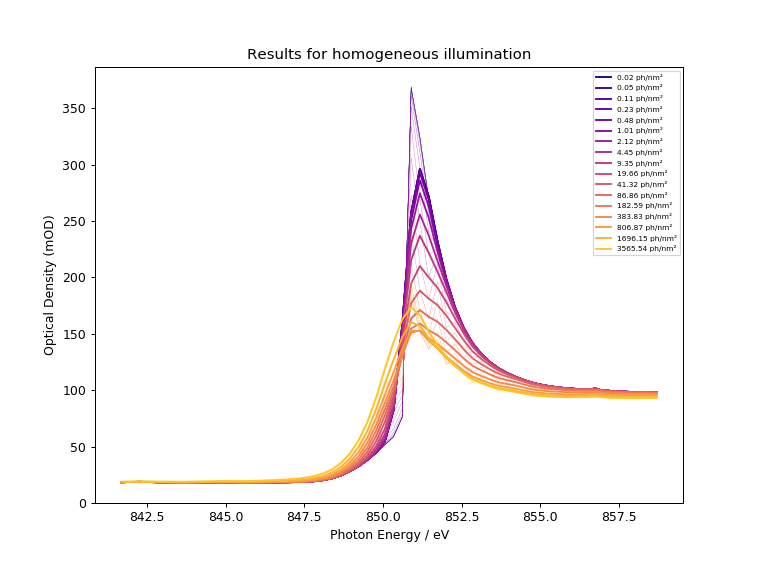

<IPython.core.display.Javascript object>


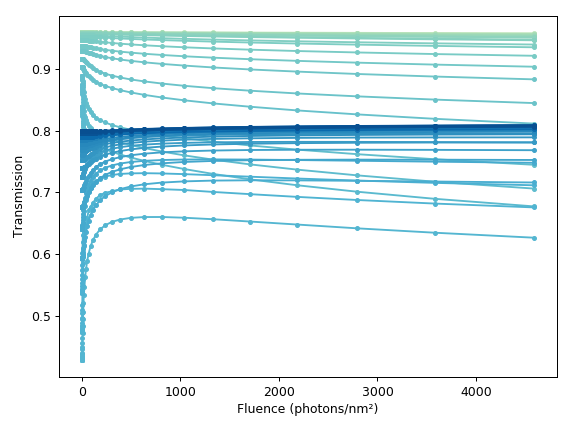

In [34]:
T = fl_dep_spectrum_T/fl_dep_spectrum_I
import matplotlib as mpl
plotcols =  mpl.cm.plasma(np.linspace(.0,0.9,N_local_fluences_to_calculate))#YlOrRd_r

#fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
plt.figure()


dE = np.mean(enax_rel[1:]-enax_rel[:-1])
aufl = 0.3

for i in range(N_local_fluences_to_calculate):
    if np.mod(i,3)==0:
        spec = 1e3*np.log10(1/T[:,i])
        spec_sm = sc.ndimage.gaussian_filter(spec,aufl/dE)
        plt.plot(enax_abs,spec, color = plotcols[i], lw=0.2)
        plt.plot(enax_abs,spec_sm, color = plotcols[i], label = f'{fluences_simulated[i]*XNLdyn.photons_per_J(PAR.E_i_abs[0]):.2f} ph/nm²')
plt.legend(fontsize = 6)


plt.title('Results for homogeneous illumination')
plt.ylabel('Optical Density (mOD)')
plt.xlabel('Photon Energy / eV')

plt.figure()

plt.xlabel('Fluence (photons/nm²)')
plt.ylabel('Transmission')
plotcols2 =  mpl.cm.GnBu(np.linspace(.2,0.95,N_points_E))#YlOrRd_r

for i in range(N_points_E):
    plt.plot(fluences_simulated*XNLdyn.photons_per_J(850), T[i,:], '.-', color = plotcols2[i])#, label ='For one z-stack'

#plt.xscale('log')
#plt.legend(loc = 'lower right')
plt.tight_layout()




In [67]:
final_transmissions.shape

(62, 30)

In [66]:
final_incidence_check.shape

(62, 30)

<IPython.core.display.Javascript object>


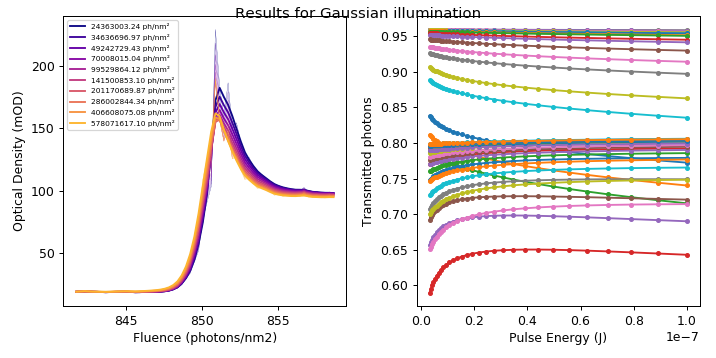

In [35]:
# These are the pulse energies for which we evaluate stuff
final_pulse_energies = np.logspace(np.log10(1/N_pulse_energies), np.log10(1), N_pulse_energies)* pulse_energy_max

final_transmissions = np.zeros((N_points_E, N_pulse_energies))
final_incidence_check = np.zeros((N_points_E, N_pulse_energies))
for i_photen in range(N_points_E):

    for ipe, pulse_en in enumerate(final_pulse_energies*XNLdyn.photons_per_J(enax_abs[i_photen])):
        local_fluences, dA = XNLdyn.calculate_fluences(Nsteps_r, pulse_en, pulse_profile_sigma)
        
        
        local_transmitted = np.interp(local_fluences, fluences_simulated*XNLdyn.photons_per_J(enax_abs[i_photen]),
                                      fl_dep_spectrum_T[i_photen,:])# tr[:, 0]
        final_transmissions[i_photen,ipe] = np.sum(local_transmitted*dA)

        
        local_incidence_check = np.interp(local_fluences, fluences_simulated*XNLdyn.photons_per_J(enax_abs[i_photen]),
                                          fl_dep_spectrum_I[i_photen,:])

        final_incidence_check[i_photen,ipe] = np.sum(local_incidence_check*dA) # should result equal final_pulse_energies

        
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
fig.suptitle('Results for Gaussian illumination')

plt.sca(ax1)

plotcols =  mpl.cm.plasma(np.linspace(.0,0.9,N_pulse_energies))#YlOrRd_r
for i in range(N_pulse_energies):
    if np.mod(i,3)==0:
        spec = 1e3*np.log10(final_incidence_check[:,i]/final_transmissions[:,i])
        spec_sm = sc.ndimage.gaussian_filter(spec,aufl/dE)
        ax1.plot(enax_abs, spec, color = plotcols[i], lw=0.2)#, label ='For one z-stack'

        ax1.plot(enax_abs, spec_sm, color = plotcols[i], label = f'{final_pulse_energies[i]*XNLdyn.photons_per_J(PAR.E_i_abs[0]):.2f} ph/nm²')#, label ='For one z-stack'
plt.xlabel('Fluence (photons/nm2)')
plt.ylabel('Optical Density (mOD)')
ax1.legend(fontsize = 6)

plt.sca(ax2)
plt.plot(final_pulse_energies, (final_transmissions/final_incidence_check).T, '.-')

plt.xlabel('Pulse Energy (J)')
plt.ylabel('Transmitted photons')
#plt.legend(loc = 'lower left')
plt.tight_layout()

<IPython.core.display.Javascript object>


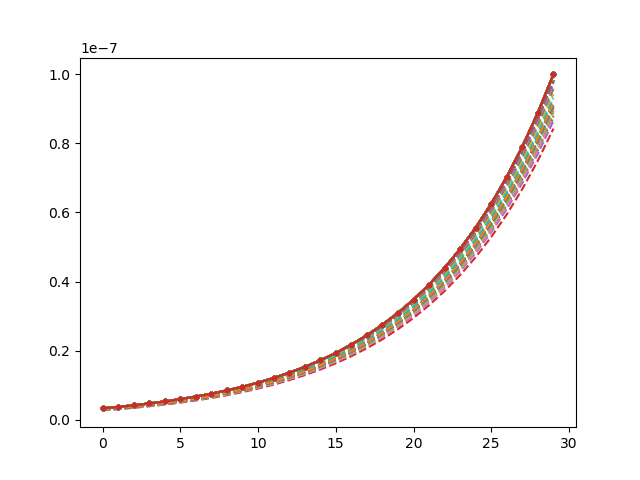

In [20]:
plt.figure()
plt.plot((1/XNLdyn.photons_per_J(enax_abs))*final_transmissions.T,'--')
plt.plot((1/XNLdyn.photons_per_J(enax_abs))*final_incidence_check.T,'.-')
#plt.plot(final_pulse_energies,'x')